<a href="https://colab.research.google.com/github/farnazmnz/Students-Academic-Performance/blob/main/project2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Libraries & Constants***

In [ ]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import  ConfusionMatrixDisplay
from sklearn.metrics import recall_score,precision_score,f1_score,accuracy_score
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [ ]:
!gdown --id 1-Zyp-JP3f9QhPKaErBkPPFNKaPS1v74u

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1-Zyp-JP3f9QhPKaErBkPPFNKaPS1v74u
To: /content/Dataset.csv
100% 38.0k/38.0k [00:00<00:00, 35.9MB/s]


In [ ]:
categorical_attr = ['gender', 'NationalITy', 'PlaceofBirth', 'StageID', 'GradeID', 'SectionID', 'Topic', 'Semester', 'Relation', 'ParentAnsweringSurvey', 'ParentschoolSatisfaction', 'StudentAbsenceDays', 'Class']

# ***Preprocessing***

Reading & displaying data:

In [ ]:
df = pd.read_csv('/content/Dataset.csv')
df.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M


In [ ]:
print(df.shape)

(480, 17)


# Distribution of data of each class

M    211
H    142
L    127
Name: Class, dtype: int64



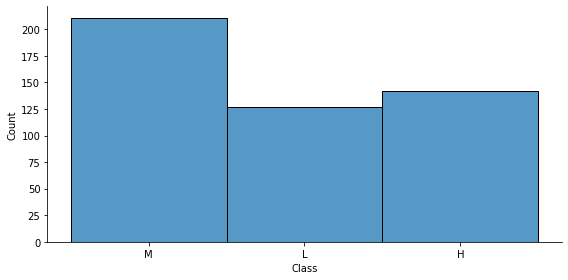

In [ ]:
print(df['Class'].value_counts())
print()
sns.displot(data=df,x='Class',height=4,aspect=2)

# encoding

In [ ]:
# Converting Categorical values to scaler values
le = LabelEncoder()
df[categorical_attr] = df[categorical_attr].apply(le.fit_transform, axis=0)

In [ ]:
df.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,1,4,4,2,1,0,7,0,0,15,16,2,20,1,1,1,2
1,1,4,4,2,1,0,7,0,0,20,20,3,25,1,1,1,2
2,1,4,4,2,1,0,7,0,0,10,7,0,30,0,0,0,1
3,1,4,4,2,1,0,7,0,0,30,25,5,35,0,0,0,1
4,1,4,4,2,1,0,7,0,0,40,50,12,50,0,0,0,2


In [ ]:
# X: Features, y: Classes
X = np.array(df.iloc[:, :-1])
y = np.array(df['Class'])

# split data set (20% test, 80% train)

In [ ]:
# Deviding Dataset to training and validation set
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=12)

In [ ]:
print('Number of dataset: ', len(X))
print('Number of train set: ', len(X_train))
print('Number of validation set: ', len(X_val))

Number of dataset:  480
Number of train set:  384
Number of validation set:  96


# shape of sets :

In [ ]:
print("shape of x_train :",X_train.shape)
print("shape of y_train :",y_train.shape)
print("shape of x_valid :",X_val.shape)
print("shape of y_valid :",y_val.shape)

shape of x_train : (384, 16)
shape of y_train : (384,)
shape of x_valid : (96, 16)
shape of y_valid : (96,)


# standardize data

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

# add tensorflow and keras library

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import  BatchNormalization


# input of models :

In [ ]:
print("input size : " ,X_train.shape[1])

input size :  16


# 3 **LAYER**

#  adam  , activation=relu

Epoch 1/100
31/31 [==============================] - 1s 8ms/step - loss: 1.1171 - accuracy: 0.3583 - val_loss: 0.9326 - val_accuracy: 0.4286
Epoch 2/100
31/31 [==============================] - 0s 3ms/step - loss: 0.8478 - accuracy: 0.5831 - val_loss: 0.7478 - val_accuracy: 0.6883
Epoch 3/100
31/31 [==============================] - 0s 3ms/step - loss: 0.7300 - accuracy: 0.7003 - val_loss: 0.6650 - val_accuracy: 0.7532
Epoch 4/100
31/31 [==============================] - 0s 4ms/step - loss: 0.6607 - accuracy: 0.7492 - val_loss: 0.6230 - val_accuracy: 0.7662
Epoch 5/100
31/31 [==============================] - 0s 3ms/step - loss: 0.6084 - accuracy: 0.7818 - val_loss: 0.5903 - val_accuracy: 0.7662
Epoch 6/100
31/31 [==============================] - 0s 4ms/step - loss: 0.5670 - accuracy: 0.7980 - val_loss: 0.5693 - val_accuracy: 0.7662
Epoch 7/100
31/31 [==============================] - 0s 3ms/step - loss: 0.5361 - accuracy: 0.7818 - val_loss: 0.5452 - val_accuracy: 0.7922
Epoch 8/100
3

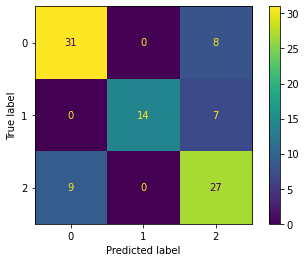

(384, 3)
(384,)
y_predict =  [1 0 0 1 0 0 2 2 2 1 0 0 0 1 0 2 1 0 2 2 2 1 2 2 2 1 2 1 2 2 2 2 0 1 2 0 2
 2 0 2 2 0 1 1 2 1 2 2 2 2 0 1 2 0 2 1 2 0 2 2 1 0 0 2 0 2 1 0 0 2 2 2 2 1
 2 2 2 2 0 2 0 2 2 1 1 1 0 2 0 2 2 2 2 2 2 2 1 1 2 1 1 2 0 0 2 1 0 2 1 1 2
 2 1 1 2 0 2 2 1 2 2 2 2 2 0 0 0 1 2 0 2 1 0 2 0 0 1 1 1 1 1 0 2 2 1 2 1 2
 0 2 1 0 2 0 2 1 0 2 2 2 1 1 0 1 0 0 2 2 1 0 1 1 0 0 2 2 2 2 1 2 1 1 0 2 0
 0 2 2 2 0 2 2 2 2 0 2 2 0 0 2 2 2 0 2 2 1 2 2 1 0 2 0 1 1 1 2 0 0 0 2 2 2
 2 0 0 1 0 0 0 2 2 2 0 0 2 0 0 2 2 2 2 0 1 0 2 2 0 1 0 2 1 1 2 0 2 2 0 1 1
 1 1 2 0 2 1 1 2 1 0 2 2 2 1 2 0 1 1 1 1 2 2 0 1 0 0 1 2 0 1 1 2 1 1 0 0 2
 2 2 0 1 2 2 0 2 0 2 0 2 2 2 0 1 2 1 1 0 1 1 2 2 2 1 2 0 2 2 0 1 1 1 0 2 2
 1 1 2 0 1 0 0 0 1 2 2 2 0 0 2 2 0 0 2 1 0 2 2 0 1 1 1 2 1 1 1 0 1 2 2 2 2
 1 2 2 2 0 0 2 1 1 2 1 2 0 1]
confusion matrix =  [[31  0  8]
 [ 0 14  7]
 [ 9  0 27]]


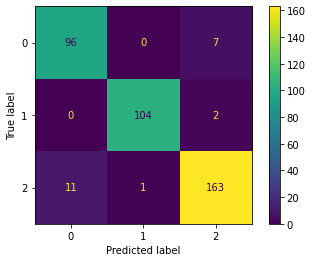

precision :  0.8059523809523809
recall :  0.7371794871794872
f1_score : 0.7590392729633236

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


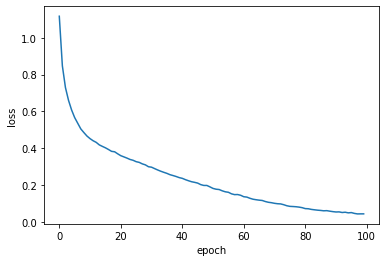

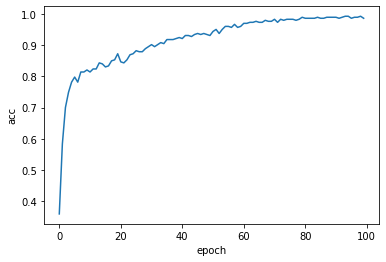

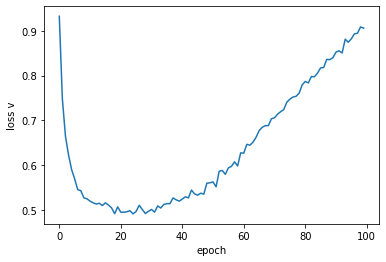

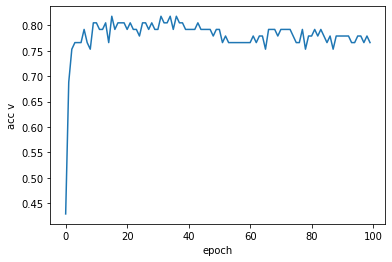

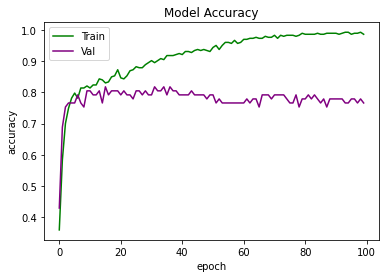

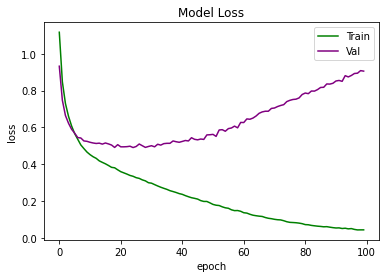

In [ ]:
''' building sequential model '''

model = Sequential()
model.add(Dense(36 , input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(3, activation='softmax'))

#change hyperparameter
opt = keras.optimizers.Adam(learning_rate=0.001)

#Configures the model for training
model.compile(optimizer=opt, loss='sparse_categorical_crossentropy',  metrics=['accuracy'])

#train model
history = model.fit( X_train,  y_train ,validation_split=0.2, batch_size=10, epochs=100 )

#predict on valid set
y_predict=model.predict(X_val)
print(y_predict.shape)

# returning Indices of the max element(because yval is (96,1) to compare output with yval we need change (96,3) to (96, ) )
y_predict= np.argmax(y_predict,axis=1)
print(y_predict.shape)
print("y_predict = ", y_predict)

#report result of all metrics
print(classification_report(y_val,y_predict))

#plot confusion matrix val
confusion = confusion_matrix(y_val,y_predict)
print("confusion matrix = " ,confusion)
mat = ConfusionMatrixDisplay(confusion_matrix=confusion)
mat.plot()
plt.show()


y_pred=model.predict(X_train)
print(y_pred.shape)


y_pred= np.argmax(y_pred,axis=1)
print(y_pred.shape)
print("y_predict = ", y_pred)
#plot confusion matrix train
conf = confusion_matrix(y_train,y_pred)
print("confusion matrix = " ,confusion)
mat = ConfusionMatrixDisplay(confusion_matrix=conf)
mat.plot()
plt.show()

#result of all metrics
print("precision : ",precision_score(y_val,y_predict,average='macro'))
print("recall : ",recall_score(y_val,y_predict,average='macro'))
print("f1_score :",f1_score(y_val,y_predict,average='macro'))


print("")
print(history.history.keys())
h =history.history

plt.plot(h['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

plt.plot(h['accuracy'])
plt.xlabel('epoch')
plt.ylabel('acc')
plt.show()

plt.plot(h['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss v')
plt.show()

plt.plot(h['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('acc v')
plt.show()


plt.title('Model Accuracy')
plt.plot(h['accuracy'], color = 'green')
plt.plot(h['val_accuracy'], color = 'purple')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['Train','Val'])
plt.show()


plt.title('Model Loss')
plt.plot(h['loss'], color = 'green')
plt.plot(h['val_loss'], color = 'purple')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['Train','Val'])
plt.show()

# adam , relu , drop out

In [ ]:
''' building sequential model '''

model = Sequential()
model.add(Dense(36 , input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(3, activation='softmax'))

#change hyperparameter
opt = keras.optimizers.Adam(learning_rate=0.001)

#Configures the model for training
model.compile(optimizer=opt, loss='sparse_categorical_crossentropy',  metrics=['accuracy'])

#train model
history = model.fit( X_train,  y_train ,validation_split=0.2, batch_size=10, epochs=100 )

#predict on valid set
y_predict=model.predict(X_val)
print(y_predict.shape)

# returning Indices of the max element(because yval is (96,1) to compare output with yval we need change (96,3) to (96, ) )
y_predict= np.argmax(y_predict,axis=1)
print(y_predict.shape)
print("y_predict = ", y_predict)

#report result of all metrics
print(classification_report(y_val,y_predict))

#plot confusion matrix
confusion = confusion_matrix(y_val,y_predict)
print("confusion matrix = " ,confusion)
mat = ConfusionMatrixDisplay(confusion_matrix=confusion)
mat.plot()
plt.show()


#result of all metrics
print("precision : ",precision_score(y_val,y_predict,average='macro'))
print("recall : ",recall_score(y_val,y_predict,average='macro'))
print("f1_score :",f1_score(y_val,y_predict,average='macro'))


print("")
print(history.history.keys())
h =history.history

plt.plot(h['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

plt.plot(h['accuracy'])
plt.xlabel('epoch')
plt.ylabel('acc')
plt.show()

plt.plot(h['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss v')
plt.show()

plt.plot(h['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('acc v')
plt.show()


plt.title('Model Accuracy')
plt.plot(h['accuracy'], color = 'green')
plt.plot(h['val_accuracy'], color = 'purple')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['Train','Val'])
plt.show()


plt.title('Model Loss')
plt.plot(h['loss'], color = 'green')
plt.plot(h['val_loss'], color = 'purple')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['Train','Val'])
plt.show()

# adam , relu , batch normalize

Epoch 1/100
31/31 [==============================] - 1s 10ms/step - loss: 1.4374 - accuracy: 0.3681 - val_loss: 1.1138 - val_accuracy: 0.3247
Epoch 2/100
31/31 [==============================] - 0s 5ms/step - loss: 1.0696 - accuracy: 0.5179 - val_loss: 0.9731 - val_accuracy: 0.3896
Epoch 3/100
31/31 [==============================] - 0s 4ms/step - loss: 0.8655 - accuracy: 0.5993 - val_loss: 0.9035 - val_accuracy: 0.5325
Epoch 4/100
31/31 [==============================] - 0s 4ms/step - loss: 0.8535 - accuracy: 0.5863 - val_loss: 0.8364 - val_accuracy: 0.5714
Epoch 5/100
31/31 [==============================] - 0s 4ms/step - loss: 0.7324 - accuracy: 0.6743 - val_loss: 0.7866 - val_accuracy: 0.6364
Epoch 6/100
31/31 [==============================] - 0s 5ms/step - loss: 0.6856 - accuracy: 0.7003 - val_loss: 0.7600 - val_accuracy: 0.6364
Epoch 7/100
31/31 [==============================] - 0s 5ms/step - loss: 0.6918 - accuracy: 0.7101 - val_loss: 0.7302 - val_accuracy: 0.6494
Epoch 8/100


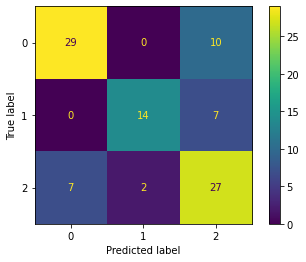

precision :  0.7647306397306397
recall :  0.7200854700854701
f1_score : 0.73503003003003

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


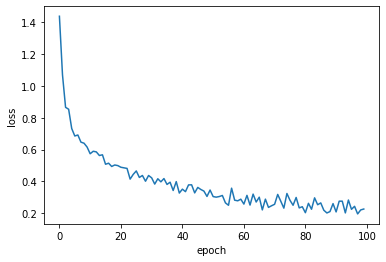

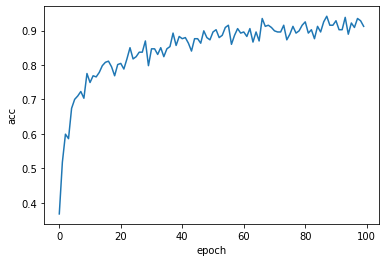

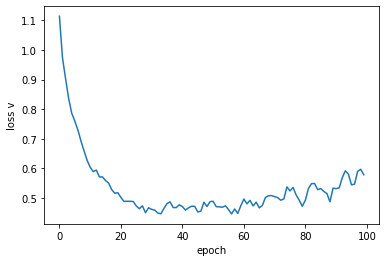

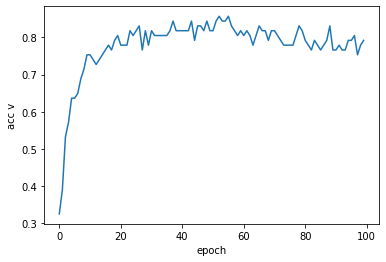

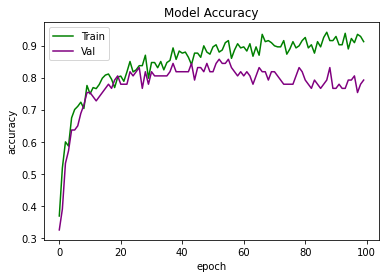

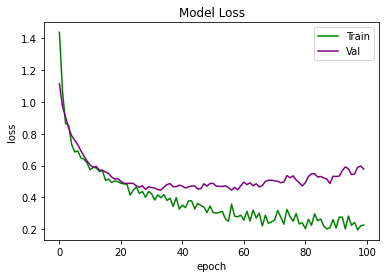

In [ ]:
''' building sequential model '''

model = Sequential()
model.add(Dense(36 , input_dim=X_train.shape[1], activation='relu'))
model.add(BatchNormalization())
model.add(Dense(14, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(3, activation='softmax'))

#change hyperparameter
opt = keras.optimizers.Adam(learning_rate=0.001)

#Configures the model for training
model.compile(optimizer=opt, loss='sparse_categorical_crossentropy',  metrics=['accuracy'])

#train model
history = model.fit( X_train,  y_train ,validation_split=0.2, batch_size=10, epochs=100 )

#predict on valid set
y_predict=model.predict(X_val)
print(y_predict.shape)

# returning Indices of the max element(because yval is (96,1) to compare output with yval we need change (96,3) to (96, ) )
y_predict= np.argmax(y_predict,axis=1)
print(y_predict.shape)
print("y_predict = ", y_predict)

#report result of all metrics
print(classification_report(y_val,y_predict))

#plot confusion matrix
confusion = confusion_matrix(y_val,y_predict)
print("confusion matrix = " ,confusion)
mat = ConfusionMatrixDisplay(confusion_matrix=confusion)
mat.plot()
plt.show()


#result of all metrics
print("precision : ",precision_score(y_val,y_predict,average='macro'))
print("recall : ",recall_score(y_val,y_predict,average='macro'))
print("f1_score :",f1_score(y_val,y_predict,average='macro'))


print("")
print(history.history.keys())
h =history.history

plt.plot(h['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

plt.plot(h['accuracy'])
plt.xlabel('epoch')
plt.ylabel('acc')
plt.show()

plt.plot(h['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss v')
plt.show()

plt.plot(h['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('acc v')
plt.show()


plt.title('Model Accuracy')
plt.plot(h['accuracy'], color = 'green')
plt.plot(h['val_accuracy'], color = 'purple')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['Train','Val'])
plt.show()


plt.title('Model Loss')
plt.plot(h['loss'], color = 'green')
plt.plot(h['val_loss'], color = 'purple')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['Train','Val'])
plt.show()

# adam  , activation=sigmoid

Epoch 1/100
31/31 [==============================] - 1s 9ms/step - loss: 1.0666 - accuracy: 0.4658 - val_loss: 1.0785 - val_accuracy: 0.4156
Epoch 2/100
31/31 [==============================] - 0s 4ms/step - loss: 1.0225 - accuracy: 0.4658 - val_loss: 1.0318 - val_accuracy: 0.4156
Epoch 3/100
31/31 [==============================] - 0s 4ms/step - loss: 0.9879 - accuracy: 0.4658 - val_loss: 0.9933 - val_accuracy: 0.4156
Epoch 4/100
31/31 [==============================] - 0s 4ms/step - loss: 0.9498 - accuracy: 0.4658 - val_loss: 0.9509 - val_accuracy: 0.4156
Epoch 5/100
31/31 [==============================] - 0s 4ms/step - loss: 0.9037 - accuracy: 0.4821 - val_loss: 0.8974 - val_accuracy: 0.4935
Epoch 6/100
31/31 [==============================] - 0s 4ms/step - loss: 0.8552 - accuracy: 0.6026 - val_loss: 0.8418 - val_accuracy: 0.6364
Epoch 7/100
31/31 [==============================] - 0s 4ms/step - loss: 0.8098 - accuracy: 0.6547 - val_loss: 0.7943 - val_accuracy: 0.6883
Epoch 8/100
3

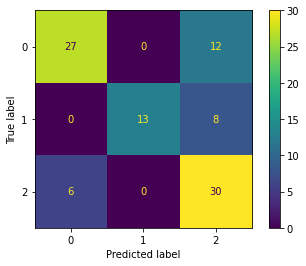

precision :  0.8060606060606061
recall :  0.7148962148962149
f1_score : 0.7374601003191975

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


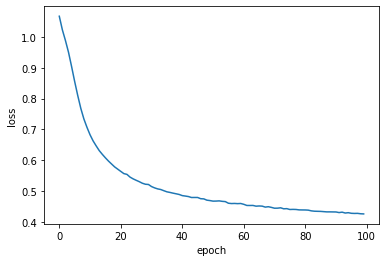

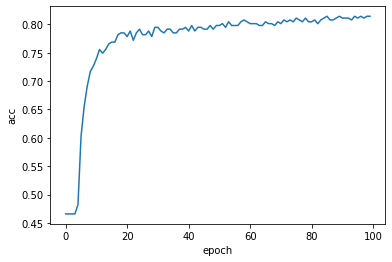

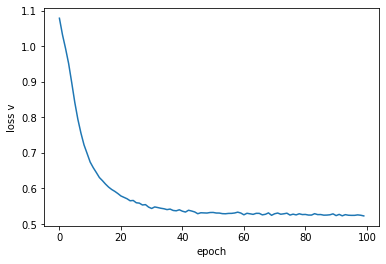

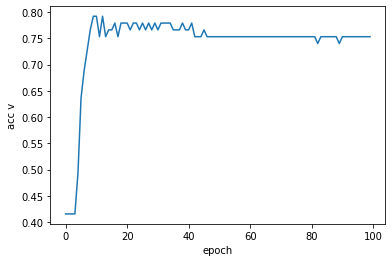

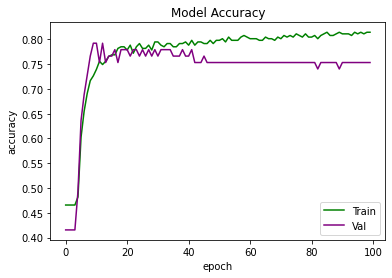

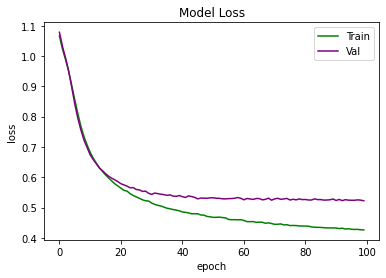

In [ ]:
''' building sequential model '''

model = Sequential()
model.add(Dense(36 , input_dim=X_train.shape[1], activation='sigmoid'))
model.add(Dense(16, activation='sigmoid'))
model.add(Dense(3, activation='softmax'))

#change hyperparameter
opt = keras.optimizers.Adam(learning_rate=0.001)

#Configures the model for training
model.compile(optimizer=opt, loss='sparse_categorical_crossentropy',  metrics=['accuracy'])

#train model
history = model.fit( X_train,  y_train ,validation_split=0.2, batch_size=10, epochs=100 )

#predict on valid set
y_predict=model.predict(X_val)
print(y_predict.shape)

# returning Indices of the max element(because yval is (96,1) to compare output with yval we need change (96,3) to (96, ) )
y_predict= np.argmax(y_predict,axis=1)
print(y_predict.shape)
print("y_predict = ", y_predict)

#report result of all metrics
print(classification_report(y_val,y_predict))

#plot confusion matrix
confusion = confusion_matrix(y_val,y_predict)
print("confusion matrix = " ,confusion)
mat = ConfusionMatrixDisplay(confusion_matrix=confusion)
mat.plot()
plt.show()


#result of all metrics
print("precision : ",precision_score(y_val,y_predict,average='macro'))
print("recall : ",recall_score(y_val,y_predict,average='macro'))
print("f1_score :",f1_score(y_val,y_predict,average='macro'))


print("")
print(history.history.keys())
h =history.history

plt.plot(h['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

plt.plot(h['accuracy'])
plt.xlabel('epoch')
plt.ylabel('acc')
plt.show()

plt.plot(h['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss v')
plt.show()

plt.plot(h['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('acc v')
plt.show()


plt.title('Model Accuracy')
plt.plot(h['accuracy'], color = 'green')
plt.plot(h['val_accuracy'], color = 'purple')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['Train','Val'])
plt.show()


plt.title('Model Loss')
plt.plot(h['loss'], color = 'green')
plt.plot(h['val_loss'], color = 'purple')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['Train','Val'])
plt.show()



# adam ,sigmoid , dropout

Epoch 1/100
31/31 [==============================] - 1s 9ms/step - loss: 1.2815 - accuracy: 0.4658 - val_loss: 1.1595 - val_accuracy: 0.4156
Epoch 2/100
31/31 [==============================] - 0s 4ms/step - loss: 1.0928 - accuracy: 0.4723 - val_loss: 1.0621 - val_accuracy: 0.4156
Epoch 3/100
31/31 [==============================] - 0s 4ms/step - loss: 1.0428 - accuracy: 0.4691 - val_loss: 1.0388 - val_accuracy: 0.4156
Epoch 4/100
31/31 [==============================] - 0s 4ms/step - loss: 1.0185 - accuracy: 0.4528 - val_loss: 1.0087 - val_accuracy: 0.4156
Epoch 5/100
31/31 [==============================] - 0s 3ms/step - loss: 0.9968 - accuracy: 0.5016 - val_loss: 0.9765 - val_accuracy: 0.4156
Epoch 6/100
31/31 [==============================] - 0s 4ms/step - loss: 0.9449 - accuracy: 0.5277 - val_loss: 0.9502 - val_accuracy: 0.4156
Epoch 7/100
31/31 [==============================] - 0s 3ms/step - loss: 0.9326 - accuracy: 0.5081 - val_loss: 0.9118 - val_accuracy: 0.4286
Epoch 8/100
3

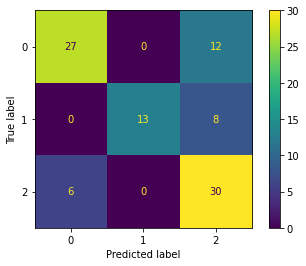

precision :  0.8060606060606061
recall :  0.7148962148962149
f1_score : 0.7374601003191975

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


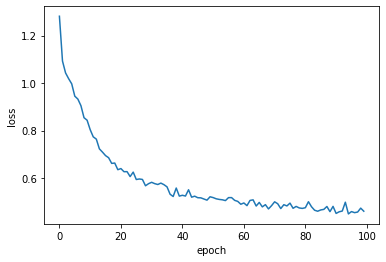

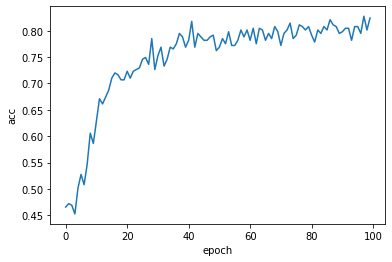

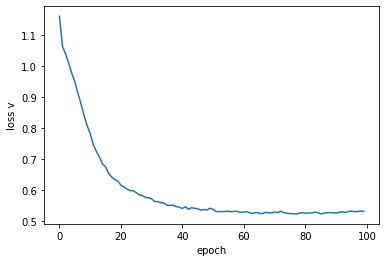

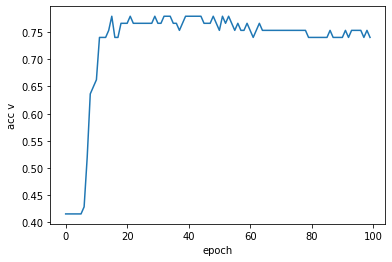

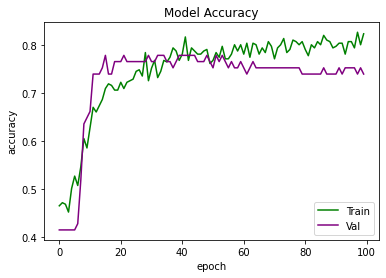

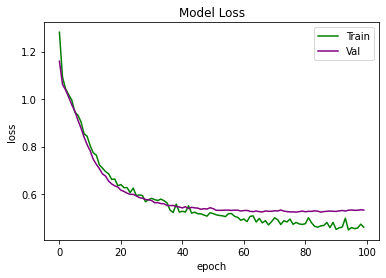

In [ ]:
''' building sequential model '''

model = Sequential()
model.add(Dense(36 , input_dim=X_train.shape[1], activation='sigmoid'))
model.add(Dropout(0.1))
model.add(Dense(16, activation='sigmoid'))
model.add(Dropout(0.1))
model.add(Dense(3, activation='softmax'))

#change hyperparameter
opt = keras.optimizers.Adam(learning_rate=0.001)

#Configures the model for training
model.compile(optimizer=opt, loss='sparse_categorical_crossentropy',  metrics=['accuracy'])

#train model
history = model.fit( X_train,  y_train ,validation_split=0.2, batch_size=10, epochs=100 )

#predict on valid set
y_predict=model.predict(X_val)
print(y_predict.shape)

# returning Indices of the max element(because yval is (96,1) to compare output with yval we need change (96,3) to (96, ) )
y_predict= np.argmax(y_predict,axis=1)
print(y_predict.shape)
print("y_predict = ", y_predict)

#report result of all metrics
print(classification_report(y_val,y_predict))

#plot confusion matrix
confusion = confusion_matrix(y_val,y_predict)
print("confusion matrix = " ,confusion)
mat = ConfusionMatrixDisplay(confusion_matrix=confusion)
mat.plot()
plt.show()


#result of all metrics
print("precision : ",precision_score(y_val,y_predict,average='macro'))
print("recall : ",recall_score(y_val,y_predict,average='macro'))
print("f1_score :",f1_score(y_val,y_predict,average='macro'))


print("")
print(history.history.keys())
h =history.history

plt.plot(h['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

plt.plot(h['accuracy'])
plt.xlabel('epoch')
plt.ylabel('acc')
plt.show()

plt.plot(h['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss v')
plt.show()

plt.plot(h['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('acc v')
plt.show()


plt.title('Model Accuracy')
plt.plot(h['accuracy'], color = 'green')
plt.plot(h['val_accuracy'], color = 'purple')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['Train','Val'])
plt.show()


plt.title('Model Loss')
plt.plot(h['loss'], color = 'green')
plt.plot(h['val_loss'], color = 'purple')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['Train','Val'])
plt.show()

# adam , sigmoid , batch normalize

Epoch 1/100
31/31 [==============================] - 1s 11ms/step - loss: 1.1192 - accuracy: 0.4625 - val_loss: 1.1219 - val_accuracy: 0.4156
Epoch 2/100
31/31 [==============================] - 0s 4ms/step - loss: 0.8702 - accuracy: 0.5896 - val_loss: 1.0971 - val_accuracy: 0.4156
Epoch 3/100
31/31 [==============================] - 0s 4ms/step - loss: 0.7547 - accuracy: 0.6352 - val_loss: 1.0766 - val_accuracy: 0.4156
Epoch 4/100
31/31 [==============================] - 0s 4ms/step - loss: 0.7645 - accuracy: 0.6450 - val_loss: 1.0509 - val_accuracy: 0.4156
Epoch 5/100
31/31 [==============================] - 0s 4ms/step - loss: 0.7299 - accuracy: 0.6743 - val_loss: 1.0217 - val_accuracy: 0.4156
Epoch 6/100
31/31 [==============================] - 0s 4ms/step - loss: 0.7092 - accuracy: 0.6547 - val_loss: 0.9720 - val_accuracy: 0.4156
Epoch 7/100
31/31 [==============================] - 0s 5ms/step - loss: 0.6573 - accuracy: 0.7329 - val_loss: 0.9123 - val_accuracy: 0.4156
Epoch 8/100


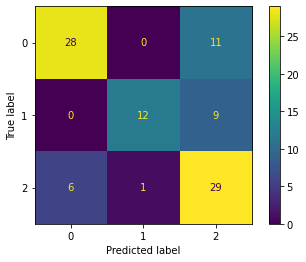

precision :  0.7794810231785022
recall :  0.6983109483109482
f1_score : 0.7184528605962933

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


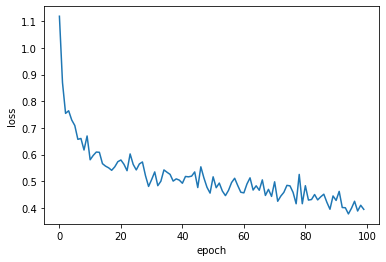

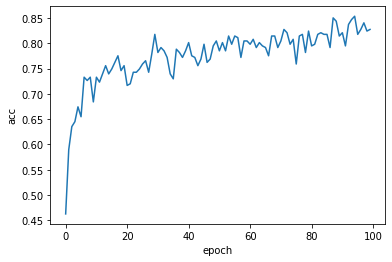

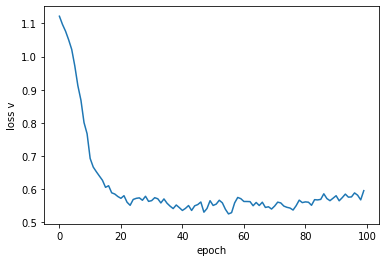

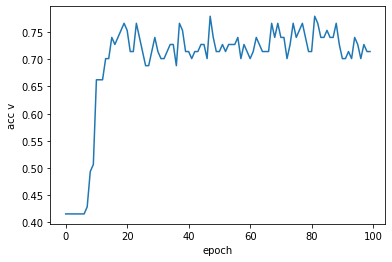

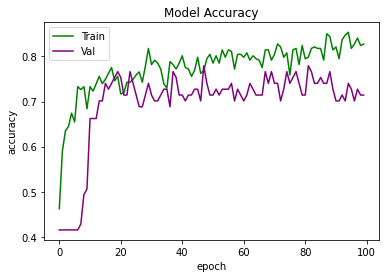

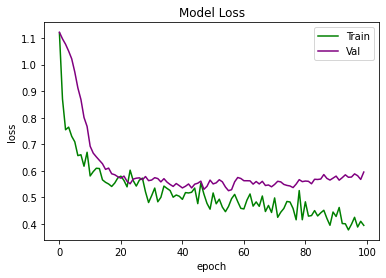

In [ ]:
''' building sequential model '''

model = Sequential()
model.add(Dense(36 , input_dim=X_train.shape[1], activation='sigmoid'))
model.add(BatchNormalization())
model.add(Dense(14, activation='sigmoid'))
model.add(BatchNormalization())
model.add(Dense(3, activation='softmax'))

#change hyperparameter
opt = keras.optimizers.Adam(learning_rate=0.001)

#Configures the model for training
model.compile(optimizer=opt, loss='sparse_categorical_crossentropy',  metrics=['accuracy'])

#train model
history = model.fit( X_train,  y_train ,validation_split=0.2, batch_size=10, epochs=100 )

#predict on valid set
y_predict=model.predict(X_val)
print(y_predict.shape)

# returning Indices of the max element(because yval is (96,1) to compare output with yval we need change (96,3) to (96, ) )
y_predict= np.argmax(y_predict,axis=1)
print(y_predict.shape)
print("y_predict = ", y_predict)

#report result of all metrics
print(classification_report(y_val,y_predict))

#plot confusion matrix
confusion = confusion_matrix(y_val,y_predict)
print("confusion matrix = " ,confusion)
mat = ConfusionMatrixDisplay(confusion_matrix=confusion)
mat.plot()
plt.show()


#result of all metrics
print("precision : ",precision_score(y_val,y_predict,average='macro'))
print("recall : ",recall_score(y_val,y_predict,average='macro'))
print("f1_score :",f1_score(y_val,y_predict,average='macro'))


print("")
print(history.history.keys())
h =history.history

plt.plot(h['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

plt.plot(h['accuracy'])
plt.xlabel('epoch')
plt.ylabel('acc')
plt.show()

plt.plot(h['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss v')
plt.show()

plt.plot(h['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('acc v')
plt.show()


plt.title('Model Accuracy')
plt.plot(h['accuracy'], color = 'green')
plt.plot(h['val_accuracy'], color = 'purple')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['Train','Val'])
plt.show()


plt.title('Model Loss')
plt.plot(h['loss'], color = 'green')
plt.plot(h['val_loss'], color = 'purple')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['Train','Val'])
plt.show()

#  adam  , activation=tanh

Epoch 1/100
31/31 [==============================] - 1s 9ms/step - loss: 1.0370 - accuracy: 0.4625 - val_loss: 0.8725 - val_accuracy: 0.5714
Epoch 2/100
31/31 [==============================] - 0s 4ms/step - loss: 0.8039 - accuracy: 0.6287 - val_loss: 0.7595 - val_accuracy: 0.6234
Epoch 3/100
31/31 [==============================] - 0s 4ms/step - loss: 0.7183 - accuracy: 0.6840 - val_loss: 0.7070 - val_accuracy: 0.6104
Epoch 4/100
31/31 [==============================] - 0s 3ms/step - loss: 0.6664 - accuracy: 0.7296 - val_loss: 0.6794 - val_accuracy: 0.6364
Epoch 5/100
31/31 [==============================] - 0s 4ms/step - loss: 0.6237 - accuracy: 0.7394 - val_loss: 0.6566 - val_accuracy: 0.6364
Epoch 6/100
31/31 [==============================] - 0s 4ms/step - loss: 0.5960 - accuracy: 0.7590 - val_loss: 0.6383 - val_accuracy: 0.6364
Epoch 7/100
31/31 [==============================] - 0s 4ms/step - loss: 0.5682 - accuracy: 0.7622 - val_loss: 0.6199 - val_accuracy: 0.6623
Epoch 8/100
3

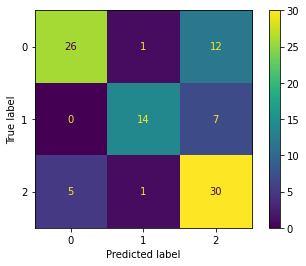

precision :  0.7753181917928463
recall :  0.7222222222222222
f1_score : 0.7351654175183587

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


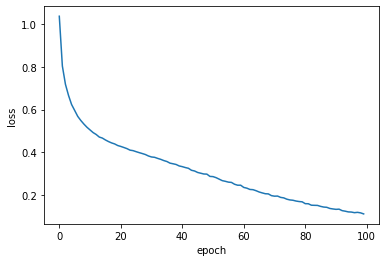

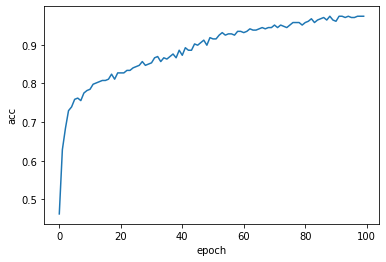

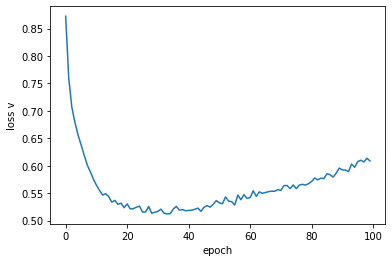

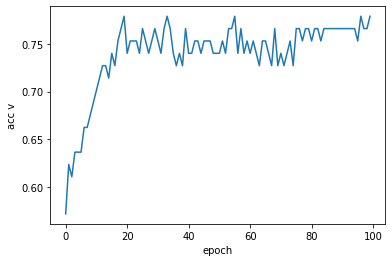

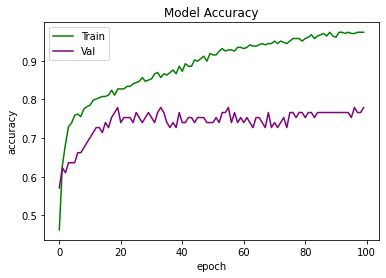

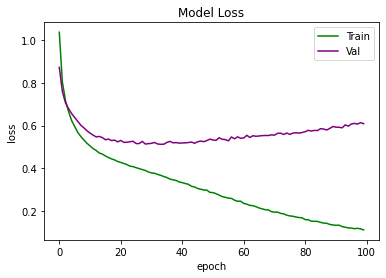

In [ ]:
''' building sequential model '''

model = Sequential()
model.add(Dense(36 , input_dim=X_train.shape[1], activation='tanh'))
model.add(Dense(16, activation='tanh'))
model.add(Dense(3, activation='softmax'))

#change hyperparameter
opt = keras.optimizers.Adam(learning_rate=0.001)

#Configures the model for training
model.compile(optimizer=opt, loss='sparse_categorical_crossentropy',  metrics=['accuracy'])

#train model
history = model.fit( X_train,  y_train ,validation_split=0.2, batch_size=10, epochs=100 )

#predict on valid set
y_predict=model.predict(X_val)
print(y_predict.shape)

# returning Indices of the max element(because yval is (96,1) to compare output with yval we need change (96,3) to (96, ) )
y_predict= np.argmax(y_predict,axis=1)
print(y_predict.shape)
print("y_predict = ", y_predict)

#report result of all metrics
print(classification_report(y_val,y_predict))

#plot confusion matrix
confusion = confusion_matrix(y_val,y_predict)
print("confusion matrix = " ,confusion)
mat = ConfusionMatrixDisplay(confusion_matrix=confusion)
mat.plot()
plt.show()


#result of all metrics
print("precision : ",precision_score(y_val,y_predict,average='macro'))
print("recall : ",recall_score(y_val,y_predict,average='macro'))
print("f1_score :",f1_score(y_val,y_predict,average='macro'))


print("")
print(history.history.keys())
h =history.history

plt.plot(h['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

plt.plot(h['accuracy'])
plt.xlabel('epoch')
plt.ylabel('acc')
plt.show()

plt.plot(h['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss v')
plt.show()

plt.plot(h['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('acc v')
plt.show()


plt.title('Model Accuracy')
plt.plot(h['accuracy'], color = 'green')
plt.plot(h['val_accuracy'], color = 'purple')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['Train','Val'])
plt.show()


plt.title('Model Loss')
plt.plot(h['loss'], color = 'green')
plt.plot(h['val_loss'], color = 'purple')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['Train','Val'])
plt.show()


# adam , tanh ,dropout

Epoch 1/100
31/31 [==============================] - 1s 9ms/step - loss: 1.0362 - accuracy: 0.5049 - val_loss: 0.8993 - val_accuracy: 0.6234
Epoch 2/100
31/31 [==============================] - 0s 4ms/step - loss: 0.8534 - accuracy: 0.5993 - val_loss: 0.7622 - val_accuracy: 0.6623
Epoch 3/100
31/31 [==============================] - 0s 4ms/step - loss: 0.7685 - accuracy: 0.6482 - val_loss: 0.7100 - val_accuracy: 0.6623
Epoch 4/100
31/31 [==============================] - 0s 4ms/step - loss: 0.7228 - accuracy: 0.6775 - val_loss: 0.6771 - val_accuracy: 0.6494
Epoch 5/100
31/31 [==============================] - 0s 4ms/step - loss: 0.6674 - accuracy: 0.6971 - val_loss: 0.6468 - val_accuracy: 0.6753
Epoch 6/100
31/31 [==============================] - 0s 3ms/step - loss: 0.6443 - accuracy: 0.7329 - val_loss: 0.6377 - val_accuracy: 0.6883
Epoch 7/100
31/31 [==============================] - 0s 4ms/step - loss: 0.6054 - accuracy: 0.7264 - val_loss: 0.6137 - val_accuracy: 0.6753
Epoch 8/100
3

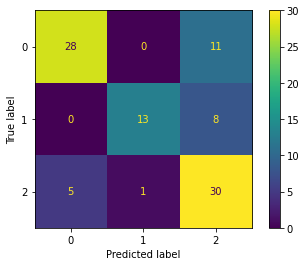

precision :  0.7964337250051535
recall :  0.7234432234432235
f1_score : 0.7421724245253657

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


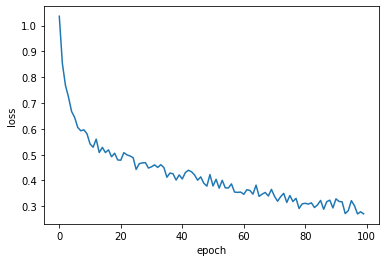

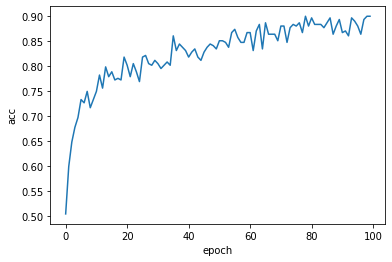

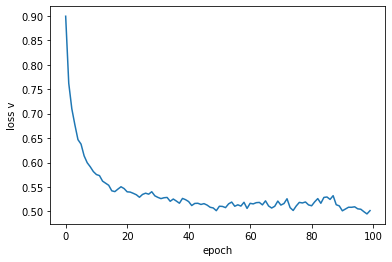

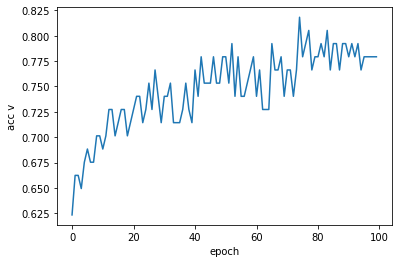

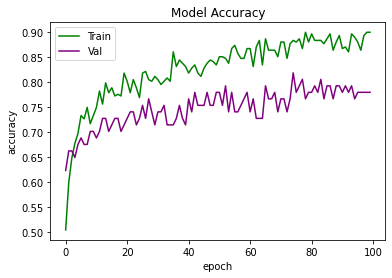

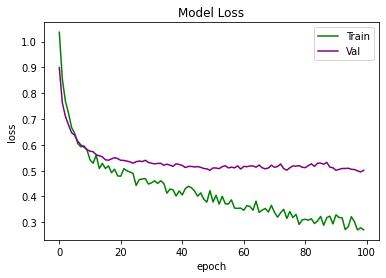

In [ ]:
''' building sequential model '''

model = Sequential()
model.add(Dense(36 , input_dim=X_train.shape[1], activation='tanh'))
model.add(Dropout(0.1))
model.add(Dense(16, activation='tanh'))
model.add(Dropout(0.1))
model.add(Dense(3, activation='softmax'))

#change hyperparameter
opt = keras.optimizers.Adam(learning_rate=0.001)

#Configures the model for training
model.compile(optimizer=opt, loss='sparse_categorical_crossentropy',  metrics=['accuracy'])

#train model
history = model.fit( X_train,  y_train ,validation_split=0.2, batch_size=10, epochs=100 )

#predict on valid set
y_predict=model.predict(X_val)
print(y_predict.shape)

# returning Indices of the max element(because yval is (96,1) to compare output with yval we need change (96,3) to (96, ) )
y_predict= np.argmax(y_predict,axis=1)
print(y_predict.shape)
print("y_predict = ", y_predict)

#report result of all metrics
print(classification_report(y_val,y_predict))

#plot confusion matrix
confusion = confusion_matrix(y_val,y_predict)
print("confusion matrix = " ,confusion)
mat = ConfusionMatrixDisplay(confusion_matrix=confusion)
mat.plot()
plt.show()


#result of all metrics
print("precision : ",precision_score(y_val,y_predict,average='macro'))
print("recall : ",recall_score(y_val,y_predict,average='macro'))
print("f1_score :",f1_score(y_val,y_predict,average='macro'))


print("")
print(history.history.keys())
h =history.history

plt.plot(h['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

plt.plot(h['accuracy'])
plt.xlabel('epoch')
plt.ylabel('acc')
plt.show()

plt.plot(h['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss v')
plt.show()

plt.plot(h['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('acc v')
plt.show()


plt.title('Model Accuracy')
plt.plot(h['accuracy'], color = 'green')
plt.plot(h['val_accuracy'], color = 'purple')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['Train','Val'])
plt.show()


plt.title('Model Loss')
plt.plot(h['loss'], color = 'green')
plt.plot(h['val_loss'], color = 'purple')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['Train','Val'])
plt.show()

# adam ,tanh , batch normalize

Epoch 1/100
31/31 [==============================] - 1s 10ms/step - loss: 1.0717 - accuracy: 0.5375 - val_loss: 0.8574 - val_accuracy: 0.5974
Epoch 2/100
31/31 [==============================] - 0s 4ms/step - loss: 0.8901 - accuracy: 0.5928 - val_loss: 0.7372 - val_accuracy: 0.6883
Epoch 3/100
31/31 [==============================] - 0s 4ms/step - loss: 0.7994 - accuracy: 0.6124 - val_loss: 0.7047 - val_accuracy: 0.7143
Epoch 4/100
31/31 [==============================] - 0s 4ms/step - loss: 0.7363 - accuracy: 0.6482 - val_loss: 0.6715 - val_accuracy: 0.7273
Epoch 5/100
31/31 [==============================] - 0s 4ms/step - loss: 0.6613 - accuracy: 0.7166 - val_loss: 0.6538 - val_accuracy: 0.7273
Epoch 6/100
31/31 [==============================] - 0s 4ms/step - loss: 0.6634 - accuracy: 0.6840 - val_loss: 0.6333 - val_accuracy: 0.7403
Epoch 7/100
31/31 [==============================] - 0s 4ms/step - loss: 0.6557 - accuracy: 0.6840 - val_loss: 0.6143 - val_accuracy: 0.7273
Epoch 8/100


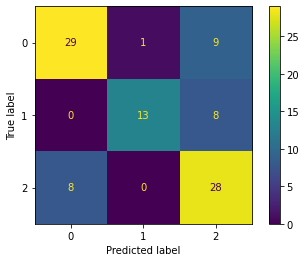

precision :  0.7781924781924783
recall :  0.7134717134717135
f1_score : 0.7324576874284477

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


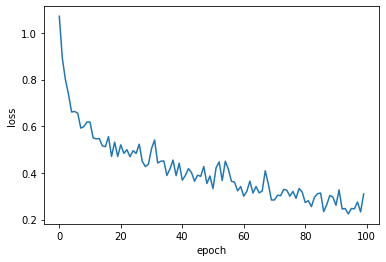

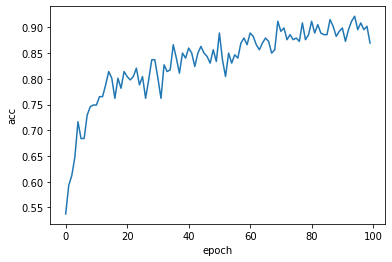

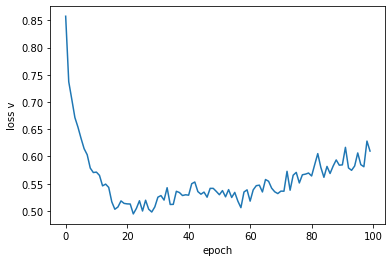

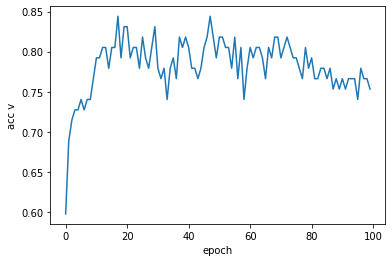

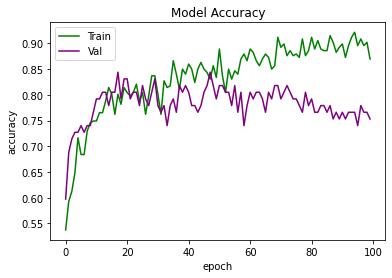

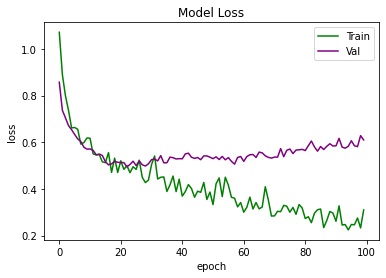

In [ ]:
''' building sequential model '''

model = Sequential()
model.add(Dense(36 , input_dim=X_train.shape[1], activation='tanh'))
model.add(BatchNormalization())
model.add(Dense(16, activation='tanh'))
model.add(BatchNormalization())
model.add(Dense(3, activation='softmax'))

#change hyperparameter
opt = keras.optimizers.Adam(learning_rate=0.001)

#Configures the model for training
model.compile(optimizer=opt, loss='sparse_categorical_crossentropy',  metrics=['accuracy'])

#train model
history = model.fit( X_train,  y_train ,validation_split=0.2, batch_size=10, epochs=100 )

#predict on valid set
y_predict=model.predict(X_val)
print(y_predict.shape)

# returning Indices of the max element(because yval is (96,1) to compare output with yval we need change (96,3) to (96, ) )
y_predict= np.argmax(y_predict,axis=1)
print(y_predict.shape)
print("y_predict = ", y_predict)

#report result of all metrics
print(classification_report(y_val,y_predict))

#plot confusion matrix
confusion = confusion_matrix(y_val,y_predict)
print("confusion matrix = " ,confusion)
mat = ConfusionMatrixDisplay(confusion_matrix=confusion)
mat.plot()
plt.show()


#result of all metrics
print("precision : ",precision_score(y_val,y_predict,average='macro'))
print("recall : ",recall_score(y_val,y_predict,average='macro'))
print("f1_score :",f1_score(y_val,y_predict,average='macro'))


print("")
print(history.history.keys())
h =history.history

plt.plot(h['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

plt.plot(h['accuracy'])
plt.xlabel('epoch')
plt.ylabel('acc')
plt.show()

plt.plot(h['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss v')
plt.show()

plt.plot(h['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('acc v')
plt.show()


plt.title('Model Accuracy')
plt.plot(h['accuracy'], color = 'green')
plt.plot(h['val_accuracy'], color = 'purple')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['Train','Val'])
plt.show()


plt.title('Model Loss')
plt.plot(h['loss'], color = 'green')
plt.plot(h['val_loss'], color = 'purple')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['Train','Val'])
plt.show()

# SGD , relu

In [ ]:
''' building sequential model '''

model = Sequential()
model.add(Dense(36 , input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(3, activation='softmax'))

#change hyperparameter
opt = keras.optimizers.SGD(learning_rate=0.001)

#Configures the model for training
model.compile(optimizer=opt, loss='sparse_categorical_crossentropy',  metrics=['accuracy'])

#train model
history = model.fit( X_train,  y_train ,validation_split=0.2, batch_size=10, epochs=100 )

#predict on valid set
y_predict=model.predict(X_val)
print(y_predict.shape)

# returning Indices of the max element(because yval is (96,1) to compare output with yval we need change (96,3) to (96, ) )
y_predict= np.argmax(y_predict,axis=1)
print(y_predict.shape)
print("y_predict = ", y_predict)

#report result of all metrics
print(classification_report(y_val,y_predict))

#plot confusion matrix
confusion = confusion_matrix(y_val,y_predict)
print("confusion matrix = " ,confusion)
mat = ConfusionMatrixDisplay(confusion_matrix=confusion)
mat.plot()
plt.show()


#result of all metrics
print("precision : ",precision_score(y_val,y_predict,average='macro'))
print("recall : ",recall_score(y_val,y_predict,average='macro'))
print("f1_score :",f1_score(y_val,y_predict,average='macro'))


print("")
print(history.history.keys())
h =history.history

plt.plot(h['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

plt.plot(h['accuracy'])
plt.xlabel('epoch')
plt.ylabel('acc')
plt.show()

plt.plot(h['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss v')
plt.show()

plt.plot(h['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('acc v')
plt.show()


plt.title('Model Accuracy')
plt.plot(h['accuracy'], color = 'green')
plt.plot(h['val_accuracy'], color = 'purple')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['Train','Val'])
plt.show()


plt.title('Model Loss')
plt.plot(h['loss'], color = 'green')
plt.plot(h['val_loss'], color = 'purple')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['Train','Val'])
plt.show()





# SGD ,relu , drop out

Epoch 1/100
31/31 [==============================] - 1s 8ms/step - loss: 1.1833 - accuracy: 0.3453 - val_loss: 1.1398 - val_accuracy: 0.3766
Epoch 2/100
31/31 [==============================] - 0s 3ms/step - loss: 1.1670 - accuracy: 0.3648 - val_loss: 1.1299 - val_accuracy: 0.3896
Epoch 3/100
31/31 [==============================] - 0s 4ms/step - loss: 1.1597 - accuracy: 0.3485 - val_loss: 1.1207 - val_accuracy: 0.3896
Epoch 4/100
31/31 [==============================] - 0s 3ms/step - loss: 1.1414 - accuracy: 0.3844 - val_loss: 1.1121 - val_accuracy: 0.4026
Epoch 5/100
31/31 [==============================] - 0s 4ms/step - loss: 1.1166 - accuracy: 0.3811 - val_loss: 1.1038 - val_accuracy: 0.4286
Epoch 6/100
31/31 [==============================] - 0s 3ms/step - loss: 1.1092 - accuracy: 0.3713 - val_loss: 1.0963 - val_accuracy: 0.4156
Epoch 7/100
31/31 [==============================] - 0s 3ms/step - loss: 1.0981 - accuracy: 0.3974 - val_loss: 1.0886 - val_accuracy: 0.4026
Epoch 8/100
3

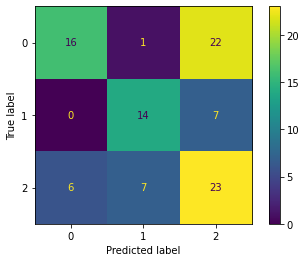

precision :  0.601981351981352
recall :  0.5719373219373219
f1_score : 0.5661600757864577

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


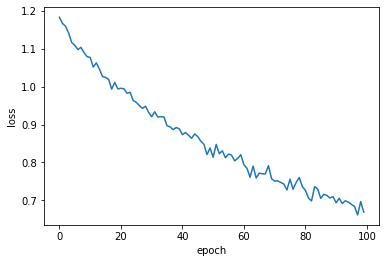

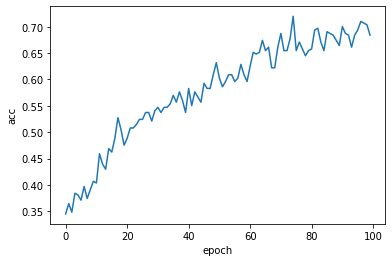

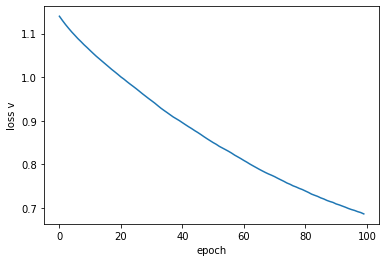

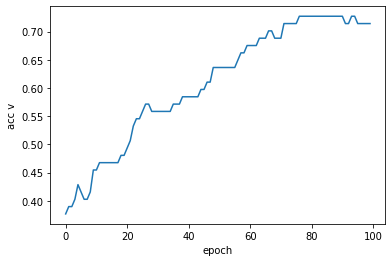

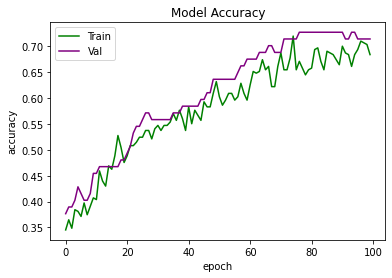

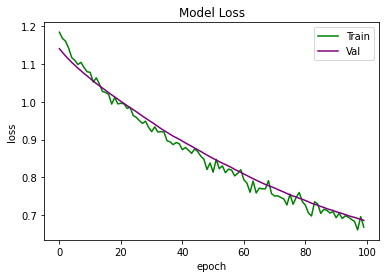

In [ ]:
''' building sequential model '''

model = Sequential()
model.add(Dense(36 , input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(3, activation='softmax'))

#change hyperparameter
opt = keras.optimizers.SGD(learning_rate=0.001)

#Configures the model for training
model.compile(optimizer=opt, loss='sparse_categorical_crossentropy',  metrics=['accuracy'])

#train model
history = model.fit( X_train,  y_train ,validation_split=0.2, batch_size=10, epochs=100 )

#predict on valid set
y_predict=model.predict(X_val)
print(y_predict.shape)

# returning Indices of the max element(because yval is (96,1) to compare output with yval we need change (96,3) to (96, ) )
y_predict= np.argmax(y_predict,axis=1)
print(y_predict.shape)
print("y_predict = ", y_predict)

#report result of all metrics
print(classification_report(y_val,y_predict))

#plot confusion matrix
confusion = confusion_matrix(y_val,y_predict)
print("confusion matrix = " ,confusion)
mat = ConfusionMatrixDisplay(confusion_matrix=confusion)
mat.plot()
plt.show()


#result of all metrics
print("precision : ",precision_score(y_val,y_predict,average='macro'))
print("recall : ",recall_score(y_val,y_predict,average='macro'))
print("f1_score :",f1_score(y_val,y_predict,average='macro'))


print("")
print(history.history.keys())
h =history.history

plt.plot(h['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

plt.plot(h['accuracy'])
plt.xlabel('epoch')
plt.ylabel('acc')
plt.show()

plt.plot(h['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss v')
plt.show()

plt.plot(h['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('acc v')
plt.show()


plt.title('Model Accuracy')
plt.plot(h['accuracy'], color = 'green')
plt.plot(h['val_accuracy'], color = 'purple')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['Train','Val'])
plt.show()


plt.title('Model Loss')
plt.plot(h['loss'], color = 'green')
plt.plot(h['val_loss'], color = 'purple')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['Train','Val'])
plt.show()

# SGD , relu , batch normalize

In [ ]:
''' building sequential model '''

model = Sequential()
model.add(Dense(36 , input_dim=X_train.shape[1], activation='relu'))
model.add(BatchNormalization())
model.add(Dense(16, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(3, activation='softmax'))

#change hyperparameter
opt = keras.optimizers.SGD(learning_rate=0.001)

#Configures the model for training
model.compile(optimizer=opt, loss='sparse_categorical_crossentropy',  metrics=['accuracy'])

#train model
history = model.fit( X_train,  y_train ,validation_split=0.2, batch_size=10, epochs=100 )

#predict on valid set
y_predict=model.predict(X_val)
print(y_predict.shape)

# returning Indices of the max element(because yval is (96,1) to compare output with yval we need change (96,3) to (96, ) )
y_predict= np.argmax(y_predict,axis=1)
print(y_predict.shape)
print("y_predict = ", y_predict)

#report result of all metrics
print(classification_report(y_val,y_predict))

#plot confusion matrix
confusion = confusion_matrix(y_val,y_predict)
print("confusion matrix = " ,confusion)
mat = ConfusionMatrixDisplay(confusion_matrix=confusion)
mat.plot()
plt.show()


#result of all metrics
print("precision : ",precision_score(y_val,y_predict,average='macro'))
print("recall : ",recall_score(y_val,y_predict,average='macro'))
print("f1_score :",f1_score(y_val,y_predict,average='macro'))


print("")
print(history.history.keys())
h =history.history

plt.plot(h['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

plt.plot(h['accuracy'])
plt.xlabel('epoch')
plt.ylabel('acc')
plt.show()

plt.plot(h['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss v')
plt.show()

plt.plot(h['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('acc v')
plt.show()


plt.title('Model Accuracy')
plt.plot(h['accuracy'], color = 'green')
plt.plot(h['val_accuracy'], color = 'purple')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['Train','Val'])
plt.show()


plt.title('Model Loss')
plt.plot(h['loss'], color = 'green')
plt.plot(h['val_loss'], color = 'purple')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['Train','Val'])
plt.show()

Epoch 1/100
31/31 [==============================] - 1s 9ms/step - loss: 1.3017 - accuracy: 0.4039 - val_loss: 1.0827 - val_accuracy: 0.3636
Epoch 2/100
31/31 [==============================] - 0s 3ms/step - loss: 1.3065 - accuracy: 0.3811 - val_loss: 1.0675 - val_accuracy: 0.4156
Epoch 3/100
31/31 [==============================] - 0s 3ms/step - loss: 1.2805 - accuracy: 0.3713 - val_loss: 1.0556 - val_accuracy: 0.4156
Epoch 4/100
25/31 [=======================>......] - ETA: 0s - loss: 1.1692 - accuracy: 0.4320

# SGD , sigmoid

In [ ]:
''' building sequential model '''

model = Sequential()
model.add(Dense(36 , input_dim=X_train.shape[1], activation='sigmoid'))
model.add(Dense(16, activation='sigmoid'))
model.add(Dense(3, activation='softmax'))

#change hyperparameter
opt = keras.optimizers.SGD(learning_rate=0.001)

#Configures the model for training
model.compile(optimizer=opt, loss='sparse_categorical_crossentropy',  metrics=['accuracy'])

#train model
history = model.fit( X_train,  y_train ,validation_split=0.2, batch_size=10, epochs=100 )

#predict on valid set
y_predict=model.predict(X_val)
print(y_predict.shape)

# returning Indices of the max element(because yval is (96,1) to compare output with yval we need change (96,3) to (96, ) )
y_predict= np.argmax(y_predict,axis=1)
print(y_predict.shape)
print("y_predict = ", y_predict)

#report result of all metrics
print(classification_report(y_val,y_predict))

#plot confusion matrix
confusion = confusion_matrix(y_val,y_predict)
print("confusion matrix = " ,confusion)
mat = ConfusionMatrixDisplay(confusion_matrix=confusion)
mat.plot()
plt.show()


#result of all metrics
print("precision : ",precision_score(y_val,y_predict,average='macro'))
print("recall : ",recall_score(y_val,y_predict,average='macro'))
print("f1_score :",f1_score(y_val,y_predict,average='macro'))


print("")
print(history.history.keys())
h =history.history

plt.plot(h['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

plt.plot(h['accuracy'])
plt.xlabel('epoch')
plt.ylabel('acc')
plt.show()

plt.plot(h['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss v')
plt.show()

plt.plot(h['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('acc v')
plt.show()


plt.title('Model Accuracy')
plt.plot(h['accuracy'], color = 'green')
plt.plot(h['val_accuracy'], color = 'purple')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['Train','Val'])
plt.show()


plt.title('Model Loss')
plt.plot(h['loss'], color = 'green')
plt.plot(h['val_loss'], color = 'purple')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['Train','Val'])
plt.show()



# SGD , sigmoid , drop out

In [ ]:
''' building sequential model '''

model = Sequential()
model.add(Dense(36 , input_dim=X_train.shape[1], activation='sigmoid'))
model.add(Dropout(0.1))
model.add(Dense(16, activation='sigmoid'))
model.add(Dropout(0.1))
model.add(Dense(3, activation='softmax'))

#change hyperparameter
opt = keras.optimizers.SGD(learning_rate=0.001)

#Configures the model for training
model.compile(optimizer=opt, loss='sparse_categorical_crossentropy',  metrics=['accuracy'])

#train model
history = model.fit( X_train,  y_train ,validation_split=0.2, batch_size=10, epochs=100 )

#predict on valid set
y_predict=model.predict(X_val)
print(y_predict.shape)

# returning Indices of the max element(because yval is (96,1) to compare output with yval we need change (96,3) to (96, ) )
y_predict= np.argmax(y_predict,axis=1)
print(y_predict.shape)
print("y_predict = ", y_predict)

#report result of all metrics
print(classification_report(y_val,y_predict))

#plot confusion matrix
confusion = confusion_matrix(y_val,y_predict)
print("confusion matrix = " ,confusion)
mat = ConfusionMatrixDisplay(confusion_matrix=confusion)
mat.plot()
plt.show()


#result of all metrics
print("precision : ",precision_score(y_val,y_predict,average='macro'))
print("recall : ",recall_score(y_val,y_predict,average='macro'))
print("f1_score :",f1_score(y_val,y_predict,average='macro'))


print("")
print(history.history.keys())
h =history.history

plt.plot(h['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

plt.plot(h['accuracy'])
plt.xlabel('epoch')
plt.ylabel('acc')
plt.show()

plt.plot(h['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss v')
plt.show()

plt.plot(h['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('acc v')
plt.show()


plt.title('Model Accuracy')
plt.plot(h['accuracy'], color = 'green')
plt.plot(h['val_accuracy'], color = 'purple')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['Train','Val'])
plt.show()


plt.title('Model Loss')
plt.plot(h['loss'], color = 'green')
plt.plot(h['val_loss'], color = 'purple')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['Train','Val'])
plt.show()

# SGD , sigmoid , batch normalize

In [ ]:
''' building sequential model '''

model = Sequential()
model.add(Dense(36 , input_dim=X_train.shape[1], activation='sigmoid'))
model.add(BatchNormalization())
model.add(Dense(16, activation='sigmoid'))
model.add(BatchNormalization())
model.add(Dense(3, activation='softmax'))

#change hyperparameter
opt = keras.optimizers.SGD(learning_rate=0.001)

#Configures the model for training
model.compile(optimizer=opt, loss='sparse_categorical_crossentropy',  metrics=['accuracy'])

#train model
history = model.fit( X_train,  y_train ,validation_split=0.2, batch_size=10, epochs=100 )

#predict on valid set
y_predict=model.predict(X_val)
print(y_predict.shape)

# returning Indices of the max element(because yval is (96,1) to compare output with yval we need change (96,3) to (96, ) )
y_predict= np.argmax(y_predict,axis=1)
print(y_predict.shape)
print("y_predict = ", y_predict)

#report result of all metrics
print(classification_report(y_val,y_predict))

#plot confusion matrix
confusion = confusion_matrix(y_val,y_predict)
print("confusion matrix = " ,confusion)
mat = ConfusionMatrixDisplay(confusion_matrix=confusion)
mat.plot()
plt.show()


#result of all metrics
print("precision : ",precision_score(y_val,y_predict,average='macro'))
print("recall : ",recall_score(y_val,y_predict,average='macro'))
print("f1_score :",f1_score(y_val,y_predict,average='macro'))


print("")
print(history.history.keys())
h =history.history

plt.plot(h['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

plt.plot(h['accuracy'])
plt.xlabel('epoch')
plt.ylabel('acc')
plt.show()

plt.plot(h['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss v')
plt.show()

plt.plot(h['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('acc v')
plt.show()


plt.title('Model Accuracy')
plt.plot(h['accuracy'], color = 'green')
plt.plot(h['val_accuracy'], color = 'purple')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['Train','Val'])
plt.show()


plt.title('Model Loss')
plt.plot(h['loss'], color = 'green')
plt.plot(h['val_loss'], color = 'purple')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['Train','Val'])
plt.show()

# SGD  , tanh

In [ ]:
''' building sequential model '''

model = Sequential()
model.add(Dense(36 , input_dim=X_train.shape[1], activation='tanh'))
model.add(Dense(16, activation='tanh'))
model.add(Dense(3, activation='softmax'))

#change hyperparameter
opt = keras.optimizers.SGD(learning_rate=0.001)

#Configures the model for training
model.compile(optimizer=opt, loss='sparse_categorical_crossentropy',  metrics=['accuracy'])

#train model
history = model.fit( X_train,  y_train ,validation_split=0.2, batch_size=10, epochs=100 )

#predict on valid set
y_predict=model.predict(X_val)
print(y_predict.shape)

# returning Indices of the max element(because yval is (96,1) to compare output with yval we need change (96,3) to (96, ) )
y_predict= np.argmax(y_predict,axis=1)
print(y_predict.shape)
print("y_predict = ", y_predict)

#report result of all metrics
print(classification_report(y_val,y_predict))

#plot confusion matrix
confusion = confusion_matrix(y_val,y_predict)
print("confusion matrix = " ,confusion)
mat = ConfusionMatrixDisplay(confusion_matrix=confusion)
mat.plot()
plt.show()


#result of all metrics
print("precision : ",precision_score(y_val,y_predict,average='macro'))
print("recall : ",recall_score(y_val,y_predict,average='macro'))
print("f1_score :",f1_score(y_val,y_predict,average='macro'))


print("")
print(history.history.keys())
h =history.history

plt.plot(h['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

plt.plot(h['accuracy'])
plt.xlabel('epoch')
plt.ylabel('acc')
plt.show()

plt.plot(h['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss v')
plt.show()

plt.plot(h['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('acc v')
plt.show()


plt.title('Model Accuracy')
plt.plot(h['accuracy'], color = 'green')
plt.plot(h['val_accuracy'], color = 'purple')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['Train','Val'])
plt.show()


plt.title('Model Loss')
plt.plot(h['loss'], color = 'green')
plt.plot(h['val_loss'], color = 'purple')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['Train','Val'])
plt.show()

# SGD , tanh , drop out

In [ ]:
''' building sequential model '''

model = Sequential()
model.add(Dense(36 , input_dim=X_train.shape[1], activation='tanh'))
model.add(Dropout(0.1))
model.add(Dense(16, activation='tanh'))
model.add(Dropout(0.1))
model.add(Dense(3, activation='softmax'))

#change hyperparameter
opt = keras.optimizers.SGD(learning_rate=0.001)

#Configures the model for training
model.compile(optimizer=opt, loss='sparse_categorical_crossentropy',  metrics=['accuracy'])

#train model
history = model.fit( X_train,  y_train ,validation_split=0.2, batch_size=10, epochs=100 )

#predict on valid set
y_predict=model.predict(X_val)
print(y_predict.shape)

# returning Indices of the max element(because yval is (96,1) to compare output with yval we need change (96,3) to (96, ) )
y_predict= np.argmax(y_predict,axis=1)
print(y_predict.shape)
print("y_predict = ", y_predict)

#report result of all metrics
print(classification_report(y_val,y_predict))

#plot confusion matrix
confusion = confusion_matrix(y_val,y_predict)
print("confusion matrix = " ,confusion)
mat = ConfusionMatrixDisplay(confusion_matrix=confusion)
mat.plot()
plt.show()


#result of all metrics
print("precision : ",precision_score(y_val,y_predict,average='macro'))
print("recall : ",recall_score(y_val,y_predict,average='macro'))
print("f1_score :",f1_score(y_val,y_predict,average='macro'))


print("")
print(history.history.keys())
h =history.history

plt.plot(h['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

plt.plot(h['accuracy'])
plt.xlabel('epoch')
plt.ylabel('acc')
plt.show()

plt.plot(h['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss v')
plt.show()

plt.plot(h['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('acc v')
plt.show()


plt.title('Model Accuracy')
plt.plot(h['accuracy'], color = 'green')
plt.plot(h['val_accuracy'], color = 'purple')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['Train','Val'])
plt.show()


plt.title('Model Loss')
plt.plot(h['loss'], color = 'green')
plt.plot(h['val_loss'], color = 'purple')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['Train','Val'])
plt.show()

# SGD , tanh , batch normalize

In [ ]:
''' building sequential model '''

model = Sequential()
model.add(Dense(36 , input_dim=X_train.shape[1], activation='tanh'))
model.add(BatchNormalization())
model.add(Dense(16, activation='tanh'))
model.add(BatchNormalization())
model.add(Dense(3, activation='softmax'))

#change hyperparameter
opt = keras.optimizers.SGD(learning_rate=0.001)

#Configures the model for training
model.compile(optimizer=opt, loss='sparse_categorical_crossentropy',  metrics=['accuracy'])

#train model
history = model.fit( X_train,  y_train ,validation_split=0.2, batch_size=10, epochs=100 )

#predict on valid set
y_predict=model.predict(X_val)
print(y_predict.shape)

# returning Indices of the max element(because yval is (96,1) to compare output with yval we need change (96,3) to (96, ) )
y_predict= np.argmax(y_predict,axis=1)
print(y_predict.shape)
print("y_predict = ", y_predict)

#report result of all metrics
print(classification_report(y_val,y_predict))

#plot confusion matrix
confusion = confusion_matrix(y_val,y_predict)
print("confusion matrix = " ,confusion)
mat = ConfusionMatrixDisplay(confusion_matrix=confusion)
mat.plot()
plt.show()


#result of all metrics
print("precision : ",precision_score(y_val,y_predict,average='macro'))
print("recall : ",recall_score(y_val,y_predict,average='macro'))
print("f1_score :",f1_score(y_val,y_predict,average='macro'))


print("")
print(history.history.keys())
h =history.history

plt.plot(h['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

plt.plot(h['accuracy'])
plt.xlabel('epoch')
plt.ylabel('acc')
plt.show()

plt.plot(h['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss v')
plt.show()

plt.plot(h['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('acc v')
plt.show()


plt.title('Model Accuracy')
plt.plot(h['accuracy'], color = 'green')
plt.plot(h['val_accuracy'], color = 'purple')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['Train','Val'])
plt.show()


plt.title('Model Loss')
plt.plot(h['loss'], color = 'green')
plt.plot(h['val_loss'], color = 'purple')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['Train','Val'])
plt.show()

# RMS , relu

In [ ]:
''' building sequential model '''

model = Sequential()
model.add(Dense(36 , input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(3, activation='softmax'))

#change hyperparameter
opt = keras.optimizers.RMSprop(learning_rate=0.001)

#Configures the model for training
model.compile(optimizer=opt, loss='sparse_categorical_crossentropy',  metrics=['accuracy'])

#train model
history = model.fit( X_train,  y_train ,validation_split=0.2, batch_size=10, epochs=100 )

#predict on valid set
y_predict=model.predict(X_val)
print(y_predict.shape)

# returning Indices of the max element(because yval is (96,1) to compare output with yval we need change (96,3) to (96, ) )
y_predict= np.argmax(y_predict,axis=1)
print(y_predict.shape)
print("y_predict = ", y_predict)

#report result of all metrics
print(classification_report(y_val,y_predict))

#plot confusion matrix
confusion = confusion_matrix(y_val,y_predict)
print("confusion matrix = " ,confusion)
mat = ConfusionMatrixDisplay(confusion_matrix=confusion)
mat.plot()
plt.show()


#result of all metrics
print("precision : ",precision_score(y_val,y_predict,average='macro'))
print("recall : ",recall_score(y_val,y_predict,average='macro'))
print("f1_score :",f1_score(y_val,y_predict,average='macro'))


print("")
print(history.history.keys())
h =history.history

plt.plot(h['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

plt.plot(h['accuracy'])
plt.xlabel('epoch')
plt.ylabel('acc')
plt.show()

plt.plot(h['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss v')
plt.show()

plt.plot(h['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('acc v')
plt.show()


plt.title('Model Accuracy')
plt.plot(h['accuracy'], color = 'green')
plt.plot(h['val_accuracy'], color = 'purple')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['Train','Val'])
plt.show()


plt.title('Model Loss')
plt.plot(h['loss'], color = 'green')
plt.plot(h['val_loss'], color = 'purple')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['Train','Val'])
plt.show()

# RMS , relu , drop out

In [ ]:
''' building sequential model '''

model = Sequential()
model.add(Dense(36 , input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(3, activation='softmax'))

#change hyperparameter
opt = keras.optimizers.RMSprop(learning_rate=0.001)

#Configures the model for training
model.compile(optimizer=opt, loss='sparse_categorical_crossentropy',  metrics=['accuracy'])

#train model
history = model.fit( X_train,  y_train ,validation_split=0.2, batch_size=10, epochs=100 )

#predict on valid set
y_predict=model.predict(X_val)
print(y_predict.shape)

# returning Indices of the max element(because yval is (96,1) to compare output with yval we need change (96,3) to (96, ) )
y_predict= np.argmax(y_predict,axis=1)
print(y_predict.shape)
print("y_predict = ", y_predict)

#report result of all metrics
print(classification_report(y_val,y_predict))

#plot confusion matrix
confusion = confusion_matrix(y_val,y_predict)
print("confusion matrix = " ,confusion)
mat = ConfusionMatrixDisplay(confusion_matrix=confusion)
mat.plot()
plt.show()


#result of all metrics
print("precision : ",precision_score(y_val,y_predict,average='macro'))
print("recall : ",recall_score(y_val,y_predict,average='macro'))
print("f1_score :",f1_score(y_val,y_predict,average='macro'))


print("")
print(history.history.keys())
h =history.history

plt.plot(h['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

plt.plot(h['accuracy'])
plt.xlabel('epoch')
plt.ylabel('acc')
plt.show()

plt.plot(h['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss v')
plt.show()

plt.plot(h['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('acc v')
plt.show()


plt.title('Model Accuracy')
plt.plot(h['accuracy'], color = 'green')
plt.plot(h['val_accuracy'], color = 'purple')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['Train','Val'])
plt.show()


plt.title('Model Loss')
plt.plot(h['loss'], color = 'green')
plt.plot(h['val_loss'], color = 'purple')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['Train','Val'])
plt.show()

# RMS , relu , batch normalize

In [ ]:
''' building sequential model '''

model = Sequential()
model.add(Dense(36 , input_dim=X_train.shape[1], activation='relu'))
model.add(BatchNormalization())
model.add(Dense(16, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(3, activation='softmax'))

#change hyperparameter
opt = keras.optimizers.RMSprop(learning_rate=0.001)

#Configures the model for training
model.compile(optimizer=opt, loss='sparse_categorical_crossentropy',  metrics=['accuracy'])

#train model
history = model.fit( X_train,  y_train ,validation_split=0.2, batch_size=10, epochs=100 )

#predict on valid set
y_predict=model.predict(X_val)
print(y_predict.shape)

# returning Indices of the max element(because yval is (96,1) to compare output with yval we need change (96,3) to (96, ) )
y_predict= np.argmax(y_predict,axis=1)
print(y_predict.shape)
print("y_predict = ", y_predict)

#report result of all metrics
print(classification_report(y_val,y_predict))

#plot confusion matrix
confusion = confusion_matrix(y_val,y_predict)
print("confusion matrix = " ,confusion)
mat = ConfusionMatrixDisplay(confusion_matrix=confusion)
mat.plot()
plt.show()


#result of all metrics
print("precision : ",precision_score(y_val,y_predict,average='macro'))
print("recall : ",recall_score(y_val,y_predict,average='macro'))
print("f1_score :",f1_score(y_val,y_predict,average='macro'))


print("")
print(history.history.keys())
h =history.history

plt.plot(h['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

plt.plot(h['accuracy'])
plt.xlabel('epoch')
plt.ylabel('acc')
plt.show()

plt.plot(h['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss v')
plt.show()

plt.plot(h['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('acc v')
plt.show()


plt.title('Model Accuracy')
plt.plot(h['accuracy'], color = 'green')
plt.plot(h['val_accuracy'], color = 'purple')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['Train','Val'])
plt.show()


plt.title('Model Loss')
plt.plot(h['loss'], color = 'green')
plt.plot(h['val_loss'], color = 'purple')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['Train','Val'])
plt.show()

# RMS , sigmoid

In [ ]:
''' building sequential model '''

model = Sequential()
model.add(Dense(36 , input_dim=X_train.shape[1], activation='sigmoid'))
model.add(Dense(16, activation='sigmoid'))
model.add(Dense(3, activation='softmax'))

#change hyperparameter
opt = keras.optimizers.RMSprop(learning_rate=0.001)

#Configures the model for training
model.compile(optimizer=opt, loss='sparse_categorical_crossentropy',  metrics=['accuracy'])

#train model
history = model.fit( X_train,  y_train ,validation_split=0.2, batch_size=10, epochs=100 )

#predict on valid set
y_predict=model.predict(X_val)
print(y_predict.shape)

# returning Indices of the max element(because yval is (96,1) to compare output with yval we need change (96,3) to (96, ) )
y_predict= np.argmax(y_predict,axis=1)
print(y_predict.shape)
print("y_predict = ", y_predict)

#report result of all metrics
print(classification_report(y_val,y_predict))

#plot confusion matrix
confusion = confusion_matrix(y_val,y_predict)
print("confusion matrix = " ,confusion)
mat = ConfusionMatrixDisplay(confusion_matrix=confusion)
mat.plot()
plt.show()


#result of all metrics
print("precision : ",precision_score(y_val,y_predict,average='macro'))
print("recall : ",recall_score(y_val,y_predict,average='macro'))
print("f1_score :",f1_score(y_val,y_predict,average='macro'))


print("")
print(history.history.keys())
h =history.history

plt.plot(h['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

plt.plot(h['accuracy'])
plt.xlabel('epoch')
plt.ylabel('acc')
plt.show()

plt.plot(h['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss v')
plt.show()

plt.plot(h['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('acc v')
plt.show()


plt.title('Model Accuracy')
plt.plot(h['accuracy'], color = 'green')
plt.plot(h['val_accuracy'], color = 'purple')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['Train','Val'])
plt.show()


plt.title('Model Loss')
plt.plot(h['loss'], color = 'green')
plt.plot(h['val_loss'], color = 'purple')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['Train','Val'])
plt.show()

# RMS , sigmoid , drop out

In [ ]:
''' building sequential model '''

model = Sequential()
model.add(Dense(36 , input_dim=X_train.shape[1], activation='sigmoid'))
model.add(Dropout(0.1))
model.add(Dense(16, activation='sigmoid'))
model.add(Dropout(0.1))
model.add(Dense(3, activation='softmax'))

#change hyperparameter
opt = keras.optimizers.RMSprop(learning_rate=0.001)

#Configures the model for training
model.compile(optimizer=opt, loss='sparse_categorical_crossentropy',  metrics=['accuracy'])

#train model
history = model.fit( X_train,  y_train ,validation_split=0.2, batch_size=10, epochs=100 )

#predict on valid set
y_predict=model.predict(X_val)
print(y_predict.shape)

# returning Indices of the max element(because yval is (96,1) to compare output with yval we need change (96,3) to (96, ) )
y_predict= np.argmax(y_predict,axis=1)
print(y_predict.shape)
print("y_predict = ", y_predict)

#report result of all metrics
print(classification_report(y_val,y_predict))

#plot confusion matrix
confusion = confusion_matrix(y_val,y_predict)
print("confusion matrix = " ,confusion)
mat = ConfusionMatrixDisplay(confusion_matrix=confusion)
mat.plot()
plt.show()


#result of all metrics
print("precision : ",precision_score(y_val,y_predict,average='macro'))
print("recall : ",recall_score(y_val,y_predict,average='macro'))
print("f1_score :",f1_score(y_val,y_predict,average='macro'))


print("")
print(history.history.keys())
h =history.history

plt.plot(h['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

plt.plot(h['accuracy'])
plt.xlabel('epoch')
plt.ylabel('acc')
plt.show()

plt.plot(h['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss v')
plt.show()

plt.plot(h['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('acc v')
plt.show()


plt.title('Model Accuracy')
plt.plot(h['accuracy'], color = 'green')
plt.plot(h['val_accuracy'], color = 'purple')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['Train','Val'])
plt.show()


plt.title('Model Loss')
plt.plot(h['loss'], color = 'green')
plt.plot(h['val_loss'], color = 'purple')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['Train','Val'])
plt.show()

# RMS , sigmoid , batch normalize

In [ ]:
''' building sequential model '''

model = Sequential()
model.add(Dense(36 , input_dim=X_train.shape[1], activation='sigmoid'))
model.add(BatchNormalization())
model.add(Dense(16, activation='sigmoid'))
model.add(BatchNormalization())
model.add(Dense(3, activation='softmax'))

#change hyperparameter
opt = keras.optimizers.RMSprop(learning_rate=0.001)

#Configures the model for training
model.compile(optimizer=opt, loss='sparse_categorical_crossentropy',  metrics=['accuracy'])

#train model
history = model.fit( X_train,  y_train ,validation_split=0.2, batch_size=10, epochs=100 )

#predict on valid set
y_predict=model.predict(X_val)
print(y_predict.shape)

# returning Indices of the max element(because yval is (96,1) to compare output with yval we need change (96,3) to (96, ) )
y_predict= np.argmax(y_predict,axis=1)
print(y_predict.shape)
print("y_predict = ", y_predict)

#report result of all metrics
print(classification_report(y_val,y_predict))

#plot confusion matrix
confusion = confusion_matrix(y_val,y_predict)
print("confusion matrix = " ,confusion)
mat = ConfusionMatrixDisplay(confusion_matrix=confusion)
mat.plot()
plt.show()


#result of all metrics
print("precision : ",precision_score(y_val,y_predict,average='macro'))
print("recall : ",recall_score(y_val,y_predict,average='macro'))
print("f1_score :",f1_score(y_val,y_predict,average='macro'))


print("")
print(history.history.keys())
h =history.history

plt.plot(h['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

plt.plot(h['accuracy'])
plt.xlabel('epoch')
plt.ylabel('acc')
plt.show()

plt.plot(h['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss v')
plt.show()

plt.plot(h['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('acc v')
plt.show()


plt.title('Model Accuracy')
plt.plot(h['accuracy'], color = 'green')
plt.plot(h['val_accuracy'], color = 'purple')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['Train','Val'])
plt.show()


plt.title('Model Loss')
plt.plot(h['loss'], color = 'green')
plt.plot(h['val_loss'], color = 'purple')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['Train','Val'])
plt.show()

# RMS , tanh

In [ ]:
''' building sequential model '''

model = Sequential()
model.add(Dense(36 , input_dim=X_train.shape[1], activation='tanh'))
model.add(Dense(16, activation='tanh'))
model.add(Dense(3, activation='softmax'))

#change hyperparameter
opt = keras.optimizers.RMSprop(learning_rate=0.001)

#Configures the model for training
model.compile(optimizer=opt, loss='sparse_categorical_crossentropy',  metrics=['accuracy'])

#train model
history = model.fit( X_train,  y_train ,validation_split=0.2, batch_size=10, epochs=100 )

#predict on valid set
y_predict=model.predict(X_val)
print(y_predict.shape)

# returning Indices of the max element(because yval is (96,1) to compare output with yval we need change (96,3) to (96, ) )
y_predict= np.argmax(y_predict,axis=1)
print(y_predict.shape)
print("y_predict = ", y_predict)

#report result of all metrics
print(classification_report(y_val,y_predict))

#plot confusion matrix
confusion = confusion_matrix(y_val,y_predict)
print("confusion matrix = " ,confusion)
mat = ConfusionMatrixDisplay(confusion_matrix=confusion)
mat.plot()
plt.show()


#result of all metrics
print("precision : ",precision_score(y_val,y_predict,average='macro'))
print("recall : ",recall_score(y_val,y_predict,average='macro'))
print("f1_score :",f1_score(y_val,y_predict,average='macro'))


print("")
print(history.history.keys())
h =history.history

plt.plot(h['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

plt.plot(h['accuracy'])
plt.xlabel('epoch')
plt.ylabel('acc')
plt.show()

plt.plot(h['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss v')
plt.show()

plt.plot(h['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('acc v')
plt.show()


plt.title('Model Accuracy')
plt.plot(h['accuracy'], color = 'green')
plt.plot(h['val_accuracy'], color = 'purple')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['Train','Val'])
plt.show()


plt.title('Model Loss')
plt.plot(h['loss'], color = 'green')
plt.plot(h['val_loss'], color = 'purple')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['Train','Val'])
plt.show()

# RMS , tanh , drop out

In [ ]:
''' building sequential model '''

model = Sequential()
model.add(Dense(36 , input_dim=X_train.shape[1], activation='tanh'))
model.add(Dropout(0.1))
model.add(Dense(16, activation='tanh'))
model.add(Dropout(0.1))
model.add(Dense(3, activation='softmax'))

#change hyperparameter
opt = keras.optimizers.RMSprop(learning_rate=0.001)

#Configures the model for training
model.compile(optimizer=opt, loss='sparse_categorical_crossentropy',  metrics=['accuracy'])

#train model
history = model.fit( X_train,  y_train ,validation_split=0.2, batch_size=10, epochs=100 )

#predict on valid set
y_predict=model.predict(X_val)
print(y_predict.shape)

# returning Indices of the max element(because yval is (96,1) to compare output with yval we need change (96,3) to (96, ) )
y_predict= np.argmax(y_predict,axis=1)
print(y_predict.shape)
print("y_predict = ", y_predict)

#report result of all metrics
print(classification_report(y_val,y_predict))

#plot confusion matrix
confusion = confusion_matrix(y_val,y_predict)
print("confusion matrix = " ,confusion)
mat = ConfusionMatrixDisplay(confusion_matrix=confusion)
mat.plot()
plt.show()


#result of all metrics
print("precision : ",precision_score(y_val,y_predict,average='macro'))
print("recall : ",recall_score(y_val,y_predict,average='macro'))
print("f1_score :",f1_score(y_val,y_predict,average='macro'))


print("")
print(history.history.keys())
h =history.history

plt.plot(h['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

plt.plot(h['accuracy'])
plt.xlabel('epoch')
plt.ylabel('acc')
plt.show()

plt.plot(h['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss v')
plt.show()

plt.plot(h['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('acc v')
plt.show()


plt.title('Model Accuracy')
plt.plot(h['accuracy'], color = 'green')
plt.plot(h['val_accuracy'], color = 'purple')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['Train','Val'])
plt.show()


plt.title('Model Loss')
plt.plot(h['loss'], color = 'green')
plt.plot(h['val_loss'], color = 'purple')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['Train','Val'])
plt.show()

# RMS , tanh , batch normalize

In [ ]:
''' building sequential model '''

model = Sequential()
model.add(Dense(36 , input_dim=X_train.shape[1], activation='tanh'))
model.add(BatchNormalization())
model.add(Dense(16, activation='tanh'))
model.add(BatchNormalization())
model.add(Dense(3, activation='softmax'))

#change hyperparameter
opt = keras.optimizers.RMSprop(learning_rate=0.001)

#Configures the model for training
model.compile(optimizer=opt, loss='sparse_categorical_crossentropy',  metrics=['accuracy'])

#train model
history = model.fit( X_train,  y_train ,validation_split=0.2, batch_size=10, epochs=100 )

#predict on valid set
y_predict=model.predict(X_val)
print(y_predict.shape)

# returning Indices of the max element(because yval is (96,1) to compare output with yval we need change (96,3) to (96, ) )
y_predict= np.argmax(y_predict,axis=1)
print(y_predict.shape)
print("y_predict = ", y_predict)

#report result of all metrics
print(classification_report(y_val,y_predict))

#plot confusion matrix
confusion = confusion_matrix(y_val,y_predict)
print("confusion matrix = " ,confusion)
mat = ConfusionMatrixDisplay(confusion_matrix=confusion)
mat.plot()
plt.show()


#result of all metrics
print("precision : ",precision_score(y_val,y_predict,average='macro'))
print("recall : ",recall_score(y_val,y_predict,average='macro'))
print("f1_score :",f1_score(y_val,y_predict,average='macro'))


print("")
print(history.history.keys())
h =history.history

plt.plot(h['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

plt.plot(h['accuracy'])
plt.xlabel('epoch')
plt.ylabel('acc')
plt.show()

plt.plot(h['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss v')
plt.show()

plt.plot(h['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('acc v')
plt.show()


plt.title('Model Accuracy')
plt.plot(h['accuracy'], color = 'green')
plt.plot(h['val_accuracy'], color = 'purple')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['Train','Val'])
plt.show()


plt.title('Model Loss')
plt.plot(h['loss'], color = 'green')
plt.plot(h['val_loss'], color = 'purple')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['Train','Val'])
plt.show()

# 4 **LAYER**

# adam , relu

In [ ]:
''' building sequential model '''

model = Sequential()
model.add(Dense(36 , input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(3, activation='softmax'))

#change hyperparameter
opt = keras.optimizers.Adam(learning_rate=0.001)

#Configures the model for training
model.compile(optimizer=opt, loss='sparse_categorical_crossentropy',  metrics=['accuracy'])

#train model
history = model.fit( X_train,  y_train ,validation_split=0.2, batch_size=10, epochs=100 )

#predict on valid set
y_predict=model.predict(X_val)
print(y_predict.shape)

# returning Indices of the max element(because yval is (96,1) to compare output with yval we need change (96,3) to (96, ) )
y_predict= np.argmax(y_predict,axis=1)
print(y_predict.shape)
print("y_predict = ", y_predict)

#report result of all metrics
print(classification_report(y_val,y_predict))

#plot confusion matrix
confusion = confusion_matrix(y_val,y_predict)
print("confusion matrix = " ,confusion)
mat = ConfusionMatrixDisplay(confusion_matrix=confusion)
mat.plot()
plt.show()


#result of all metrics
print("precision : ",precision_score(y_val,y_predict,average='macro'))
print("recall : ",recall_score(y_val,y_predict,average='macro'))
print("f1_score :",f1_score(y_val,y_predict,average='macro'))


print("")
print(history.history.keys())
h =history.history

plt.plot(h['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

plt.plot(h['accuracy'])
plt.xlabel('epoch')
plt.ylabel('acc')
plt.show()

plt.plot(h['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss v')
plt.show()

plt.plot(h['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('acc v')
plt.show()


plt.title('Model Accuracy')
plt.plot(h['accuracy'], color = 'green')
plt.plot(h['val_accuracy'], color = 'purple')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['Train','Val'])
plt.show()


plt.title('Model Loss')
plt.plot(h['loss'], color = 'green')
plt.plot(h['val_loss'], color = 'purple')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['Train','Val'])
plt.show()

# adam ,relu , drop out

In [ ]:
''' building sequential model '''

model = Sequential()
model.add(Dense(36 , input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(3, activation='softmax'))

#change hyperparameter
opt = keras.optimizers.Adam(learning_rate=0.001)

#Configures the model for training
model.compile(optimizer=opt, loss='sparse_categorical_crossentropy',  metrics=['accuracy'])

#train model
history = model.fit( X_train,  y_train ,validation_split=0.2, batch_size=10, epochs=100 )

#predict on valid set
y_predict=model.predict(X_val)
print(y_predict.shape)

# returning Indices of the max element(because yval is (96,1) to compare output with yval we need change (96,3) to (96, ) )
y_predict= np.argmax(y_predict,axis=1)
print(y_predict.shape)
print("y_predict = ", y_predict)

#report result of all metrics
print(classification_report(y_val,y_predict))

#plot confusion matrix
confusion = confusion_matrix(y_val,y_predict)
print("confusion matrix = " ,confusion)
mat = ConfusionMatrixDisplay(confusion_matrix=confusion)
mat.plot()
plt.show()


#result of all metrics
print("precision : ",precision_score(y_val,y_predict,average='macro'))
print("recall : ",recall_score(y_val,y_predict,average='macro'))
print("f1_score :",f1_score(y_val,y_predict,average='macro'))


print("")
print(history.history.keys())
h =history.history

plt.plot(h['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

plt.plot(h['accuracy'])
plt.xlabel('epoch')
plt.ylabel('acc')
plt.show()

plt.plot(h['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss v')
plt.show()

plt.plot(h['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('acc v')
plt.show()


plt.title('Model Accuracy')
plt.plot(h['accuracy'], color = 'green')
plt.plot(h['val_accuracy'], color = 'purple')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['Train','Val'])
plt.show()


plt.title('Model Loss')
plt.plot(h['loss'], color = 'green')
plt.plot(h['val_loss'], color = 'purple')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['Train','Val'])
plt.show()

# adam relu batch norm

In [ ]:
''' building sequential model '''

model = Sequential()
model.add(Dense(36 , input_dim=X_train.shape[1], activation='relu'))
model.add(BatchNormalization())
model.add(Dense(16, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(16, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(3, activation='softmax'))

#change hyperparameter
opt = keras.optimizers.Adam(learning_rate=0.001)

#Configures the model for training
model.compile(optimizer=opt, loss='sparse_categorical_crossentropy',  metrics=['accuracy'])

#train model
history = model.fit( X_train,  y_train ,validation_split=0.2, batch_size=10, epochs=100 )

#predict on valid set
y_predict=model.predict(X_val)
print(y_predict.shape)

# returning Indices of the max element(because yval is (96,1) to compare output with yval we need change (96,3) to (96, ) )
y_predict= np.argmax(y_predict,axis=1)
print(y_predict.shape)
print("y_predict = ", y_predict)

#report result of all metrics
print(classification_report(y_val,y_predict))

#plot confusion matrix
confusion = confusion_matrix(y_val,y_predict)
print("confusion matrix = " ,confusion)
mat = ConfusionMatrixDisplay(confusion_matrix=confusion)
mat.plot()
plt.show()


#result of all metrics
print("precision : ",precision_score(y_val,y_predict,average='macro'))
print("recall : ",recall_score(y_val,y_predict,average='macro'))
print("f1_score :",f1_score(y_val,y_predict,average='macro'))


print("")
print(history.history.keys())
h =history.history

plt.plot(h['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

plt.plot(h['accuracy'])
plt.xlabel('epoch')
plt.ylabel('acc')
plt.show()

plt.plot(h['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss v')
plt.show()

plt.plot(h['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('acc v')
plt.show()


plt.title('Model Accuracy')
plt.plot(h['accuracy'], color = 'green')
plt.plot(h['val_accuracy'], color = 'purple')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['Train','Val'])
plt.show()


plt.title('Model Loss')
plt.plot(h['loss'], color = 'green')
plt.plot(h['val_loss'], color = 'purple')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['Train','Val'])
plt.show()

# adam , sigmoid

In [ ]:
''' building sequential model '''

model = Sequential()
model.add(Dense(36 , input_dim=X_train.shape[1], activation='sigmoid'))
model.add(Dense(16, activation='sigmoid'))
model.add(Dense(16, activation='sigmoid'))
model.add(Dense(3, activation='softmax'))

#change hyperparameter
opt = keras.optimizers.Adam(learning_rate=0.001)

#Configures the model for training
model.compile(optimizer=opt, loss='sparse_categorical_crossentropy',  metrics=['accuracy'])

#train model
history = model.fit( X_train,  y_train ,validation_split=0.2, batch_size=10, epochs=100 )

#predict on valid set
y_predict=model.predict(X_val)
print(y_predict.shape)

# returning Indices of the max element(because yval is (96,1) to compare output with yval we need change (96,3) to (96, ) )
y_predict= np.argmax(y_predict,axis=1)
print(y_predict.shape)
print("y_predict = ", y_predict)

#report result of all metrics
print(classification_report(y_val,y_predict))

#plot confusion matrix
confusion = confusion_matrix(y_val,y_predict)
print("confusion matrix = " ,confusion)
mat = ConfusionMatrixDisplay(confusion_matrix=confusion)
mat.plot()
plt.show()


#result of all metrics
print("precision : ",precision_score(y_val,y_predict,average='macro'))
print("recall : ",recall_score(y_val,y_predict,average='macro'))
print("f1_score :",f1_score(y_val,y_predict,average='macro'))


print("")
print(history.history.keys())
h =history.history

plt.plot(h['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

plt.plot(h['accuracy'])
plt.xlabel('epoch')
plt.ylabel('acc')
plt.show()

plt.plot(h['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss v')
plt.show()

plt.plot(h['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('acc v')
plt.show()


plt.title('Model Accuracy')
plt.plot(h['accuracy'], color = 'green')
plt.plot(h['val_accuracy'], color = 'purple')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['Train','Val'])
plt.show()


plt.title('Model Loss')
plt.plot(h['loss'], color = 'green')
plt.plot(h['val_loss'], color = 'purple')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['Train','Val'])
plt.show()

# adam ,sigmoid , drop out

In [ ]:
''' building sequential model '''

model = Sequential()
model.add(Dense(36 , input_dim=X_train.shape[1], activation='sigmoid'))
model.add(Dropout(0.1))
model.add(Dense(16, activation='sigmoid'))
model.add(Dropout(0.1))
model.add(Dense(16, activation='sigmoid'))
model.add(Dropout(0.1))
model.add(Dense(3, activation='softmax'))

#change hyperparameter
opt = keras.optimizers.Adam(learning_rate=0.001)

#Configures the model for training
model.compile(optimizer=opt, loss='sparse_categorical_crossentropy',  metrics=['accuracy'])

#train model
history = model.fit( X_train,  y_train ,validation_split=0.2, batch_size=10, epochs=100 )

#predict on valid set
y_predict=model.predict(X_val)
print(y_predict.shape)

# returning Indices of the max element(because yval is (96,1) to compare output with yval we need change (96,3) to (96, ) )
y_predict= np.argmax(y_predict,axis=1)
print(y_predict.shape)
print("y_predict = ", y_predict)

#report result of all metrics
print(classification_report(y_val,y_predict))

#plot confusion matrix
confusion = confusion_matrix(y_val,y_predict)
print("confusion matrix = " ,confusion)
mat = ConfusionMatrixDisplay(confusion_matrix=confusion)
mat.plot()
plt.show()


#result of all metrics
print("precision : ",precision_score(y_val,y_predict,average='macro'))
print("recall : ",recall_score(y_val,y_predict,average='macro'))
print("f1_score :",f1_score(y_val,y_predict,average='macro'))


print("")
print(history.history.keys())
h =history.history

plt.plot(h['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

plt.plot(h['accuracy'])
plt.xlabel('epoch')
plt.ylabel('acc')
plt.show()

plt.plot(h['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss v')
plt.show()

plt.plot(h['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('acc v')
plt.show()


plt.title('Model Accuracy')
plt.plot(h['accuracy'], color = 'green')
plt.plot(h['val_accuracy'], color = 'purple')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['Train','Val'])
plt.show()


plt.title('Model Loss')
plt.plot(h['loss'], color = 'green')
plt.plot(h['val_loss'], color = 'purple')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['Train','Val'])
plt.show()

# adam sigmoid batch norm

In [ ]:
''' building sequential model '''

model = Sequential()
model.add(Dense(36 , input_dim=X_train.shape[1], activation='sigmoid'))
model.add(BatchNormalization())
model.add(Dense(16, activation='sigmoid'))
model.add(BatchNormalization())
model.add(Dense(16, activation='sigmoid'))
model.add(BatchNormalization())
model.add(Dense(3, activation='softmax'))

#change hyperparameter
opt = keras.optimizers.Adam(learning_rate=0.001)

#Configures the model for training
model.compile(optimizer=opt, loss='sparse_categorical_crossentropy',  metrics=['accuracy'])

#train model
history = model.fit( X_train,  y_train ,validation_split=0.2, batch_size=10, epochs=100 )

#predict on valid set
y_predict=model.predict(X_val)
print(y_predict.shape)

# returning Indices of the max element(because yval is (96,1) to compare output with yval we need change (96,3) to (96, ) )
y_predict= np.argmax(y_predict,axis=1)
print(y_predict.shape)
print("y_predict = ", y_predict)

#report result of all metrics
print(classification_report(y_val,y_predict))

#plot confusion matrix
confusion = confusion_matrix(y_val,y_predict)
print("confusion matrix = " ,confusion)
mat = ConfusionMatrixDisplay(confusion_matrix=confusion)
mat.plot()
plt.show()


#result of all metrics
print("precision : ",precision_score(y_val,y_predict,average='macro'))
print("recall : ",recall_score(y_val,y_predict,average='macro'))
print("f1_score :",f1_score(y_val,y_predict,average='macro'))


print("")
print(history.history.keys())
h =history.history

plt.plot(h['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

plt.plot(h['accuracy'])
plt.xlabel('epoch')
plt.ylabel('acc')
plt.show()

plt.plot(h['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss v')
plt.show()

plt.plot(h['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('acc v')
plt.show()


plt.title('Model Accuracy')
plt.plot(h['accuracy'], color = 'green')
plt.plot(h['val_accuracy'], color = 'purple')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['Train','Val'])
plt.show()


plt.title('Model Loss')
plt.plot(h['loss'], color = 'green')
plt.plot(h['val_loss'], color = 'purple')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['Train','Val'])
plt.show()

# adam , tanh

In [ ]:
''' building sequential model '''

model = Sequential()
model.add(Dense(36 , input_dim=X_train.shape[1], activation='tanh'))
model.add(Dense(16, activation='tanh'))
model.add(Dense(16, activation='tanh'))
model.add(Dense(3, activation='softmax'))

#change hyperparameter
opt = keras.optimizers.Adam(learning_rate=0.001)

#Configures the model for training
model.compile(optimizer=opt, loss='sparse_categorical_crossentropy',  metrics=['accuracy'])

#train model
history = model.fit( X_train,  y_train ,validation_split=0.2, batch_size=10, epochs=100 )

#predict on valid set
y_predict=model.predict(X_val)
print(y_predict.shape)

# returning Indices of the max element(because yval is (96,1) to compare output with yval we need change (96,3) to (96, ) )
y_predict= np.argmax(y_predict,axis=1)
print(y_predict.shape)
print("y_predict = ", y_predict)

#report result of all metrics
print(classification_report(y_val,y_predict))

#plot confusion matrix
confusion = confusion_matrix(y_val,y_predict)
print("confusion matrix = " ,confusion)
mat = ConfusionMatrixDisplay(confusion_matrix=confusion)
mat.plot()
plt.show()


#result of all metrics
print("precision : ",precision_score(y_val,y_predict,average='macro'))
print("recall : ",recall_score(y_val,y_predict,average='macro'))
print("f1_score :",f1_score(y_val,y_predict,average='macro'))


print("")
print(history.history.keys())
h =history.history

plt.plot(h['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

plt.plot(h['accuracy'])
plt.xlabel('epoch')
plt.ylabel('acc')
plt.show()

plt.plot(h['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss v')
plt.show()

plt.plot(h['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('acc v')
plt.show()


plt.title('Model Accuracy')
plt.plot(h['accuracy'], color = 'green')
plt.plot(h['val_accuracy'], color = 'purple')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['Train','Val'])
plt.show()


plt.title('Model Loss')
plt.plot(h['loss'], color = 'green')
plt.plot(h['val_loss'], color = 'purple')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['Train','Val'])
plt.show()

# adam ,tanh , drop out

In [ ]:
''' building sequential model '''

model = Sequential()
model.add(Dense(36 , input_dim=X_train.shape[1], activation='tanh'))
model.add(Dropout(0.1))
model.add(Dense(16, activation='tanh'))
model.add(Dropout(0.1))
model.add(Dense(16, activation='tanh'))
model.add(Dropout(0.1))
model.add(Dense(3, activation='softmax'))

#change hyperparameter
opt = keras.optimizers.Adam(learning_rate=0.001)

#Configures the model for training
model.compile(optimizer=opt, loss='sparse_categorical_crossentropy',  metrics=['accuracy'])

#train model
history = model.fit( X_train,  y_train ,validation_split=0.2, batch_size=10, epochs=100 )

#predict on valid set
y_predict=model.predict(X_val)
print(y_predict.shape)

# returning Indices of the max element(because yval is (96,1) to compare output with yval we need change (96,3) to (96, ) )
y_predict= np.argmax(y_predict,axis=1)
print(y_predict.shape)
print("y_predict = ", y_predict)

#report result of all metrics
print(classification_report(y_val,y_predict))

#plot confusion matrix
confusion = confusion_matrix(y_val,y_predict)
print("confusion matrix = " ,confusion)
mat = ConfusionMatrixDisplay(confusion_matrix=confusion)
mat.plot()
plt.show()


#result of all metrics
print("precision : ",precision_score(y_val,y_predict,average='macro'))
print("recall : ",recall_score(y_val,y_predict,average='macro'))
print("f1_score :",f1_score(y_val,y_predict,average='macro'))


print("")
print(history.history.keys())
h =history.history

plt.plot(h['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

plt.plot(h['accuracy'])
plt.xlabel('epoch')
plt.ylabel('acc')
plt.show()

plt.plot(h['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss v')
plt.show()

plt.plot(h['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('acc v')
plt.show()


plt.title('Model Accuracy')
plt.plot(h['accuracy'], color = 'green')
plt.plot(h['val_accuracy'], color = 'purple')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['Train','Val'])
plt.show()


plt.title('Model Loss')
plt.plot(h['loss'], color = 'green')
plt.plot(h['val_loss'], color = 'purple')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['Train','Val'])
plt.show()

# adam tanh batchnorm

In [ ]:
''' building sequential model '''

model = Sequential()
model.add(Dense(36 , input_dim=X_train.shape[1], activation='tanh'))
model.add(BatchNormalization())
model.add(Dense(16, activation='tanh'))
model.add(BatchNormalization())
model.add(Dense(16, activation='tanh'))
model.add(BatchNormalization())
model.add(Dense(3, activation='softmax'))

#change hyperparameter
opt = keras.optimizers.Adam(learning_rate=0.001)

#Configures the model for training
model.compile(optimizer=opt, loss='sparse_categorical_crossentropy',  metrics=['accuracy'])

#train model
history = model.fit( X_train,  y_train ,validation_split=0.2, batch_size=10, epochs=100 )

#predict on valid set
y_predict=model.predict(X_val)
print(y_predict.shape)

# returning Indices of the max element(because yval is (96,1) to compare output with yval we need change (96,3) to (96, ) )
y_predict= np.argmax(y_predict,axis=1)
print(y_predict.shape)
print("y_predict = ", y_predict)

#report result of all metrics
print(classification_report(y_val,y_predict))

#plot confusion matrix
confusion = confusion_matrix(y_val,y_predict)
print("confusion matrix = " ,confusion)
mat = ConfusionMatrixDisplay(confusion_matrix=confusion)
mat.plot()
plt.show()


#result of all metrics
print("precision : ",precision_score(y_val,y_predict,average='macro'))
print("recall : ",recall_score(y_val,y_predict,average='macro'))
print("f1_score :",f1_score(y_val,y_predict,average='macro'))


print("")
print(history.history.keys())
h =history.history

plt.plot(h['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

plt.plot(h['accuracy'])
plt.xlabel('epoch')
plt.ylabel('acc')
plt.show()

plt.plot(h['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss v')
plt.show()

plt.plot(h['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('acc v')
plt.show()


plt.title('Model Accuracy')
plt.plot(h['accuracy'], color = 'green')
plt.plot(h['val_accuracy'], color = 'purple')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['Train','Val'])
plt.show()


plt.title('Model Loss')
plt.plot(h['loss'], color = 'green')
plt.plot(h['val_loss'], color = 'purple')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['Train','Val'])
plt.show()

# SGD , relu

In [ ]:
''' building sequential model '''

model = Sequential()
model.add(Dense(36 , input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(3, activation='softmax'))

#change hyperparameter
opt = keras.optimizers.SGD(learning_rate=0.001)

#Configures the model for training
model.compile(optimizer=opt, loss='sparse_categorical_crossentropy',  metrics=['accuracy'])

#train model
history = model.fit( X_train,  y_train ,validation_split=0.2, batch_size=10, epochs=100 )

#predict on valid set
y_predict=model.predict(X_val)
print(y_predict.shape)

# returning Indices of the max element(because yval is (96,1) to compare output with yval we need change (96,3) to (96, ) )
y_predict= np.argmax(y_predict,axis=1)
print(y_predict.shape)
print("y_predict = ", y_predict)

#report result of all metrics
print(classification_report(y_val,y_predict))

#plot confusion matrix
confusion = confusion_matrix(y_val,y_predict)
print("confusion matrix = " ,confusion)
mat = ConfusionMatrixDisplay(confusion_matrix=confusion)
mat.plot()
plt.show()


#result of all metrics
print("precision : ",precision_score(y_val,y_predict,average='macro'))
print("recall : ",recall_score(y_val,y_predict,average='macro'))
print("f1_score :",f1_score(y_val,y_predict,average='macro'))


print("")
print(history.history.keys())
h =history.history

plt.plot(h['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

plt.plot(h['accuracy'])
plt.xlabel('epoch')
plt.ylabel('acc')
plt.show()

plt.plot(h['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss v')
plt.show()

plt.plot(h['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('acc v')
plt.show()


plt.title('Model Accuracy')
plt.plot(h['accuracy'], color = 'green')
plt.plot(h['val_accuracy'], color = 'purple')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['Train','Val'])
plt.show()


plt.title('Model Loss')
plt.plot(h['loss'], color = 'green')
plt.plot(h['val_loss'], color = 'purple')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['Train','Val'])
plt.show()

# SGD , relu , drop out

In [ ]:
''' building sequential model '''

model = Sequential()
model.add(Dense(36 , input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(3, activation='softmax'))

#change hyperparameter
opt = keras.optimizers.SGD(learning_rate=0.001)

#Configures the model for training
model.compile(optimizer=opt, loss='sparse_categorical_crossentropy',  metrics=['accuracy'])

#train model
history = model.fit( X_train,  y_train ,validation_split=0.2, batch_size=10, epochs=100 )

#predict on valid set
y_predict=model.predict(X_val)
print(y_predict.shape)

# returning Indices of the max element(because yval is (96,1) to compare output with yval we need change (96,3) to (96, ) )
y_predict= np.argmax(y_predict,axis=1)
print(y_predict.shape)
print("y_predict = ", y_predict)

#report result of all metrics
print(classification_report(y_val,y_predict))

#plot confusion matrix
confusion = confusion_matrix(y_val,y_predict)
print("confusion matrix = " ,confusion)
mat = ConfusionMatrixDisplay(confusion_matrix=confusion)
mat.plot()
plt.show()


#result of all metrics
print("precision : ",precision_score(y_val,y_predict,average='macro'))
print("recall : ",recall_score(y_val,y_predict,average='macro'))
print("f1_score :",f1_score(y_val,y_predict,average='macro'))


print("")
print(history.history.keys())
h =history.history

plt.plot(h['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

plt.plot(h['accuracy'])
plt.xlabel('epoch')
plt.ylabel('acc')
plt.show()

plt.plot(h['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss v')
plt.show()

plt.plot(h['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('acc v')
plt.show()


plt.title('Model Accuracy')
plt.plot(h['accuracy'], color = 'green')
plt.plot(h['val_accuracy'], color = 'purple')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['Train','Val'])
plt.show()


plt.title('Model Loss')
plt.plot(h['loss'], color = 'green')
plt.plot(h['val_loss'], color = 'purple')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['Train','Val'])
plt.show()

# sgd relu batch

In [ ]:
''' building sequential model '''

model = Sequential()
model.add(Dense(36 , input_dim=X_train.shape[1], activation='relu'))
model.add(BatchNormalization())
model.add(Dense(16, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(16, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(3, activation='softmax'))

#change hyperparameter
opt = keras.optimizers.SGD(learning_rate=0.001)

#Configures the model for training
model.compile(optimizer=opt, loss='sparse_categorical_crossentropy',  metrics=['accuracy'])

#train model
history = model.fit( X_train,  y_train ,validation_split=0.2, batch_size=10, epochs=100 )

#predict on valid set
y_predict=model.predict(X_val)
print(y_predict.shape)

# returning Indices of the max element(because yval is (96,1) to compare output with yval we need change (96,3) to (96, ) )
y_predict= np.argmax(y_predict,axis=1)
print(y_predict.shape)
print("y_predict = ", y_predict)

#report result of all metrics
print(classification_report(y_val,y_predict))

#plot confusion matrix
confusion = confusion_matrix(y_val,y_predict)
print("confusion matrix = " ,confusion)
mat = ConfusionMatrixDisplay(confusion_matrix=confusion)
mat.plot()
plt.show()


#result of all metrics
print("precision : ",precision_score(y_val,y_predict,average='macro'))
print("recall : ",recall_score(y_val,y_predict,average='macro'))
print("f1_score :",f1_score(y_val,y_predict,average='macro'))


print("")
print(history.history.keys())
h =history.history

plt.plot(h['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

plt.plot(h['accuracy'])
plt.xlabel('epoch')
plt.ylabel('acc')
plt.show()

plt.plot(h['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss v')
plt.show()

plt.plot(h['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('acc v')
plt.show()


plt.title('Model Accuracy')
plt.plot(h['accuracy'], color = 'green')
plt.plot(h['val_accuracy'], color = 'purple')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['Train','Val'])
plt.show()


plt.title('Model Loss')
plt.plot(h['loss'], color = 'green')
plt.plot(h['val_loss'], color = 'purple')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['Train','Val'])
plt.show()

# SGD , sigmoid

In [ ]:
''' building sequential model '''

model = Sequential()
model.add(Dense(36 , input_dim=X_train.shape[1], activation='sigmoid'))
model.add(Dense(16, activation='sigmoid'))
model.add(Dense(16, activation='sigmoid'))
model.add(Dense(3, activation='softmax'))

#change hyperparameter
opt = keras.optimizers.SGD(learning_rate=0.001)

#Configures the model for training
model.compile(optimizer=opt, loss='sparse_categorical_crossentropy',  metrics=['accuracy'])

#train model
history = model.fit( X_train,  y_train ,validation_split=0.2, batch_size=10, epochs=100 )

#predict on valid set
y_predict=model.predict(X_val)
print(y_predict.shape)

# returning Indices of the max element(because yval is (96,1) to compare output with yval we need change (96,3) to (96, ) )
y_predict= np.argmax(y_predict,axis=1)
print(y_predict.shape)
print("y_predict = ", y_predict)

#report result of all metrics
print(classification_report(y_val,y_predict))

#plot confusion matrix
confusion = confusion_matrix(y_val,y_predict)
print("confusion matrix = " ,confusion)
mat = ConfusionMatrixDisplay(confusion_matrix=confusion)
mat.plot()
plt.show()


#result of all metrics
print("precision : ",precision_score(y_val,y_predict,average='macro'))
print("recall : ",recall_score(y_val,y_predict,average='macro'))
print("f1_score :",f1_score(y_val,y_predict,average='macro'))


print("")
print(history.history.keys())
h =history.history

plt.plot(h['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

plt.plot(h['accuracy'])
plt.xlabel('epoch')
plt.ylabel('acc')
plt.show()

plt.plot(h['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss v')
plt.show()

plt.plot(h['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('acc v')
plt.show()


plt.title('Model Accuracy')
plt.plot(h['accuracy'], color = 'green')
plt.plot(h['val_accuracy'], color = 'purple')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['Train','Val'])
plt.show()


plt.title('Model Loss')
plt.plot(h['loss'], color = 'green')
plt.plot(h['val_loss'], color = 'purple')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['Train','Val'])
plt.show()

# SGD , sigmoid , drop out

In [ ]:
''' building sequential model '''

model = Sequential()
model.add(Dense(36 , input_dim=X_train.shape[1], activation='sigmoid'))
model.add(Dropout(0.1))
model.add(Dense(16, activation='sigmoid'))
model.add(Dropout(0.1))
model.add(Dense(16, activation='sigmoid'))
model.add(Dropout(0.1))
model.add(Dense(3, activation='softmax'))

#change hyperparameter
opt = keras.optimizers.SGD(learning_rate=0.001)

#Configures the model for training
model.compile(optimizer=opt, loss='sparse_categorical_crossentropy',  metrics=['accuracy'])

#train model
history = model.fit( X_train,  y_train ,validation_split=0.2, batch_size=10, epochs=100 )

#predict on valid set
y_predict=model.predict(X_val)
print(y_predict.shape)

# returning Indices of the max element(because yval is (96,1) to compare output with yval we need change (96,3) to (96, ) )
y_predict= np.argmax(y_predict,axis=1)
print(y_predict.shape)
print("y_predict = ", y_predict)

#report result of all metrics
print(classification_report(y_val,y_predict))

#plot confusion matrix
confusion = confusion_matrix(y_val,y_predict)
print("confusion matrix = " ,confusion)
mat = ConfusionMatrixDisplay(confusion_matrix=confusion)
mat.plot()
plt.show()


#result of all metrics
print("precision : ",precision_score(y_val,y_predict,average='macro'))
print("recall : ",recall_score(y_val,y_predict,average='macro'))
print("f1_score :",f1_score(y_val,y_predict,average='macro'))


print("")
print(history.history.keys())
h =history.history

plt.plot(h['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

plt.plot(h['accuracy'])
plt.xlabel('epoch')
plt.ylabel('acc')
plt.show()

plt.plot(h['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss v')
plt.show()

plt.plot(h['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('acc v')
plt.show()


plt.title('Model Accuracy')
plt.plot(h['accuracy'], color = 'green')
plt.plot(h['val_accuracy'], color = 'purple')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['Train','Val'])
plt.show()


plt.title('Model Loss')
plt.plot(h['loss'], color = 'green')
plt.plot(h['val_loss'], color = 'purple')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['Train','Val'])
plt.show()

# sgd sigmoid batch

In [ ]:
''' building sequential model '''

model = Sequential()
model.add(Dense(36 , input_dim=X_train.shape[1], activation='sigmoid'))
model.add(BatchNormalization())
model.add(Dense(16, activation='sigmoid'))
model.add(BatchNormalization())
model.add(Dense(16, activation='sigmoid'))
model.add(BatchNormalization())
model.add(Dense(3, activation='softmax'))

#change hyperparameter
opt = keras.optimizers.SGD(learning_rate=0.001)

#Configures the model for training
model.compile(optimizer=opt, loss='sparse_categorical_crossentropy',  metrics=['accuracy'])

#train model
history = model.fit( X_train,  y_train ,validation_split=0.2, batch_size=10, epochs=100 )

#predict on valid set
y_predict=model.predict(X_val)
print(y_predict.shape)

# returning Indices of the max element(because yval is (96,1) to compare output with yval we need change (96,3) to (96, ) )
y_predict= np.argmax(y_predict,axis=1)
print(y_predict.shape)
print("y_predict = ", y_predict)

#report result of all metrics
print(classification_report(y_val,y_predict))

#plot confusion matrix
confusion = confusion_matrix(y_val,y_predict)
print("confusion matrix = " ,confusion)
mat = ConfusionMatrixDisplay(confusion_matrix=confusion)
mat.plot()
plt.show()


#result of all metrics
print("precision : ",precision_score(y_val,y_predict,average='macro'))
print("recall : ",recall_score(y_val,y_predict,average='macro'))
print("f1_score :",f1_score(y_val,y_predict,average='macro'))


print("")
print(history.history.keys())
h =history.history

plt.plot(h['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

plt.plot(h['accuracy'])
plt.xlabel('epoch')
plt.ylabel('acc')
plt.show()

plt.plot(h['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss v')
plt.show()

plt.plot(h['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('acc v')
plt.show()


plt.title('Model Accuracy')
plt.plot(h['accuracy'], color = 'green')
plt.plot(h['val_accuracy'], color = 'purple')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['Train','Val'])
plt.show()


plt.title('Model Loss')
plt.plot(h['loss'], color = 'green')
plt.plot(h['val_loss'], color = 'purple')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['Train','Val'])
plt.show()

# SGD , tanh

In [ ]:
''' building sequential model '''

model = Sequential()
model.add(Dense(36 , input_dim=X_train.shape[1], activation='tanh'))
model.add(Dense(16, activation='tanh'))
model.add(Dense(16, activation='tanh'))
model.add(Dense(3, activation='softmax'))

#change hyperparameter
opt = keras.optimizers.SGD(learning_rate=0.001)

#Configures the model for training
model.compile(optimizer=opt, loss='sparse_categorical_crossentropy',  metrics=['accuracy'])

#train model
history = model.fit( X_train,  y_train ,validation_split=0.2, batch_size=10, epochs=100 )

#predict on valid set
y_predict=model.predict(X_val)
print(y_predict.shape)

# returning Indices of the max element(because yval is (96,1) to compare output with yval we need change (96,3) to (96, ) )
y_predict= np.argmax(y_predict,axis=1)
print(y_predict.shape)
print("y_predict = ", y_predict)

#report result of all metrics
print(classification_report(y_val,y_predict))

#plot confusion matrix
confusion = confusion_matrix(y_val,y_predict)
print("confusion matrix = " ,confusion)
mat = ConfusionMatrixDisplay(confusion_matrix=confusion)
mat.plot()
plt.show()


#result of all metrics
print("precision : ",precision_score(y_val,y_predict,average='macro'))
print("recall : ",recall_score(y_val,y_predict,average='macro'))
print("f1_score :",f1_score(y_val,y_predict,average='macro'))


print("")
print(history.history.keys())
h =history.history

plt.plot(h['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

plt.plot(h['accuracy'])
plt.xlabel('epoch')
plt.ylabel('acc')
plt.show()

plt.plot(h['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss v')
plt.show()

plt.plot(h['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('acc v')
plt.show()


plt.title('Model Accuracy')
plt.plot(h['accuracy'], color = 'green')
plt.plot(h['val_accuracy'], color = 'purple')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['Train','Val'])
plt.show()


plt.title('Model Loss')
plt.plot(h['loss'], color = 'green')
plt.plot(h['val_loss'], color = 'purple')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['Train','Val'])
plt.show()

# SGD , tanh , dropout

(96, 3)
(96,)
y_predict =  [1 1 0 0 1 0 2 1 1 1 0 2 1 1 1 2 0 2 2 2 0 0 2 2 1 1 0 2 1 1 1 2 0 2 2 1 0
 0 0 1 1 0 2 2 1 0 2 2 2 2 0 2 2 2 1 2 0 2 0 1 0 0 0 2 0 2 0 2 0 0 0 1 0 2
 2 2 2 2 2 0 2 0 2 2 0 0 0 1 1 2 0 1 2 0 0 2]
              precision    recall  f1-score   support

           0       0.76      0.67      0.71        39
           1       0.75      0.86      0.80        21
           2       0.58      0.61      0.59        36

    accuracy                           0.69        96
   macro avg       0.70      0.71      0.70        96
weighted avg       0.69      0.69      0.69        96

confusion matrix =  [[26  0 13]
 [ 0 18  3]
 [ 8  6 22]]


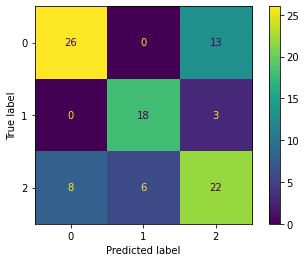

precision :  0.6978844169246646
recall :  0.7116402116402116
f1_score : 0.7023077872392941

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


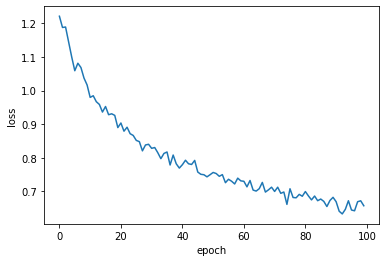

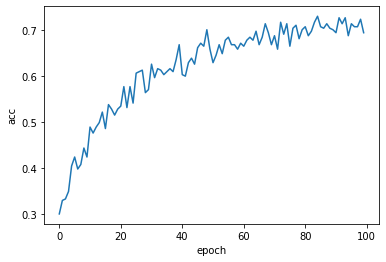

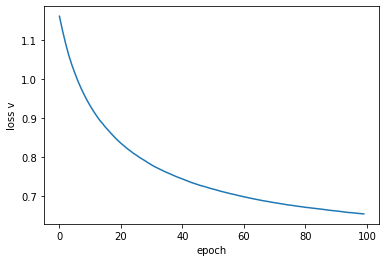

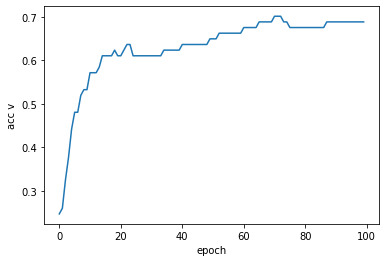

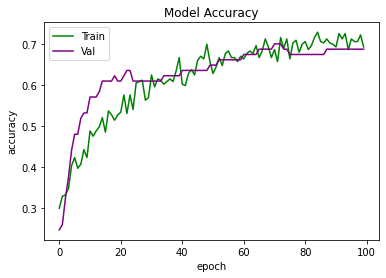

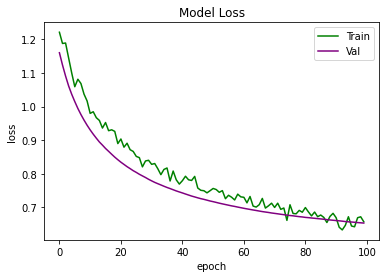

In [ ]:
''' building sequential model '''

model = Sequential()
model.add(Dense(36 , input_dim=X_train.shape[1], activation='tanh'))
model.add(Dropout(0.1))
model.add(Dense(16, activation='tanh'))
model.add(Dropout(0.1))
model.add(Dense(16, activation='tanh'))
model.add(Dropout(0.1))
model.add(Dense(3, activation='softmax'))

#change hyperparameter
opt = keras.optimizers.SGD(learning_rate=0.001)

#Configures the model for training
model.compile(optimizer=opt, loss='sparse_categorical_crossentropy',  metrics=['accuracy'])

#train model
history = model.fit( X_train,  y_train ,validation_split=0.2, batch_size=10, epochs=100 )

#predict on valid set
y_predict=model.predict(X_val)
print(y_predict.shape)

# returning Indices of the max element(because yval is (96,1) to compare output with yval we need change (96,3) to (96, ) )
y_predict= np.argmax(y_predict,axis=1)
print(y_predict.shape)
print("y_predict = ", y_predict)

#report result of all metrics
print(classification_report(y_val,y_predict))

#plot confusion matrix
confusion = confusion_matrix(y_val,y_predict)
print("confusion matrix = " ,confusion)
mat = ConfusionMatrixDisplay(confusion_matrix=confusion)
mat.plot()
plt.show()


#result of all metrics
print("precision : ",precision_score(y_val,y_predict,average='macro'))
print("recall : ",recall_score(y_val,y_predict,average='macro'))
print("f1_score :",f1_score(y_val,y_predict,average='macro'))


print("")
print(history.history.keys())
h =history.history

plt.plot(h['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

plt.plot(h['accuracy'])
plt.xlabel('epoch')
plt.ylabel('acc')
plt.show()

plt.plot(h['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss v')
plt.show()

plt.plot(h['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('acc v')
plt.show()


plt.title('Model Accuracy')
plt.plot(h['accuracy'], color = 'green')
plt.plot(h['val_accuracy'], color = 'purple')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['Train','Val'])
plt.show()


plt.title('Model Loss')
plt.plot(h['loss'], color = 'green')
plt.plot(h['val_loss'], color = 'purple')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['Train','Val'])
plt.show()

# sgd tanh batch

In [ ]:
''' building sequential model '''

model = Sequential()
model.add(Dense(36 , input_dim=X_train.shape[1], activation='tanh'))
model.add(BatchNormalization())
model.add(Dense(16, activation='tanh'))
model.add(BatchNormalization())
model.add(Dense(16, activation='tanh'))
model.add(BatchNormalization())
model.add(Dense(3, activation='softmax'))

#change hyperparameter
opt = keras.optimizers.SGD(learning_rate=0.001)

#Configures the model for training
model.compile(optimizer=opt, loss='sparse_categorical_crossentropy',  metrics=['accuracy'])

#train model
history = model.fit( X_train,  y_train ,validation_split=0.2, batch_size=10, epochs=100 )

#predict on valid set
y_predict=model.predict(X_val)
print(y_predict.shape)

# returning Indices of the max element(because yval is (96,1) to compare output with yval we need change (96,3) to (96, ) )
y_predict= np.argmax(y_predict,axis=1)
print(y_predict.shape)
print("y_predict = ", y_predict)

#report result of all metrics
print(classification_report(y_val,y_predict))

#plot confusion matrix
confusion = confusion_matrix(y_val,y_predict)
print("confusion matrix = " ,confusion)
mat = ConfusionMatrixDisplay(confusion_matrix=confusion)
mat.plot()
plt.show()


#result of all metrics
print("precision : ",precision_score(y_val,y_predict,average='macro'))
print("recall : ",recall_score(y_val,y_predict,average='macro'))
print("f1_score :",f1_score(y_val,y_predict,average='macro'))


print("")
print(history.history.keys())
h =history.history

plt.plot(h['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

plt.plot(h['accuracy'])
plt.xlabel('epoch')
plt.ylabel('acc')
plt.show()

plt.plot(h['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss v')
plt.show()

plt.plot(h['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('acc v')
plt.show()


plt.title('Model Accuracy')
plt.plot(h['accuracy'], color = 'green')
plt.plot(h['val_accuracy'], color = 'purple')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['Train','Val'])
plt.show()


plt.title('Model Loss')
plt.plot(h['loss'], color = 'green')
plt.plot(h['val_loss'], color = 'purple')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['Train','Val'])
plt.show()

# RMS , relu

In [ ]:
''' building sequential model '''

model = Sequential()
model.add(Dense(36 , input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(3, activation='softmax'))

#change hyperparameter
opt = keras.optimizers.RMSprop(learning_rate=0.001)

#Configures the model for training
model.compile(optimizer=opt, loss='sparse_categorical_crossentropy',  metrics=['accuracy'])

#train model
history = model.fit( X_train,  y_train ,validation_split=0.2, batch_size=10, epochs=100 )

#predict on valid set
y_predict=model.predict(X_val)
print(y_predict.shape)

# returning Indices of the max element(because yval is (96,1) to compare output with yval we need change (96,3) to (96, ) )
y_predict= np.argmax(y_predict,axis=1)
print(y_predict.shape)
print("y_predict = ", y_predict)

#report result of all metrics
print(classification_report(y_val,y_predict))

#plot confusion matrix
confusion = confusion_matrix(y_val,y_predict)
print("confusion matrix = " ,confusion)
mat = ConfusionMatrixDisplay(confusion_matrix=confusion)
mat.plot()
plt.show()


#result of all metrics
print("precision : ",precision_score(y_val,y_predict,average='macro'))
print("recall : ",recall_score(y_val,y_predict,average='macro'))
print("f1_score :",f1_score(y_val,y_predict,average='macro'))


print("")
print(history.history.keys())
h =history.history

plt.plot(h['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

plt.plot(h['accuracy'])
plt.xlabel('epoch')
plt.ylabel('acc')
plt.show()

plt.plot(h['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss v')
plt.show()

plt.plot(h['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('acc v')
plt.show()


plt.title('Model Accuracy')
plt.plot(h['accuracy'], color = 'green')
plt.plot(h['val_accuracy'], color = 'purple')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['Train','Val'])
plt.show()


plt.title('Model Loss')
plt.plot(h['loss'], color = 'green')
plt.plot(h['val_loss'], color = 'purple')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['Train','Val'])
plt.show()

# rms , relu , dropout

In [ ]:
''' building sequential model '''

model = Sequential()
model.add(Dense(36 , input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(3, activation='softmax'))

#change hyperparameter
opt = keras.optimizers.RMSprop(learning_rate=0.001)

#Configures the model for training
model.compile(optimizer=opt, loss='sparse_categorical_crossentropy',  metrics=['accuracy'])

#train model
history = model.fit( X_train,  y_train ,validation_split=0.2, batch_size=10, epochs=100 )

#predict on valid set
y_predict=model.predict(X_val)
print(y_predict.shape)

# returning Indices of the max element(because yval is (96,1) to compare output with yval we need change (96,3) to (96, ) )
y_predict= np.argmax(y_predict,axis=1)
print(y_predict.shape)
print("y_predict = ", y_predict)

#report result of all metrics
print(classification_report(y_val,y_predict))

#plot confusion matrix
confusion = confusion_matrix(y_val,y_predict)
print("confusion matrix = " ,confusion)
mat = ConfusionMatrixDisplay(confusion_matrix=confusion)
mat.plot()
plt.show()


#result of all metrics
print("precision : ",precision_score(y_val,y_predict,average='macro'))
print("recall : ",recall_score(y_val,y_predict,average='macro'))
print("f1_score :",f1_score(y_val,y_predict,average='macro'))


print("")
print(history.history.keys())
h =history.history

plt.plot(h['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

plt.plot(h['accuracy'])
plt.xlabel('epoch')
plt.ylabel('acc')
plt.show()

plt.plot(h['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss v')
plt.show()

plt.plot(h['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('acc v')
plt.show()


plt.title('Model Accuracy')
plt.plot(h['accuracy'], color = 'green')
plt.plot(h['val_accuracy'], color = 'purple')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['Train','Val'])
plt.show()


plt.title('Model Loss')
plt.plot(h['loss'], color = 'green')
plt.plot(h['val_loss'], color = 'purple')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['Train','Val'])
plt.show()

# rms relu batch

In [ ]:
''' building sequential model '''

model = Sequential()
model.add(Dense(36 , input_dim=X_train.shape[1], activation='relu'))
model.add(BatchNormalization())
model.add(Dense(16, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(16, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(3, activation='softmax'))

#change hyperparameter
opt = keras.optimizers.RMSprop(learning_rate=0.001)

#Configures the model for training
model.compile(optimizer=opt, loss='sparse_categorical_crossentropy',  metrics=['accuracy'])

#train model
history = model.fit( X_train,  y_train ,validation_split=0.2, batch_size=10, epochs=100 )

#predict on valid set
y_predict=model.predict(X_val)
print(y_predict.shape)

# returning Indices of the max element(because yval is (96,1) to compare output with yval we need change (96,3) to (96, ) )
y_predict= np.argmax(y_predict,axis=1)
print(y_predict.shape)
print("y_predict = ", y_predict)

#report result of all metrics
print(classification_report(y_val,y_predict))

#plot confusion matrix
confusion = confusion_matrix(y_val,y_predict)
print("confusion matrix = " ,confusion)
mat = ConfusionMatrixDisplay(confusion_matrix=confusion)
mat.plot()
plt.show()


#result of all metrics
print("precision : ",precision_score(y_val,y_predict,average='macro'))
print("recall : ",recall_score(y_val,y_predict,average='macro'))
print("f1_score :",f1_score(y_val,y_predict,average='macro'))


print("")
print(history.history.keys())
h =history.history

plt.plot(h['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

plt.plot(h['accuracy'])
plt.xlabel('epoch')
plt.ylabel('acc')
plt.show()

plt.plot(h['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss v')
plt.show()

plt.plot(h['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('acc v')
plt.show()


plt.title('Model Accuracy')
plt.plot(h['accuracy'], color = 'green')
plt.plot(h['val_accuracy'], color = 'purple')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['Train','Val'])
plt.show()


plt.title('Model Loss')
plt.plot(h['loss'], color = 'green')
plt.plot(h['val_loss'], color = 'purple')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['Train','Val'])
plt.show()

# RMS , sigmoid

In [ ]:
''' building sequential model '''

model = Sequential()
model.add(Dense(36 , input_dim=X_train.shape[1], activation='sigmoid'))
model.add(Dense(16, activation='sigmoid'))
model.add(Dense(16, activation='sigmoid'))
model.add(Dense(3, activation='softmax'))

#change hyperparameter
opt = keras.optimizers.RMSprop(learning_rate=0.001)

#Configures the model for training
model.compile(optimizer=opt, loss='sparse_categorical_crossentropy',  metrics=['accuracy'])

#train model
history = model.fit( X_train,  y_train ,validation_split=0.2, batch_size=10, epochs=100 )

#predict on valid set
y_predict=model.predict(X_val)
print(y_predict.shape)

# returning Indices of the max element(because yval is (96,1) to compare output with yval we need change (96,3) to (96, ) )
y_predict= np.argmax(y_predict,axis=1)
print(y_predict.shape)
print("y_predict = ", y_predict)

#report result of all metrics
print(classification_report(y_val,y_predict))

#plot confusion matrix
confusion = confusion_matrix(y_val,y_predict)
print("confusion matrix = " ,confusion)
mat = ConfusionMatrixDisplay(confusion_matrix=confusion)
mat.plot()
plt.show()


#result of all metrics
print("precision : ",precision_score(y_val,y_predict,average='macro'))
print("recall : ",recall_score(y_val,y_predict,average='macro'))
print("f1_score :",f1_score(y_val,y_predict,average='macro'))


print("")
print(history.history.keys())
h =history.history

plt.plot(h['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

plt.plot(h['accuracy'])
plt.xlabel('epoch')
plt.ylabel('acc')
plt.show()

plt.plot(h['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss v')
plt.show()

plt.plot(h['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('acc v')
plt.show()


plt.title('Model Accuracy')
plt.plot(h['accuracy'], color = 'green')
plt.plot(h['val_accuracy'], color = 'purple')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['Train','Val'])
plt.show()


plt.title('Model Loss')
plt.plot(h['loss'], color = 'green')
plt.plot(h['val_loss'], color = 'purple')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['Train','Val'])
plt.show()

# rms , sigmoid , drop out

In [ ]:
''' building sequential model '''

model = Sequential()
model.add(Dense(36 , input_dim=X_train.shape[1], activation='sigmoid'))
model.add(Dropout(0.1))
model.add(Dense(16, activation='sigmoid'))
model.add(Dropout(0.1))
model.add(Dense(16, activation='sigmoid'))
model.add(Dropout(0.1))
model.add(Dense(3, activation='softmax'))

#change hyperparameter
opt = keras.optimizers.RMSprop(learning_rate=0.001)

#Configures the model for training
model.compile(optimizer=opt, loss='sparse_categorical_crossentropy',  metrics=['accuracy'])

#train model
history = model.fit( X_train,  y_train ,validation_split=0.2, batch_size=10, epochs=100 )

#predict on valid set
y_predict=model.predict(X_val)
print(y_predict.shape)

# returning Indices of the max element(because yval is (96,1) to compare output with yval we need change (96,3) to (96, ) )
y_predict= np.argmax(y_predict,axis=1)
print(y_predict.shape)
print("y_predict = ", y_predict)

#report result of all metrics
print(classification_report(y_val,y_predict))

#plot confusion matrix
confusion = confusion_matrix(y_val,y_predict)
print("confusion matrix = " ,confusion)
mat = ConfusionMatrixDisplay(confusion_matrix=confusion)
mat.plot()
plt.show()


#result of all metrics
print("precision : ",precision_score(y_val,y_predict,average='macro'))
print("recall : ",recall_score(y_val,y_predict,average='macro'))
print("f1_score :",f1_score(y_val,y_predict,average='macro'))


print("")
print(history.history.keys())
h =history.history

plt.plot(h['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

plt.plot(h['accuracy'])
plt.xlabel('epoch')
plt.ylabel('acc')
plt.show()

plt.plot(h['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss v')
plt.show()

plt.plot(h['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('acc v')
plt.show()


plt.title('Model Accuracy')
plt.plot(h['accuracy'], color = 'green')
plt.plot(h['val_accuracy'], color = 'purple')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['Train','Val'])
plt.show()


plt.title('Model Loss')
plt.plot(h['loss'], color = 'green')
plt.plot(h['val_loss'], color = 'purple')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['Train','Val'])
plt.show()

# rms sigmoid batch

In [ ]:
''' building sequential model '''

model = Sequential()
model.add(Dense(36 , input_dim=X_train.shape[1], activation='sigmoid'))
model.add(BatchNormalization())
model.add(Dense(16, activation='sigmoid'))
model.add(BatchNormalization())
model.add(Dense(16, activation='sigmoid'))
model.add(BatchNormalization())
model.add(Dense(3, activation='softmax'))

#change hyperparameter
opt = keras.optimizers.RMSprop(learning_rate=0.001)

#Configures the model for training
model.compile(optimizer=opt, loss='sparse_categorical_crossentropy',  metrics=['accuracy'])

#train model
history = model.fit( X_train,  y_train ,validation_split=0.2, batch_size=10, epochs=100 )

#predict on valid set
y_predict=model.predict(X_val)
print(y_predict.shape)

# returning Indices of the max element(because yval is (96,1) to compare output with yval we need change (96,3) to (96, ) )
y_predict= np.argmax(y_predict,axis=1)
print(y_predict.shape)
print("y_predict = ", y_predict)

#report result of all metrics
print(classification_report(y_val,y_predict))

#plot confusion matrix
confusion = confusion_matrix(y_val,y_predict)
print("confusion matrix = " ,confusion)
mat = ConfusionMatrixDisplay(confusion_matrix=confusion)
mat.plot()
plt.show()


#result of all metrics
print("precision : ",precision_score(y_val,y_predict,average='macro'))
print("recall : ",recall_score(y_val,y_predict,average='macro'))
print("f1_score :",f1_score(y_val,y_predict,average='macro'))


print("")
print(history.history.keys())
h =history.history

plt.plot(h['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

plt.plot(h['accuracy'])
plt.xlabel('epoch')
plt.ylabel('acc')
plt.show()

plt.plot(h['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss v')
plt.show()

plt.plot(h['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('acc v')
plt.show()


plt.title('Model Accuracy')
plt.plot(h['accuracy'], color = 'green')
plt.plot(h['val_accuracy'], color = 'purple')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['Train','Val'])
plt.show()


plt.title('Model Loss')
plt.plot(h['loss'], color = 'green')
plt.plot(h['val_loss'], color = 'purple')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['Train','Val'])
plt.show()

# RMS , tanh

In [ ]:
''' building sequential model '''

model = Sequential()
model.add(Dense(36 , input_dim=X_train.shape[1], activation='tanh'))
model.add(Dense(16, activation='tanh'))
model.add(Dense(16, activation='tanh'))
model.add(Dense(3, activation='softmax'))

#change hyperparameter
opt = keras.optimizers.RMSprop(learning_rate=0.001)

#Configures the model for training
model.compile(optimizer=opt, loss='sparse_categorical_crossentropy',  metrics=['accuracy'])

#train model
history = model.fit( X_train,  y_train ,validation_split=0.2, batch_size=10, epochs=100 )

#predict on valid set
y_predict=model.predict(X_val)
print(y_predict.shape)

# returning Indices of the max element(because yval is (96,1) to compare output with yval we need change (96,3) to (96, ) )
y_predict= np.argmax(y_predict,axis=1)
print(y_predict.shape)
print("y_predict = ", y_predict)

#report result of all metrics
print(classification_report(y_val,y_predict))

#plot confusion matrix
confusion = confusion_matrix(y_val,y_predict)
print("confusion matrix = " ,confusion)
mat = ConfusionMatrixDisplay(confusion_matrix=confusion)
mat.plot()
plt.show()


#result of all metrics
print("precision : ",precision_score(y_val,y_predict,average='macro'))
print("recall : ",recall_score(y_val,y_predict,average='macro'))
print("f1_score :",f1_score(y_val,y_predict,average='macro'))


print("")
print(history.history.keys())
h =history.history

plt.plot(h['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

plt.plot(h['accuracy'])
plt.xlabel('epoch')
plt.ylabel('acc')
plt.show()

plt.plot(h['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss v')
plt.show()

plt.plot(h['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('acc v')
plt.show()


plt.title('Model Accuracy')
plt.plot(h['accuracy'], color = 'green')
plt.plot(h['val_accuracy'], color = 'purple')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['Train','Val'])
plt.show()


plt.title('Model Loss')
plt.plot(h['loss'], color = 'green')
plt.plot(h['val_loss'], color = 'purple')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['Train','Val'])
plt.show()

# rms , tanh , dropout

In [ ]:
''' building sequential model '''

model = Sequential()
model.add(Dense(36 , input_dim=X_train.shape[1], activation='tanh'))
model.add(Dropout(0.1))
model.add(Dense(16, activation='tanh'))
model.add(Dropout(0.1))
model.add(Dense(16, activation='tanh'))
model.add(Dropout(0.1))
model.add(Dense(3, activation='softmax'))

#change hyperparameter
opt = keras.optimizers.RMSprop(learning_rate=0.001)

#Configures the model for training
model.compile(optimizer=opt, loss='sparse_categorical_crossentropy',  metrics=['accuracy'])

#train model
history = model.fit( X_train,  y_train ,validation_split=0.2, batch_size=10, epochs=100 )

#predict on valid set
y_predict=model.predict(X_val)
print(y_predict.shape)

# returning Indices of the max element(because yval is (96,1) to compare output with yval we need change (96,3) to (96, ) )
y_predict= np.argmax(y_predict,axis=1)
print(y_predict.shape)
print("y_predict = ", y_predict)

#report result of all metrics
print(classification_report(y_val,y_predict))

#plot confusion matrix
confusion = confusion_matrix(y_val,y_predict)
print("confusion matrix = " ,confusion)
mat = ConfusionMatrixDisplay(confusion_matrix=confusion)
mat.plot()
plt.show()


#result of all metrics
print("precision : ",precision_score(y_val,y_predict,average='macro'))
print("recall : ",recall_score(y_val,y_predict,average='macro'))
print("f1_score :",f1_score(y_val,y_predict,average='macro'))


print("")
print(history.history.keys())
h =history.history

plt.plot(h['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

plt.plot(h['accuracy'])
plt.xlabel('epoch')
plt.ylabel('acc')
plt.show()

plt.plot(h['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss v')
plt.show()

plt.plot(h['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('acc v')
plt.show()


plt.title('Model Accuracy')
plt.plot(h['accuracy'], color = 'green')
plt.plot(h['val_accuracy'], color = 'purple')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['Train','Val'])
plt.show()


plt.title('Model Loss')
plt.plot(h['loss'], color = 'green')
plt.plot(h['val_loss'], color = 'purple')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['Train','Val'])
plt.show()

# rms tanh batch

In [ ]:
''' building sequential model '''

model = Sequential()
model.add(Dense(36 , input_dim=X_train.shape[1], activation='tanh'))
model.add(BatchNormalization())
model.add(Dense(16, activation='tanh'))
model.add(BatchNormalization())
model.add(Dense(16, activation='tanh'))
model.add(BatchNormalization())
model.add(Dense(3, activation='softmax'))

#change hyperparameter
opt = keras.optimizers.RMSprop(learning_rate=0.001)

#Configures the model for training
model.compile(optimizer=opt, loss='sparse_categorical_crossentropy',  metrics=['accuracy'])

#train model
history = model.fit( X_train,  y_train ,validation_split=0.2, batch_size=10, epochs=100 )

#predict on valid set
y_predict=model.predict(X_val)
print(y_predict.shape)

# returning Indices of the max element(because yval is (96,1) to compare output with yval we need change (96,3) to (96, ) )
y_predict= np.argmax(y_predict,axis=1)
print(y_predict.shape)
print("y_predict = ", y_predict)

#report result of all metrics
print(classification_report(y_val,y_predict))

#plot confusion matrix
confusion = confusion_matrix(y_val,y_predict)
print("confusion matrix = " ,confusion)
mat = ConfusionMatrixDisplay(confusion_matrix=confusion)
mat.plot()
plt.show()


#result of all metrics
print("precision : ",precision_score(y_val,y_predict,average='macro'))
print("recall : ",recall_score(y_val,y_predict,average='macro'))
print("f1_score :",f1_score(y_val,y_predict,average='macro'))


print("")
print(history.history.keys())
h =history.history

plt.plot(h['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

plt.plot(h['accuracy'])
plt.xlabel('epoch')
plt.ylabel('acc')
plt.show()

plt.plot(h['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss v')
plt.show()

plt.plot(h['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('acc v')
plt.show()


plt.title('Model Accuracy')
plt.plot(h['accuracy'], color = 'green')
plt.plot(h['val_accuracy'], color = 'purple')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['Train','Val'])
plt.show()


plt.title('Model Loss')
plt.plot(h['loss'], color = 'green')
plt.plot(h['val_loss'], color = 'purple')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['Train','Val'])
plt.show()

# 5 **LAYER**

# adam relu

In [ ]:
''' building sequential model '''

model = Sequential()
model.add(Dense(36 , input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(3, activation='softmax'))

#change hyperparameter
opt = keras.optimizers.Adam(learning_rate=0.001)

#Configures the model for training
model.compile(optimizer=opt, loss='sparse_categorical_crossentropy',  metrics=['accuracy'])

#train model
history = model.fit( X_train,  y_train ,validation_split=0.2, batch_size=10, epochs=100 )

#predict on valid set
y_predict=model.predict(X_val)
print(y_predict.shape)

# returning Indices of the max element(because yval is (96,1) to compare output with yval we need change (96,3) to (96, ) )
y_predict= np.argmax(y_predict,axis=1)
print(y_predict.shape)
print("y_predict = ", y_predict)

#report result of all metrics
print(classification_report(y_val,y_predict))

#plot confusion matrix
confusion = confusion_matrix(y_val,y_predict)
print("confusion matrix = " ,confusion)
mat = ConfusionMatrixDisplay(confusion_matrix=confusion)
mat.plot()
plt.show()


#result of all metrics
print("precision : ",precision_score(y_val,y_predict,average='macro'))
print("recall : ",recall_score(y_val,y_predict,average='macro'))
print("f1_score :",f1_score(y_val,y_predict,average='macro'))


print("")
print(history.history.keys())
h =history.history

plt.plot(h['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

plt.plot(h['accuracy'])
plt.xlabel('epoch')
plt.ylabel('acc')
plt.show()

plt.plot(h['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss v')
plt.show()

plt.plot(h['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('acc v')
plt.show()


plt.title('Model Accuracy')
plt.plot(h['accuracy'], color = 'green')
plt.plot(h['val_accuracy'], color = 'purple')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['Train','Val'])
plt.show()


plt.title('Model Loss')
plt.plot(h['loss'], color = 'green')
plt.plot(h['val_loss'], color = 'purple')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['Train','Val'])
plt.show()

# adam relu dropout

In [ ]:
''' building sequential model '''

model = Sequential()
model.add(Dense(36 , input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(8, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(3, activation='softmax'))

#change hyperparameter
opt = keras.optimizers.Adam(learning_rate=0.001)

#Configures the model for training
model.compile(optimizer=opt, loss='sparse_categorical_crossentropy',  metrics=['accuracy'])

#train model
history = model.fit( X_train,  y_train ,validation_split=0.2, batch_size=10, epochs=100 )

#predict on valid set
y_predict=model.predict(X_val)
print(y_predict.shape)

# returning Indices of the max element(because yval is (96,1) to compare output with yval we need change (96,3) to (96, ) )
y_predict= np.argmax(y_predict,axis=1)
print(y_predict.shape)
print("y_predict = ", y_predict)

#report result of all metrics
print(classification_report(y_val,y_predict))

#plot confusion matrix
confusion = confusion_matrix(y_val,y_predict)
print("confusion matrix = " ,confusion)
mat = ConfusionMatrixDisplay(confusion_matrix=confusion)
mat.plot()
plt.show()


#result of all metrics
print("precision : ",precision_score(y_val,y_predict,average='macro'))
print("recall : ",recall_score(y_val,y_predict,average='macro'))
print("f1_score :",f1_score(y_val,y_predict,average='macro'))


print("")
print(history.history.keys())
h =history.history

plt.plot(h['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

plt.plot(h['accuracy'])
plt.xlabel('epoch')
plt.ylabel('acc')
plt.show()

plt.plot(h['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss v')
plt.show()

plt.plot(h['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('acc v')
plt.show()


plt.title('Model Accuracy')
plt.plot(h['accuracy'], color = 'green')
plt.plot(h['val_accuracy'], color = 'purple')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['Train','Val'])
plt.show()


plt.title('Model Loss')
plt.plot(h['loss'], color = 'green')
plt.plot(h['val_loss'], color = 'purple')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['Train','Val'])
plt.show()

# adam relu batch

In [ ]:
''' building sequential model '''

model = Sequential()
model.add(Dense(36 , input_dim=X_train.shape[1], activation='relu'))
model.add(BatchNormalization())
model.add(Dense(16, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(16, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(8, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(3, activation='softmax'))

#change hyperparameter
opt = keras.optimizers.Adam(learning_rate=0.001)

#Configures the model for training
model.compile(optimizer=opt, loss='sparse_categorical_crossentropy',  metrics=['accuracy'])

#train model
history = model.fit( X_train,  y_train ,validation_split=0.2, batch_size=10, epochs=100 )

#predict on valid set
y_predict=model.predict(X_val)
print(y_predict.shape)

# returning Indices of the max element(because yval is (96,1) to compare output with yval we need change (96,3) to (96, ) )
y_predict= np.argmax(y_predict,axis=1)
print(y_predict.shape)
print("y_predict = ", y_predict)

#report result of all metrics
print(classification_report(y_val,y_predict))

#plot confusion matrix
confusion = confusion_matrix(y_val,y_predict)
print("confusion matrix = " ,confusion)
mat = ConfusionMatrixDisplay(confusion_matrix=confusion)
mat.plot()
plt.show()


#result of all metrics
print("precision : ",precision_score(y_val,y_predict,average='macro'))
print("recall : ",recall_score(y_val,y_predict,average='macro'))
print("f1_score :",f1_score(y_val,y_predict,average='macro'))


print("")
print(history.history.keys())
h =history.history

plt.plot(h['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

plt.plot(h['accuracy'])
plt.xlabel('epoch')
plt.ylabel('acc')
plt.show()

plt.plot(h['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss v')
plt.show()

plt.plot(h['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('acc v')
plt.show()


plt.title('Model Accuracy')
plt.plot(h['accuracy'], color = 'green')
plt.plot(h['val_accuracy'], color = 'purple')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['Train','Val'])
plt.show()


plt.title('Model Loss')
plt.plot(h['loss'], color = 'green')
plt.plot(h['val_loss'], color = 'purple')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['Train','Val'])
plt.show()

# adam sig

In [ ]:
''' building sequential model '''

model = Sequential()
model.add(Dense(36 , input_dim=X_train.shape[1], activation='sigmoid'))
model.add(Dense(16, activation='sigmoid'))
model.add(Dense(16, activation='sigmoid'))
model.add(Dense(8, activation='sigmoid'))
model.add(Dense(3, activation='softmax'))

#change hyperparameter
opt = keras.optimizers.Adam(learning_rate=0.001)

#Configures the model for training
model.compile(optimizer=opt, loss='sparse_categorical_crossentropy',  metrics=['accuracy'])

#train model
history = model.fit( X_train,  y_train ,validation_split=0.2, batch_size=10, epochs=100 )

#predict on valid set
y_predict=model.predict(X_val)
print(y_predict.shape)

# returning Indices of the max element(because yval is (96,1) to compare output with yval we need change (96,3) to (96, ) )
y_predict= np.argmax(y_predict,axis=1)
print(y_predict.shape)
print("y_predict = ", y_predict)

#report result of all metrics
print(classification_report(y_val,y_predict))

#plot confusion matrix
confusion = confusion_matrix(y_val,y_predict)
print("confusion matrix = " ,confusion)
mat = ConfusionMatrixDisplay(confusion_matrix=confusion)
mat.plot()
plt.show()


#result of all metrics
print("precision : ",precision_score(y_val,y_predict,average='macro'))
print("recall : ",recall_score(y_val,y_predict,average='macro'))
print("f1_score :",f1_score(y_val,y_predict,average='macro'))


print("")
print(history.history.keys())
h =history.history

plt.plot(h['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

plt.plot(h['accuracy'])
plt.xlabel('epoch')
plt.ylabel('acc')
plt.show()

plt.plot(h['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss v')
plt.show()

plt.plot(h['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('acc v')
plt.show()


plt.title('Model Accuracy')
plt.plot(h['accuracy'], color = 'green')
plt.plot(h['val_accuracy'], color = 'purple')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['Train','Val'])
plt.show()


plt.title('Model Loss')
plt.plot(h['loss'], color = 'green')
plt.plot(h['val_loss'], color = 'purple')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['Train','Val'])
plt.show()

# adam sig dropout

In [ ]:
''' building sequential model '''

model = Sequential()
model.add(Dense(36 , input_dim=X_train.shape[1], activation='sigmoid'))
model.add(Dropout(0.1))
model.add(Dense(16, activation='sigmoid'))
model.add(Dropout(0.1))
model.add(Dense(16, activation='sigmoid'))
model.add(Dropout(0.1))
model.add(Dense(8, activation='sigmoid'))
model.add(Dropout(0.1))
model.add(Dense(3, activation='softmax'))

#change hyperparameter
opt = keras.optimizers.Adam(learning_rate=0.001)

#Configures the model for training
model.compile(optimizer=opt, loss='sparse_categorical_crossentropy',  metrics=['accuracy'])

#train model
history = model.fit( X_train,  y_train ,validation_split=0.2, batch_size=10, epochs=100 )

#predict on valid set
y_predict=model.predict(X_val)
print(y_predict.shape)

# returning Indices of the max element(because yval is (96,1) to compare output with yval we need change (96,3) to (96, ) )
y_predict= np.argmax(y_predict,axis=1)
print(y_predict.shape)
print("y_predict = ", y_predict)

#report result of all metrics
print(classification_report(y_val,y_predict))

#plot confusion matrix
confusion = confusion_matrix(y_val,y_predict)
print("confusion matrix = " ,confusion)
mat = ConfusionMatrixDisplay(confusion_matrix=confusion)
mat.plot()
plt.show()


#result of all metrics
print("precision : ",precision_score(y_val,y_predict,average='macro'))
print("recall : ",recall_score(y_val,y_predict,average='macro'))
print("f1_score :",f1_score(y_val,y_predict,average='macro'))


print("")
print(history.history.keys())
h =history.history

plt.plot(h['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

plt.plot(h['accuracy'])
plt.xlabel('epoch')
plt.ylabel('acc')
plt.show()

plt.plot(h['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss v')
plt.show()

plt.plot(h['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('acc v')
plt.show()


plt.title('Model Accuracy')
plt.plot(h['accuracy'], color = 'green')
plt.plot(h['val_accuracy'], color = 'purple')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['Train','Val'])
plt.show()


plt.title('Model Loss')
plt.plot(h['loss'], color = 'green')
plt.plot(h['val_loss'], color = 'purple')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['Train','Val'])
plt.show()

# adam sig batch

In [ ]:
''' building sequential model '''

model = Sequential()
model.add(Dense(36 , input_dim=X_train.shape[1], activation='sigmoid'))
model.add(BatchNormalization())
model.add(Dense(16, activation='sigmoid'))
model.add(BatchNormalization())
model.add(Dense(16, activation='sigmoid'))
model.add(BatchNormalization())
model.add(Dense(8, activation='sigmoid'))
model.add(BatchNormalization())
model.add(Dense(3, activation='softmax'))

#change hyperparameter
opt = keras.optimizers.Adam(learning_rate=0.001)

#Configures the model for training
model.compile(optimizer=opt, loss='sparse_categorical_crossentropy',  metrics=['accuracy'])

#train model
history = model.fit( X_train,  y_train ,validation_split=0.2, batch_size=10, epochs=100 )

#predict on valid set
y_predict=model.predict(X_val)
print(y_predict.shape)

# returning Indices of the max element(because yval is (96,1) to compare output with yval we need change (96,3) to (96, ) )
y_predict= np.argmax(y_predict,axis=1)
print(y_predict.shape)
print("y_predict = ", y_predict)

#report result of all metrics
print(classification_report(y_val,y_predict))

#plot confusion matrix
confusion = confusion_matrix(y_val,y_predict)
print("confusion matrix = " ,confusion)
mat = ConfusionMatrixDisplay(confusion_matrix=confusion)
mat.plot()
plt.show()


#result of all metrics
print("precision : ",precision_score(y_val,y_predict,average='macro'))
print("recall : ",recall_score(y_val,y_predict,average='macro'))
print("f1_score :",f1_score(y_val,y_predict,average='macro'))


print("")
print(history.history.keys())
h =history.history

plt.plot(h['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

plt.plot(h['accuracy'])
plt.xlabel('epoch')
plt.ylabel('acc')
plt.show()

plt.plot(h['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss v')
plt.show()

plt.plot(h['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('acc v')
plt.show()


plt.title('Model Accuracy')
plt.plot(h['accuracy'], color = 'green')
plt.plot(h['val_accuracy'], color = 'purple')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['Train','Val'])
plt.show()


plt.title('Model Loss')
plt.plot(h['loss'], color = 'green')
plt.plot(h['val_loss'], color = 'purple')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['Train','Val'])
plt.show()

# adam tanh

In [ ]:
''' building sequential model '''

model = Sequential()
model.add(Dense(36 , input_dim=X_train.shape[1], activation='tanh'))
model.add(Dense(16, activation='tanh'))
model.add(Dense(16, activation='tanh'))
model.add(Dense(8, activation='tanh'))
model.add(Dense(3, activation='softmax'))

#change hyperparameter
opt = keras.optimizers.Adam(learning_rate=0.001)

#Configures the model for training
model.compile(optimizer=opt, loss='sparse_categorical_crossentropy',  metrics=['accuracy'])

#train model
history = model.fit( X_train,  y_train ,validation_split=0.2, batch_size=10, epochs=100 )

#predict on valid set
y_predict=model.predict(X_val)
print(y_predict.shape)

# returning Indices of the max element(because yval is (96,1) to compare output with yval we need change (96,3) to (96, ) )
y_predict= np.argmax(y_predict,axis=1)
print(y_predict.shape)
print("y_predict = ", y_predict)

#report result of all metrics
print(classification_report(y_val,y_predict))

#plot confusion matrix
confusion = confusion_matrix(y_val,y_predict)
print("confusion matrix = " ,confusion)
mat = ConfusionMatrixDisplay(confusion_matrix=confusion)
mat.plot()
plt.show()


#result of all metrics
print("precision : ",precision_score(y_val,y_predict,average='macro'))
print("recall : ",recall_score(y_val,y_predict,average='macro'))
print("f1_score :",f1_score(y_val,y_predict,average='macro'))


print("")
print(history.history.keys())
h =history.history

plt.plot(h['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

plt.plot(h['accuracy'])
plt.xlabel('epoch')
plt.ylabel('acc')
plt.show()

plt.plot(h['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss v')
plt.show()

plt.plot(h['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('acc v')
plt.show()


plt.title('Model Accuracy')
plt.plot(h['accuracy'], color = 'green')
plt.plot(h['val_accuracy'], color = 'purple')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['Train','Val'])
plt.show()


plt.title('Model Loss')
plt.plot(h['loss'], color = 'green')
plt.plot(h['val_loss'], color = 'purple')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['Train','Val'])
plt.show()

# adam tanh dropout

In [ ]:
''' building sequential model '''

model = Sequential()
model.add(Dense(36 , input_dim=X_train.shape[1], activation='tanh'))
model.add(Dropout(0.1))
model.add(Dense(16, activation='tanh'))
model.add(Dropout(0.1))
model.add(Dense(16, activation='tanh'))
model.add(Dropout(0.1))
model.add(Dense(8, activation='tanh'))
model.add(Dropout(0.1))
model.add(Dense(3, activation='softmax'))

#change hyperparameter
opt = keras.optimizers.Adam(learning_rate=0.001)

#Configures the model for training
model.compile(optimizer=opt, loss='sparse_categorical_crossentropy',  metrics=['accuracy'])

#train model
history = model.fit( X_train,  y_train ,validation_split=0.2, batch_size=10, epochs=100 )

#predict on valid set
y_predict=model.predict(X_val)
print(y_predict.shape)

# returning Indices of the max element(because yval is (96,1) to compare output with yval we need change (96,3) to (96, ) )
y_predict= np.argmax(y_predict,axis=1)
print(y_predict.shape)
print("y_predict = ", y_predict)

#report result of all metrics
print(classification_report(y_val,y_predict))

#plot confusion matrix
confusion = confusion_matrix(y_val,y_predict)
print("confusion matrix = " ,confusion)
mat = ConfusionMatrixDisplay(confusion_matrix=confusion)
mat.plot()
plt.show()


#result of all metrics
print("precision : ",precision_score(y_val,y_predict,average='macro'))
print("recall : ",recall_score(y_val,y_predict,average='macro'))
print("f1_score :",f1_score(y_val,y_predict,average='macro'))


print("")
print(history.history.keys())
h =history.history

plt.plot(h['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

plt.plot(h['accuracy'])
plt.xlabel('epoch')
plt.ylabel('acc')
plt.show()

plt.plot(h['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss v')
plt.show()

plt.plot(h['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('acc v')
plt.show()


plt.title('Model Accuracy')
plt.plot(h['accuracy'], color = 'green')
plt.plot(h['val_accuracy'], color = 'purple')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['Train','Val'])
plt.show()


plt.title('Model Loss')
plt.plot(h['loss'], color = 'green')
plt.plot(h['val_loss'], color = 'purple')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['Train','Val'])
plt.show()

# adam tanh batch

In [ ]:
''' building sequential model '''

model = Sequential()
model.add(Dense(36 , input_dim=X_train.shape[1], activation='tanh'))
model.add(BatchNormalization())
model.add(Dense(16, activation='tanh'))
model.add(BatchNormalization())
model.add(Dense(16, activation='tanh'))
model.add(BatchNormalization())
model.add(Dense(8, activation='tanh'))
model.add(BatchNormalization())
model.add(Dense(3, activation='softmax'))

#change hyperparameter
opt = keras.optimizers.Adam(learning_rate=0.001)

#Configures the model for training
model.compile(optimizer=opt, loss='sparse_categorical_crossentropy',  metrics=['accuracy'])

#train model
history = model.fit( X_train,  y_train ,validation_split=0.2, batch_size=10, epochs=100 )

#predict on valid set
y_predict=model.predict(X_val)
print(y_predict.shape)

# returning Indices of the max element(because yval is (96,1) to compare output with yval we need change (96,3) to (96, ) )
y_predict= np.argmax(y_predict,axis=1)
print(y_predict.shape)
print("y_predict = ", y_predict)

#report result of all metrics
print(classification_report(y_val,y_predict))

#plot confusion matrix
confusion = confusion_matrix(y_val,y_predict)
print("confusion matrix = " ,confusion)
mat = ConfusionMatrixDisplay(confusion_matrix=confusion)
mat.plot()
plt.show()


#result of all metrics
print("precision : ",precision_score(y_val,y_predict,average='macro'))
print("recall : ",recall_score(y_val,y_predict,average='macro'))
print("f1_score :",f1_score(y_val,y_predict,average='macro'))


print("")
print(history.history.keys())
h =history.history

plt.plot(h['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

plt.plot(h['accuracy'])
plt.xlabel('epoch')
plt.ylabel('acc')
plt.show()

plt.plot(h['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss v')
plt.show()

plt.plot(h['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('acc v')
plt.show()


plt.title('Model Accuracy')
plt.plot(h['accuracy'], color = 'green')
plt.plot(h['val_accuracy'], color = 'purple')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['Train','Val'])
plt.show()


plt.title('Model Loss')
plt.plot(h['loss'], color = 'green')
plt.plot(h['val_loss'], color = 'purple')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['Train','Val'])
plt.show()

# sgd relu

In [ ]:
''' building sequential model '''

model = Sequential()
model.add(Dense(36 , input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(3, activation='softmax'))

#change hyperparameter
opt = keras.optimizers.SGD(learning_rate=0.001)

#Configures the model for training
model.compile(optimizer=opt, loss='sparse_categorical_crossentropy',  metrics=['accuracy'])

#train model
history = model.fit( X_train,  y_train ,validation_split=0.2, batch_size=10, epochs=100 )

#predict on valid set
y_predict=model.predict(X_val)
print(y_predict.shape)

# returning Indices of the max element(because yval is (96,1) to compare output with yval we need change (96,3) to (96, ) )
y_predict= np.argmax(y_predict,axis=1)
print(y_predict.shape)
print("y_predict = ", y_predict)

#report result of all metrics
print(classification_report(y_val,y_predict))

#plot confusion matrix
confusion = confusion_matrix(y_val,y_predict)
print("confusion matrix = " ,confusion)
mat = ConfusionMatrixDisplay(confusion_matrix=confusion)
mat.plot()
plt.show()


#result of all metrics
print("precision : ",precision_score(y_val,y_predict,average='macro'))
print("recall : ",recall_score(y_val,y_predict,average='macro'))
print("f1_score :",f1_score(y_val,y_predict,average='macro'))


print("")
print(history.history.keys())
h =history.history

plt.plot(h['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

plt.plot(h['accuracy'])
plt.xlabel('epoch')
plt.ylabel('acc')
plt.show()

plt.plot(h['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss v')
plt.show()

plt.plot(h['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('acc v')
plt.show()


plt.title('Model Accuracy')
plt.plot(h['accuracy'], color = 'green')
plt.plot(h['val_accuracy'], color = 'purple')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['Train','Val'])
plt.show()


plt.title('Model Loss')
plt.plot(h['loss'], color = 'green')
plt.plot(h['val_loss'], color = 'purple')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['Train','Val'])
plt.show()

# sgd relu dropout

In [ ]:
''' building sequential model '''

model = Sequential()
model.add(Dense(36 , input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(8, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(3, activation='softmax'))

#change hyperparameter
opt = keras.optimizers.SGD(learning_rate=0.001)

#Configures the model for training
model.compile(optimizer=opt, loss='sparse_categorical_crossentropy',  metrics=['accuracy'])

#train model
history = model.fit( X_train,  y_train ,validation_split=0.2, batch_size=10, epochs=100 )

#predict on valid set
y_predict=model.predict(X_val)
print(y_predict.shape)

# returning Indices of the max element(because yval is (96,1) to compare output with yval we need change (96,3) to (96, ) )
y_predict= np.argmax(y_predict,axis=1)
print(y_predict.shape)
print("y_predict = ", y_predict)

#report result of all metrics
print(classification_report(y_val,y_predict))

#plot confusion matrix
confusion = confusion_matrix(y_val,y_predict)
print("confusion matrix = " ,confusion)
mat = ConfusionMatrixDisplay(confusion_matrix=confusion)
mat.plot()
plt.show()


#result of all metrics
print("precision : ",precision_score(y_val,y_predict,average='macro'))
print("recall : ",recall_score(y_val,y_predict,average='macro'))
print("f1_score :",f1_score(y_val,y_predict,average='macro'))


print("")
print(history.history.keys())
h =history.history

plt.plot(h['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

plt.plot(h['accuracy'])
plt.xlabel('epoch')
plt.ylabel('acc')
plt.show()

plt.plot(h['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss v')
plt.show()

plt.plot(h['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('acc v')
plt.show()


plt.title('Model Accuracy')
plt.plot(h['accuracy'], color = 'green')
plt.plot(h['val_accuracy'], color = 'purple')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['Train','Val'])
plt.show()


plt.title('Model Loss')
plt.plot(h['loss'], color = 'green')
plt.plot(h['val_loss'], color = 'purple')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['Train','Val'])
plt.show()

# sgd relu batch

In [ ]:
''' building sequential model '''

model = Sequential()
model.add(Dense(36 , input_dim=X_train.shape[1], activation='relu'))
model.add(BatchNormalization())
model.add(Dense(16, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(16, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(8, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(3, activation='softmax'))

#change hyperparameter
opt = keras.optimizers.SGD(learning_rate=0.001)

#Configures the model for training
model.compile(optimizer=opt, loss='sparse_categorical_crossentropy',  metrics=['accuracy'])

#train model
history = model.fit( X_train,  y_train ,validation_split=0.2, batch_size=10, epochs=100 )

#predict on valid set
y_predict=model.predict(X_val)
print(y_predict.shape)

# returning Indices of the max element(because yval is (96,1) to compare output with yval we need change (96,3) to (96, ) )
y_predict= np.argmax(y_predict,axis=1)
print(y_predict.shape)
print("y_predict = ", y_predict)

#report result of all metrics
print(classification_report(y_val,y_predict))

#plot confusion matrix
confusion = confusion_matrix(y_val,y_predict)
print("confusion matrix = " ,confusion)
mat = ConfusionMatrixDisplay(confusion_matrix=confusion)
mat.plot()
plt.show()


#result of all metrics
print("precision : ",precision_score(y_val,y_predict,average='macro'))
print("recall : ",recall_score(y_val,y_predict,average='macro'))
print("f1_score :",f1_score(y_val,y_predict,average='macro'))


print("")
print(history.history.keys())
h =history.history

plt.plot(h['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

plt.plot(h['accuracy'])
plt.xlabel('epoch')
plt.ylabel('acc')
plt.show()

plt.plot(h['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss v')
plt.show()

plt.plot(h['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('acc v')
plt.show()


plt.title('Model Accuracy')
plt.plot(h['accuracy'], color = 'green')
plt.plot(h['val_accuracy'], color = 'purple')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['Train','Val'])
plt.show()


plt.title('Model Loss')
plt.plot(h['loss'], color = 'green')
plt.plot(h['val_loss'], color = 'purple')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['Train','Val'])
plt.show()

# sgd sigmoid

In [ ]:
''' building sequential model '''

model = Sequential()
model.add(Dense(36 , input_dim=X_train.shape[1], activation='sigmoid'))
model.add(Dense(16, activation='sigmoid'))
model.add(Dense(16, activation='sigmoid'))
model.add(Dense(8, activation='sigmoid'))
model.add(Dense(3, activation='softmax'))

#change hyperparameter
opt = keras.optimizers.SGD(learning_rate=0.001)

#Configures the model for training
model.compile(optimizer=opt, loss='sparse_categorical_crossentropy',  metrics=['accuracy'])

#train model
history = model.fit( X_train,  y_train ,validation_split=0.2, batch_size=10, epochs=100 )

#predict on valid set
y_predict=model.predict(X_val)
print(y_predict.shape)

# returning Indices of the max element(because yval is (96,1) to compare output with yval we need change (96,3) to (96, ) )
y_predict= np.argmax(y_predict,axis=1)
print(y_predict.shape)
print("y_predict = ", y_predict)

#report result of all metrics
print(classification_report(y_val,y_predict))

#plot confusion matrix
confusion = confusion_matrix(y_val,y_predict)
print("confusion matrix = " ,confusion)
mat = ConfusionMatrixDisplay(confusion_matrix=confusion)
mat.plot()
plt.show()


#result of all metrics
print("precision : ",precision_score(y_val,y_predict,average='macro'))
print("recall : ",recall_score(y_val,y_predict,average='macro'))
print("f1_score :",f1_score(y_val,y_predict,average='macro'))


print("")
print(history.history.keys())
h =history.history

plt.plot(h['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

plt.plot(h['accuracy'])
plt.xlabel('epoch')
plt.ylabel('acc')
plt.show()

plt.plot(h['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss v')
plt.show()

plt.plot(h['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('acc v')
plt.show()


plt.title('Model Accuracy')
plt.plot(h['accuracy'], color = 'green')
plt.plot(h['val_accuracy'], color = 'purple')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['Train','Val'])
plt.show()


plt.title('Model Loss')
plt.plot(h['loss'], color = 'green')
plt.plot(h['val_loss'], color = 'purple')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['Train','Val'])
plt.show()

# sgd sigmoid dropout

In [ ]:
''' building sequential model '''

model = Sequential()
model.add(Dense(36 , input_dim=X_train.shape[1], activation='sigmoid'))
model.add(Dropout(0.1))
model.add(Dense(16, activation='sigmoid'))
model.add(Dropout(0.1))
model.add(Dense(16, activation='sigmoid'))
model.add(Dropout(0.1))
model.add(Dense(8, activation='sigmoid'))
model.add(Dropout(0.1))
model.add(Dense(3, activation='softmax'))

#change hyperparameter
opt = keras.optimizers.SGD(learning_rate=0.001)

#Configures the model for training
model.compile(optimizer=opt, loss='sparse_categorical_crossentropy',  metrics=['accuracy'])

#train model
history = model.fit( X_train,  y_train ,validation_split=0.2, batch_size=10, epochs=100 )

#predict on valid set
y_predict=model.predict(X_val)
print(y_predict.shape)

# returning Indices of the max element(because yval is (96,1) to compare output with yval we need change (96,3) to (96, ) )
y_predict= np.argmax(y_predict,axis=1)
print(y_predict.shape)
print("y_predict = ", y_predict)

#report result of all metrics
print(classification_report(y_val,y_predict))

#plot confusion matrix
confusion = confusion_matrix(y_val,y_predict)
print("confusion matrix = " ,confusion)
mat = ConfusionMatrixDisplay(confusion_matrix=confusion)
mat.plot()
plt.show()


#result of all metrics
print("precision : ",precision_score(y_val,y_predict,average='macro'))
print("recall : ",recall_score(y_val,y_predict,average='macro'))
print("f1_score :",f1_score(y_val,y_predict,average='macro'))


print("")
print(history.history.keys())
h =history.history

plt.plot(h['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

plt.plot(h['accuracy'])
plt.xlabel('epoch')
plt.ylabel('acc')
plt.show()

plt.plot(h['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss v')
plt.show()

plt.plot(h['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('acc v')
plt.show()


plt.title('Model Accuracy')
plt.plot(h['accuracy'], color = 'green')
plt.plot(h['val_accuracy'], color = 'purple')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['Train','Val'])
plt.show()


plt.title('Model Loss')
plt.plot(h['loss'], color = 'green')
plt.plot(h['val_loss'], color = 'purple')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['Train','Val'])
plt.show()

# sgd sigmoid batch

In [ ]:
''' building sequential model '''

model = Sequential()
model.add(Dense(36 , input_dim=X_train.shape[1], activation='sigmoid'))
model.add(BatchNormalization())
model.add(Dense(16, activation='sigmoid'))
model.add(BatchNormalization())
model.add(Dense(16, activation='sigmoid'))
model.add(BatchNormalization())
model.add(Dense(8, activation='sigmoid'))
model.add(BatchNormalization())
model.add(Dense(3, activation='softmax'))

#change hyperparameter
opt = keras.optimizers.SGD(learning_rate=0.001)

#Configures the model for training
model.compile(optimizer=opt, loss='sparse_categorical_crossentropy',  metrics=['accuracy'])

#train model
history = model.fit( X_train,  y_train ,validation_split=0.2, batch_size=10, epochs=100 )

#predict on valid set
y_predict=model.predict(X_val)
print(y_predict.shape)

# returning Indices of the max element(because yval is (96,1) to compare output with yval we need change (96,3) to (96, ) )
y_predict= np.argmax(y_predict,axis=1)
print(y_predict.shape)
print("y_predict = ", y_predict)

#report result of all metrics
print(classification_report(y_val,y_predict))

#plot confusion matrix
confusion = confusion_matrix(y_val,y_predict)
print("confusion matrix = " ,confusion)
mat = ConfusionMatrixDisplay(confusion_matrix=confusion)
mat.plot()
plt.show()


#result of all metrics
print("precision : ",precision_score(y_val,y_predict,average='macro'))
print("recall : ",recall_score(y_val,y_predict,average='macro'))
print("f1_score :",f1_score(y_val,y_predict,average='macro'))


print("")
print(history.history.keys())
h =history.history

plt.plot(h['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

plt.plot(h['accuracy'])
plt.xlabel('epoch')
plt.ylabel('acc')
plt.show()

plt.plot(h['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss v')
plt.show()

plt.plot(h['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('acc v')
plt.show()


plt.title('Model Accuracy')
plt.plot(h['accuracy'], color = 'green')
plt.plot(h['val_accuracy'], color = 'purple')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['Train','Val'])
plt.show()


plt.title('Model Loss')
plt.plot(h['loss'], color = 'green')
plt.plot(h['val_loss'], color = 'purple')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['Train','Val'])
plt.show()

# sgd tanh

In [ ]:
''' building sequential model '''

model = Sequential()
model.add(Dense(36 , input_dim=X_train.shape[1], activation='tanh'))
model.add(Dense(16, activation='tanh'))
model.add(Dense(16, activation='tanh'))
model.add(Dense(8, activation='tanh'))
model.add(Dense(3, activation='softmax'))

#change hyperparameter
opt = keras.optimizers.SGD(learning_rate=0.001)

#Configures the model for training
model.compile(optimizer=opt, loss='sparse_categorical_crossentropy',  metrics=['accuracy'])

#train model
history = model.fit( X_train,  y_train ,validation_split=0.2, batch_size=10, epochs=100 )

#predict on valid set
y_predict=model.predict(X_val)
print(y_predict.shape)

# returning Indices of the max element(because yval is (96,1) to compare output with yval we need change (96,3) to (96, ) )
y_predict= np.argmax(y_predict,axis=1)
print(y_predict.shape)
print("y_predict = ", y_predict)

#report result of all metrics
print(classification_report(y_val,y_predict))

#plot confusion matrix
confusion = confusion_matrix(y_val,y_predict)
print("confusion matrix = " ,confusion)
mat = ConfusionMatrixDisplay(confusion_matrix=confusion)
mat.plot()
plt.show()


#result of all metrics
print("precision : ",precision_score(y_val,y_predict,average='macro'))
print("recall : ",recall_score(y_val,y_predict,average='macro'))
print("f1_score :",f1_score(y_val,y_predict,average='macro'))


print("")
print(history.history.keys())
h =history.history

plt.plot(h['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

plt.plot(h['accuracy'])
plt.xlabel('epoch')
plt.ylabel('acc')
plt.show()

plt.plot(h['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss v')
plt.show()

plt.plot(h['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('acc v')
plt.show()


plt.title('Model Accuracy')
plt.plot(h['accuracy'], color = 'green')
plt.plot(h['val_accuracy'], color = 'purple')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['Train','Val'])
plt.show()


plt.title('Model Loss')
plt.plot(h['loss'], color = 'green')
plt.plot(h['val_loss'], color = 'purple')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['Train','Val'])
plt.show()

# sgd tanh dropout

In [ ]:
''' building sequential model '''

model = Sequential()
model.add(Dense(36 , input_dim=X_train.shape[1], activation='tanh'))
model.add(Dropout(0.1))
model.add(Dense(16, activation='tanh'))
model.add(Dropout(0.1))
model.add(Dense(16, activation='tanh'))
model.add(Dropout(0.1))
model.add(Dense(8, activation='tanh'))
model.add(Dropout(0.1))
model.add(Dense(3, activation='softmax'))

#change hyperparameter
opt = keras.optimizers.SGD(learning_rate=0.001)

#Configures the model for training
model.compile(optimizer=opt, loss='sparse_categorical_crossentropy',  metrics=['accuracy'])

#train model
history = model.fit( X_train,  y_train ,validation_split=0.2, batch_size=10, epochs=100 )

#predict on valid set
y_predict=model.predict(X_val)
print(y_predict.shape)

# returning Indices of the max element(because yval is (96,1) to compare output with yval we need change (96,3) to (96, ) )
y_predict= np.argmax(y_predict,axis=1)
print(y_predict.shape)
print("y_predict = ", y_predict)

#report result of all metrics
print(classification_report(y_val,y_predict))

#plot confusion matrix
confusion = confusion_matrix(y_val,y_predict)
print("confusion matrix = " ,confusion)
mat = ConfusionMatrixDisplay(confusion_matrix=confusion)
mat.plot()
plt.show()


#result of all metrics
print("precision : ",precision_score(y_val,y_predict,average='macro'))
print("recall : ",recall_score(y_val,y_predict,average='macro'))
print("f1_score :",f1_score(y_val,y_predict,average='macro'))


print("")
print(history.history.keys())
h =history.history

plt.plot(h['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

plt.plot(h['accuracy'])
plt.xlabel('epoch')
plt.ylabel('acc')
plt.show()

plt.plot(h['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss v')
plt.show()

plt.plot(h['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('acc v')
plt.show()


plt.title('Model Accuracy')
plt.plot(h['accuracy'], color = 'green')
plt.plot(h['val_accuracy'], color = 'purple')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['Train','Val'])
plt.show()


plt.title('Model Loss')
plt.plot(h['loss'], color = 'green')
plt.plot(h['val_loss'], color = 'purple')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['Train','Val'])
plt.show()

# sgd tanh batch

In [ ]:
''' building sequential model '''

model = Sequential()
model.add(Dense(36 , input_dim=X_train.shape[1], activation='tanh'))
model.add(BatchNormalization())
model.add(Dense(16, activation='tanh'))
model.add(BatchNormalization())
model.add(Dense(16, activation='tanh'))
model.add(BatchNormalization())
model.add(Dense(8, activation='tanh'))
model.add(BatchNormalization())
model.add(Dense(3, activation='softmax'))

#change hyperparameter
opt = keras.optimizers.SGD(learning_rate=0.001)

#Configures the model for training
model.compile(optimizer=opt, loss='sparse_categorical_crossentropy',  metrics=['accuracy'])

#train model
history = model.fit( X_train,  y_train ,validation_split=0.2, batch_size=10, epochs=100 )

#predict on valid set
y_predict=model.predict(X_val)
print(y_predict.shape)

# returning Indices of the max element(because yval is (96,1) to compare output with yval we need change (96,3) to (96, ) )
y_predict= np.argmax(y_predict,axis=1)
print(y_predict.shape)
print("y_predict = ", y_predict)

#report result of all metrics
print(classification_report(y_val,y_predict))

#plot confusion matrix
confusion = confusion_matrix(y_val,y_predict)
print("confusion matrix = " ,confusion)
mat = ConfusionMatrixDisplay(confusion_matrix=confusion)
mat.plot()
plt.show()


#result of all metrics
print("precision : ",precision_score(y_val,y_predict,average='macro'))
print("recall : ",recall_score(y_val,y_predict,average='macro'))
print("f1_score :",f1_score(y_val,y_predict,average='macro'))


print("")
print(history.history.keys())
h =history.history

plt.plot(h['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

plt.plot(h['accuracy'])
plt.xlabel('epoch')
plt.ylabel('acc')
plt.show()

plt.plot(h['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss v')
plt.show()

plt.plot(h['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('acc v')
plt.show()


plt.title('Model Accuracy')
plt.plot(h['accuracy'], color = 'green')
plt.plot(h['val_accuracy'], color = 'purple')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['Train','Val'])
plt.show()


plt.title('Model Loss')
plt.plot(h['loss'], color = 'green')
plt.plot(h['val_loss'], color = 'purple')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['Train','Val'])
plt.show()

# rms relu

In [ ]:
''' building sequential model '''

model = Sequential()
model.add(Dense(36 , input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(3, activation='softmax'))

#change hyperparameter
opt = keras.optimizers.RMSprop(learning_rate=0.001)

#Configures the model for training
model.compile(optimizer=opt, loss='sparse_categorical_crossentropy',  metrics=['accuracy'])

#train model
history = model.fit( X_train,  y_train ,validation_split=0.2, batch_size=10, epochs=100 )

#predict on valid set
y_predict=model.predict(X_val)
print(y_predict.shape)

# returning Indices of the max element(because yval is (96,1) to compare output with yval we need change (96,3) to (96, ) )
y_predict= np.argmax(y_predict,axis=1)
print(y_predict.shape)
print("y_predict = ", y_predict)

#report result of all metrics
print(classification_report(y_val,y_predict))

#plot confusion matrix
confusion = confusion_matrix(y_val,y_predict)
print("confusion matrix = " ,confusion)
mat = ConfusionMatrixDisplay(confusion_matrix=confusion)
mat.plot()
plt.show()


#result of all metrics
print("precision : ",precision_score(y_val,y_predict,average='macro'))
print("recall : ",recall_score(y_val,y_predict,average='macro'))
print("f1_score :",f1_score(y_val,y_predict,average='macro'))


print("")
print(history.history.keys())
h =history.history

plt.plot(h['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

plt.plot(h['accuracy'])
plt.xlabel('epoch')
plt.ylabel('acc')
plt.show()

plt.plot(h['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss v')
plt.show()

plt.plot(h['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('acc v')
plt.show()


plt.title('Model Accuracy')
plt.plot(h['accuracy'], color = 'green')
plt.plot(h['val_accuracy'], color = 'purple')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['Train','Val'])
plt.show()


plt.title('Model Loss')
plt.plot(h['loss'], color = 'green')
plt.plot(h['val_loss'], color = 'purple')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['Train','Val'])
plt.show()

# rms relu dropout

In [ ]:
''' building sequential model '''

model = Sequential()
model.add(Dense(36 , input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(8, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(3, activation='softmax'))

#change hyperparameter
opt = keras.optimizers.RMSprop(learning_rate=0.001)

#Configures the model for training
model.compile(optimizer=opt, loss='sparse_categorical_crossentropy',  metrics=['accuracy'])

#train model
history = model.fit( X_train,  y_train ,validation_split=0.2, batch_size=10, epochs=100 )

#predict on valid set
y_predict=model.predict(X_val)
print(y_predict.shape)

# returning Indices of the max element(because yval is (96,1) to compare output with yval we need change (96,3) to (96, ) )
y_predict= np.argmax(y_predict,axis=1)
print(y_predict.shape)
print("y_predict = ", y_predict)

#report result of all metrics
print(classification_report(y_val,y_predict))

#plot confusion matrix
confusion = confusion_matrix(y_val,y_predict)
print("confusion matrix = " ,confusion)
mat = ConfusionMatrixDisplay(confusion_matrix=confusion)
mat.plot()
plt.show()


#result of all metrics
print("precision : ",precision_score(y_val,y_predict,average='macro'))
print("recall : ",recall_score(y_val,y_predict,average='macro'))
print("f1_score :",f1_score(y_val,y_predict,average='macro'))


print("")
print(history.history.keys())
h =history.history

plt.plot(h['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

plt.plot(h['accuracy'])
plt.xlabel('epoch')
plt.ylabel('acc')
plt.show()

plt.plot(h['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss v')
plt.show()

plt.plot(h['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('acc v')
plt.show()


plt.title('Model Accuracy')
plt.plot(h['accuracy'], color = 'green')
plt.plot(h['val_accuracy'], color = 'purple')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['Train','Val'])
plt.show()


plt.title('Model Loss')
plt.plot(h['loss'], color = 'green')
plt.plot(h['val_loss'], color = 'purple')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['Train','Val'])
plt.show()

# rms relu batch

In [ ]:
''' building sequential model '''

model = Sequential()
model.add(Dense(36 , input_dim=X_train.shape[1], activation='relu'))
model.add(BatchNormalization())
model.add(Dense(16, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(16, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(8, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(3, activation='softmax'))

#change hyperparameter
opt = keras.optimizers.RMSprop(learning_rate=0.001)

#Configures the model for training
model.compile(optimizer=opt, loss='sparse_categorical_crossentropy',  metrics=['accuracy'])

#train model
history = model.fit( X_train,  y_train ,validation_split=0.2, batch_size=10, epochs=100 )

#predict on valid set
y_predict=model.predict(X_val)
print(y_predict.shape)

# returning Indices of the max element(because yval is (96,1) to compare output with yval we need change (96,3) to (96, ) )
y_predict= np.argmax(y_predict,axis=1)
print(y_predict.shape)
print("y_predict = ", y_predict)

#report result of all metrics
print(classification_report(y_val,y_predict))

#plot confusion matrix
confusion = confusion_matrix(y_val,y_predict)
print("confusion matrix = " ,confusion)
mat = ConfusionMatrixDisplay(confusion_matrix=confusion)
mat.plot()
plt.show()


#result of all metrics
print("precision : ",precision_score(y_val,y_predict,average='macro'))
print("recall : ",recall_score(y_val,y_predict,average='macro'))
print("f1_score :",f1_score(y_val,y_predict,average='macro'))


print("")
print(history.history.keys())
h =history.history

plt.plot(h['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

plt.plot(h['accuracy'])
plt.xlabel('epoch')
plt.ylabel('acc')
plt.show()

plt.plot(h['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss v')
plt.show()

plt.plot(h['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('acc v')
plt.show()


plt.title('Model Accuracy')
plt.plot(h['accuracy'], color = 'green')
plt.plot(h['val_accuracy'], color = 'purple')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['Train','Val'])
plt.show()


plt.title('Model Loss')
plt.plot(h['loss'], color = 'green')
plt.plot(h['val_loss'], color = 'purple')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['Train','Val'])
plt.show()

# rms sig

In [ ]:
''' building sequential model '''

model = Sequential()
model.add(Dense(36 , input_dim=X_train.shape[1], activation='sigmoid'))
model.add(Dense(16, activation='sigmoid'))
model.add(Dense(16, activation='sigmoid'))
model.add(Dense(8, activation='sigmoid'))
model.add(Dense(3, activation='softmax'))

#change hyperparameter
opt = keras.optimizers.RMSprop(learning_rate=0.001)

#Configures the model for training
model.compile(optimizer=opt, loss='sparse_categorical_crossentropy',  metrics=['accuracy'])

#train model
history = model.fit( X_train,  y_train ,validation_split=0.2, batch_size=10, epochs=100 )

#predict on valid set
y_predict=model.predict(X_val)
print(y_predict.shape)

# returning Indices of the max element(because yval is (96,1) to compare output with yval we need change (96,3) to (96, ) )
y_predict= np.argmax(y_predict,axis=1)
print(y_predict.shape)
print("y_predict = ", y_predict)

#report result of all metrics
print(classification_report(y_val,y_predict))

#plot confusion matrix
confusion = confusion_matrix(y_val,y_predict)
print("confusion matrix = " ,confusion)
mat = ConfusionMatrixDisplay(confusion_matrix=confusion)
mat.plot()
plt.show()


#result of all metrics
print("precision : ",precision_score(y_val,y_predict,average='macro'))
print("recall : ",recall_score(y_val,y_predict,average='macro'))
print("f1_score :",f1_score(y_val,y_predict,average='macro'))


print("")
print(history.history.keys())
h =history.history

plt.plot(h['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

plt.plot(h['accuracy'])
plt.xlabel('epoch')
plt.ylabel('acc')
plt.show()

plt.plot(h['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss v')
plt.show()

plt.plot(h['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('acc v')
plt.show()


plt.title('Model Accuracy')
plt.plot(h['accuracy'], color = 'green')
plt.plot(h['val_accuracy'], color = 'purple')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['Train','Val'])
plt.show()


plt.title('Model Loss')
plt.plot(h['loss'], color = 'green')
plt.plot(h['val_loss'], color = 'purple')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['Train','Val'])
plt.show()

# rms sig dropout

In [ ]:
''' building sequential model '''

model = Sequential()
model.add(Dense(36 , input_dim=X_train.shape[1], activation='sigmoid'))
model.add(Dropout(0.1))
model.add(Dense(16, activation='sigmoid'))
model.add(Dropout(0.1))
model.add(Dense(16, activation='sigmoid'))
model.add(Dropout(0.1))
model.add(Dense(8, activation='sigmoid'))
model.add(Dropout(0.1))
model.add(Dense(3, activation='softmax'))

#change hyperparameter
opt = keras.optimizers.RMSprop(learning_rate=0.001)

#Configures the model for training
model.compile(optimizer=opt, loss='sparse_categorical_crossentropy',  metrics=['accuracy'])

#train model
history = model.fit( X_train,  y_train ,validation_split=0.2, batch_size=10, epochs=100 )

#predict on valid set
y_predict=model.predict(X_val)
print(y_predict.shape)

# returning Indices of the max element(because yval is (96,1) to compare output with yval we need change (96,3) to (96, ) )
y_predict= np.argmax(y_predict,axis=1)
print(y_predict.shape)
print("y_predict = ", y_predict)

#report result of all metrics
print(classification_report(y_val,y_predict))

#plot confusion matrix
confusion = confusion_matrix(y_val,y_predict)
print("confusion matrix = " ,confusion)
mat = ConfusionMatrixDisplay(confusion_matrix=confusion)
mat.plot()
plt.show()


#result of all metrics
print("precision : ",precision_score(y_val,y_predict,average='macro'))
print("recall : ",recall_score(y_val,y_predict,average='macro'))
print("f1_score :",f1_score(y_val,y_predict,average='macro'))


print("")
print(history.history.keys())
h =history.history

plt.plot(h['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

plt.plot(h['accuracy'])
plt.xlabel('epoch')
plt.ylabel('acc')
plt.show()

plt.plot(h['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss v')
plt.show()

plt.plot(h['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('acc v')
plt.show()


plt.title('Model Accuracy')
plt.plot(h['accuracy'], color = 'green')
plt.plot(h['val_accuracy'], color = 'purple')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['Train','Val'])
plt.show()


plt.title('Model Loss')
plt.plot(h['loss'], color = 'green')
plt.plot(h['val_loss'], color = 'purple')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['Train','Val'])
plt.show()

# rms sig batch

In [ ]:
''' building sequential model '''

model = Sequential()
model.add(Dense(36 , input_dim=X_train.shape[1], activation='sigmoid'))
model.add(BatchNormalization())
model.add(Dense(16, activation='sigmoid'))
model.add(BatchNormalization())
model.add(Dense(16, activation='sigmoid'))
model.add(BatchNormalization())
model.add(Dense(8, activation='sigmoid'))
model.add(BatchNormalization())
model.add(Dense(3, activation='softmax'))

#change hyperparameter
opt = keras.optimizers.RMSprop(learning_rate=0.001)

#Configures the model for training
model.compile(optimizer=opt, loss='sparse_categorical_crossentropy',  metrics=['accuracy'])

#train model
history = model.fit( X_train,  y_train ,validation_split=0.2, batch_size=10, epochs=100 )

#predict on valid set
y_predict=model.predict(X_val)
print(y_predict.shape)

# returning Indices of the max element(because yval is (96,1) to compare output with yval we need change (96,3) to (96, ) )
y_predict= np.argmax(y_predict,axis=1)
print(y_predict.shape)
print("y_predict = ", y_predict)

#report result of all metrics
print(classification_report(y_val,y_predict))

#plot confusion matrix
confusion = confusion_matrix(y_val,y_predict)
print("confusion matrix = " ,confusion)
mat = ConfusionMatrixDisplay(confusion_matrix=confusion)
mat.plot()
plt.show()


#result of all metrics
print("precision : ",precision_score(y_val,y_predict,average='macro'))
print("recall : ",recall_score(y_val,y_predict,average='macro'))
print("f1_score :",f1_score(y_val,y_predict,average='macro'))


print("")
print(history.history.keys())
h =history.history

plt.plot(h['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

plt.plot(h['accuracy'])
plt.xlabel('epoch')
plt.ylabel('acc')
plt.show()

plt.plot(h['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss v')
plt.show()

plt.plot(h['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('acc v')
plt.show()


plt.title('Model Accuracy')
plt.plot(h['accuracy'], color = 'green')
plt.plot(h['val_accuracy'], color = 'purple')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['Train','Val'])
plt.show()


plt.title('Model Loss')
plt.plot(h['loss'], color = 'green')
plt.plot(h['val_loss'], color = 'purple')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['Train','Val'])
plt.show()

# rms tanh

In [ ]:
''' building sequential model '''

model = Sequential()
model.add(Dense(36 , input_dim=X_train.shape[1], activation='tanh'))
model.add(Dense(16, activation='tanh'))
model.add(Dense(16, activation='tanh'))
model.add(Dense(8, activation='tanh'))
model.add(Dense(3, activation='softmax'))

#change hyperparameter
opt = keras.optimizers.RMSprop(learning_rate=0.001)

#Configures the model for training
model.compile(optimizer=opt, loss='sparse_categorical_crossentropy',  metrics=['accuracy'])

#train model
history = model.fit( X_train,  y_train ,validation_split=0.2, batch_size=10, epochs=100 )

#predict on valid set
y_predict=model.predict(X_val)
print(y_predict.shape)

# returning Indices of the max element(because yval is (96,1) to compare output with yval we need change (96,3) to (96, ) )
y_predict= np.argmax(y_predict,axis=1)
print(y_predict.shape)
print("y_predict = ", y_predict)

#report result of all metrics
print(classification_report(y_val,y_predict))

#plot confusion matrix
confusion = confusion_matrix(y_val,y_predict)
print("confusion matrix = " ,confusion)
mat = ConfusionMatrixDisplay(confusion_matrix=confusion)
mat.plot()
plt.show()


#result of all metrics
print("precision : ",precision_score(y_val,y_predict,average='macro'))
print("recall : ",recall_score(y_val,y_predict,average='macro'))
print("f1_score :",f1_score(y_val,y_predict,average='macro'))


print("")
print(history.history.keys())
h =history.history

plt.plot(h['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

plt.plot(h['accuracy'])
plt.xlabel('epoch')
plt.ylabel('acc')
plt.show()

plt.plot(h['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss v')
plt.show()

plt.plot(h['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('acc v')
plt.show()


plt.title('Model Accuracy')
plt.plot(h['accuracy'], color = 'green')
plt.plot(h['val_accuracy'], color = 'purple')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['Train','Val'])
plt.show()


plt.title('Model Loss')
plt.plot(h['loss'], color = 'green')
plt.plot(h['val_loss'], color = 'purple')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['Train','Val'])
plt.show()

# rms tanh dropout

In [ ]:
''' building sequential model '''

model = Sequential()
model.add(Dense(36 , input_dim=X_train.shape[1], activation='tanh'))
model.add(Dropout(0.1))
model.add(Dense(16, activation='tanh'))
model.add(Dropout(0.1))
model.add(Dense(16, activation='tanh'))
model.add(Dropout(0.1))
model.add(Dense(8, activation='tanh'))
model.add(Dropout(0.1))
model.add(Dense(3, activation='softmax'))

#change hyperparameter
opt = keras.optimizers.RMSprop(learning_rate=0.001)

#Configures the model for training
model.compile(optimizer=opt, loss='sparse_categorical_crossentropy',  metrics=['accuracy'])

#train model
history = model.fit( X_train,  y_train ,validation_split=0.2, batch_size=10, epochs=100 )

#predict on valid set
y_predict=model.predict(X_val)
print(y_predict.shape)

# returning Indices of the max element(because yval is (96,1) to compare output with yval we need change (96,3) to (96, ) )
y_predict= np.argmax(y_predict,axis=1)
print(y_predict.shape)
print("y_predict = ", y_predict)

#report result of all metrics
print(classification_report(y_val,y_predict))

#plot confusion matrix
confusion = confusion_matrix(y_val,y_predict)
print("confusion matrix = " ,confusion)
mat = ConfusionMatrixDisplay(confusion_matrix=confusion)
mat.plot()
plt.show()


#result of all metrics
print("precision : ",precision_score(y_val,y_predict,average='macro'))
print("recall : ",recall_score(y_val,y_predict,average='macro'))
print("f1_score :",f1_score(y_val,y_predict,average='macro'))


print("")
print(history.history.keys())
h =history.history

plt.plot(h['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

plt.plot(h['accuracy'])
plt.xlabel('epoch')
plt.ylabel('acc')
plt.show()

plt.plot(h['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss v')
plt.show()

plt.plot(h['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('acc v')
plt.show()


plt.title('Model Accuracy')
plt.plot(h['accuracy'], color = 'green')
plt.plot(h['val_accuracy'], color = 'purple')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['Train','Val'])
plt.show()


plt.title('Model Loss')
plt.plot(h['loss'], color = 'green')
plt.plot(h['val_loss'], color = 'purple')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['Train','Val'])
plt.show()

# rms tanh batch

In [ ]:
''' building sequential model '''

model = Sequential()
model.add(Dense(36 , input_dim=X_train.shape[1], activation='tanh'))
model.add(BatchNormalization())
model.add(Dense(16, activation='tanh'))
model.add(BatchNormalization())
model.add(Dense(16, activation='tanh'))
model.add(BatchNormalization())
model.add(Dense(8, activation='tanh'))
model.add(BatchNormalization())
model.add(Dense(3, activation='softmax'))

#change hyperparameter
opt = keras.optimizers.RMSprop(learning_rate=0.001)

#Configures the model for training
model.compile(optimizer=opt, loss='sparse_categorical_crossentropy',  metrics=['accuracy'])

#train model
history = model.fit( X_train,  y_train ,validation_split=0.2, batch_size=10, epochs=100 )

#predict on valid set
y_predict=model.predict(X_val)
print(y_predict.shape)

# returning Indices of the max element(because yval is (96,1) to compare output with yval we need change (96,3) to (96, ) )
y_predict= np.argmax(y_predict,axis=1)
print(y_predict.shape)
print("y_predict = ", y_predict)

#report result of all metrics
print(classification_report(y_val,y_predict))

#plot confusion matrix
confusion = confusion_matrix(y_val,y_predict)
print("confusion matrix = " ,confusion)
mat = ConfusionMatrixDisplay(confusion_matrix=confusion)
mat.plot()
plt.show()


#result of all metrics
print("precision : ",precision_score(y_val,y_predict,average='macro'))
print("recall : ",recall_score(y_val,y_predict,average='macro'))
print("f1_score :",f1_score(y_val,y_predict,average='macro'))


print("")
print(history.history.keys())
h =history.history

plt.plot(h['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

plt.plot(h['accuracy'])
plt.xlabel('epoch')
plt.ylabel('acc')
plt.show()

plt.plot(h['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss v')
plt.show()

plt.plot(h['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('acc v')
plt.show()


plt.title('Model Accuracy')
plt.plot(h['accuracy'], color = 'green')
plt.plot(h['val_accuracy'], color = 'purple')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['Train','Val'])
plt.show()


plt.title('Model Loss')
plt.plot(h['loss'], color = 'green')
plt.plot(h['val_loss'], color = 'purple')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['Train','Val'])
plt.show()

# 3 best model:
3 layer adam tanh
4 layer adam tanh
5 layer adam relu

# **k fold**

# kfold

In [ ]:
from sklearn.model_selection import KFold




Epoch 1/100
31/31 [==============================] - 1s 14ms/step - loss: 1.2226 - accuracy: 0.3713 - val_loss: 1.1203 - val_accuracy: 0.4026
Epoch 2/100
31/31 [==============================] - 0s 6ms/step - loss: 1.0497 - accuracy: 0.4919 - val_loss: 1.0149 - val_accuracy: 0.4675
Epoch 3/100
31/31 [==============================] - 0s 5ms/step - loss: 0.9455 - accuracy: 0.5603 - val_loss: 0.9504 - val_accuracy: 0.4545
Epoch 4/100
31/31 [==============================] - 0s 5ms/step - loss: 0.8842 - accuracy: 0.5700 - val_loss: 0.8982 - val_accuracy: 0.5195
Epoch 5/100
31/31 [==============================] - 0s 4ms/step - loss: 0.8403 - accuracy: 0.6059 - val_loss: 0.8743 - val_accuracy: 0.4805
Epoch 6/100
31/31 [==============================] - 0s 5ms/step - loss: 0.7971 - accuracy: 0.6319 - val_loss: 0.8359 - val_accuracy: 0.5974
Epoch 7/100
31/31 [==============================] - 0s 5ms/step - loss: 0.7717 - accuracy: 0.6580 - val_loss: 0.8401 - val_accuracy: 0.5844
Epoch 8/100


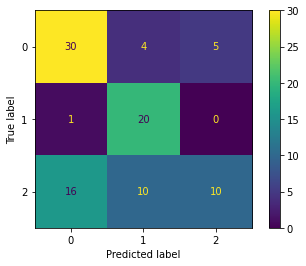

precision :  0.6310666110415797
recall :  0.6664631664631665
f1_score : 0.6057013362074922
Epoch 1/100
31/31 [==============================] - 1s 15ms/step - loss: 1.1140 - accuracy: 0.4397 - val_loss: 0.9470 - val_accuracy: 0.4416
Epoch 2/100
31/31 [==============================] - 0s 6ms/step - loss: 0.9941 - accuracy: 0.5114 - val_loss: 0.8823 - val_accuracy: 0.5195
Epoch 3/100
31/31 [==============================] - 0s 6ms/step - loss: 0.9350 - accuracy: 0.5212 - val_loss: 0.8308 - val_accuracy: 0.5584
Epoch 4/100
31/31 [==============================] - 0s 5ms/step - loss: 0.9010 - accuracy: 0.5472 - val_loss: 0.8072 - val_accuracy: 0.5974
Epoch 5/100
31/31 [==============================] - 0s 5ms/step - loss: 0.8789 - accuracy: 0.5570 - val_loss: 0.7951 - val_accuracy: 0.5455
Epoch 6/100
31/31 [==============================] - 0s 5ms/step - loss: 0.8434 - accuracy: 0.5603 - val_loss: 0.7715 - val_accuracy: 0.5714
Epoch 7/100
31/31 [==============================] - 0s 6ms/st

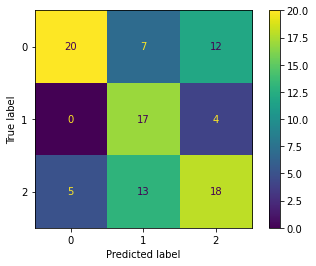

precision :  0.5962904080551139
recall :  0.6074481074481074
f1_score : 0.5751642036124794
Epoch 1/100
31/31 [==============================] - 2s 29ms/step - loss: 1.3348 - accuracy: 0.2932 - val_loss: 1.1290 - val_accuracy: 0.4805
Epoch 2/100
31/31 [==============================] - 0s 12ms/step - loss: 1.0417 - accuracy: 0.4919 - val_loss: 0.9812 - val_accuracy: 0.5065
Epoch 3/100
31/31 [==============================] - 0s 10ms/step - loss: 0.9557 - accuracy: 0.5277 - val_loss: 0.9148 - val_accuracy: 0.5325
Epoch 4/100
31/31 [==============================] - 0s 8ms/step - loss: 0.9031 - accuracy: 0.5309 - val_loss: 0.8634 - val_accuracy: 0.5325
Epoch 5/100
31/31 [==============================] - 0s 7ms/step - loss: 0.8599 - accuracy: 0.5700 - val_loss: 0.8442 - val_accuracy: 0.5844
Epoch 6/100
31/31 [==============================] - 0s 9ms/step - loss: 0.8242 - accuracy: 0.5831 - val_loss: 0.8225 - val_accuracy: 0.5584
Epoch 7/100
31/31 [==============================] - 0s 10ms

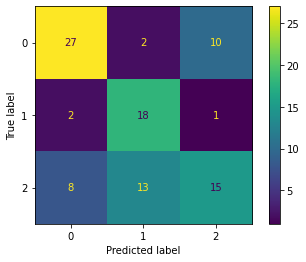

precision :  0.6173691173691174
recall :  0.6553724053724054
f1_score : 0.6203546500660252
Epoch 1/100
31/31 [==============================] - 1s 16ms/step - loss: 1.0847 - accuracy: 0.4332 - val_loss: 0.9600 - val_accuracy: 0.4675
Epoch 2/100
31/31 [==============================] - 0s 7ms/step - loss: 0.9676 - accuracy: 0.5081 - val_loss: 0.9038 - val_accuracy: 0.4545
Epoch 3/100
31/31 [==============================] - 0s 10ms/step - loss: 0.9209 - accuracy: 0.5505 - val_loss: 0.8650 - val_accuracy: 0.5065
Epoch 4/100
31/31 [==============================] - 0s 7ms/step - loss: 0.8895 - accuracy: 0.5570 - val_loss: 0.8425 - val_accuracy: 0.5065
Epoch 5/100
31/31 [==============================] - 0s 10ms/step - loss: 0.8664 - accuracy: 0.5798 - val_loss: 0.8295 - val_accuracy: 0.5584
Epoch 6/100
31/31 [==============================] - 0s 6ms/step - loss: 0.8566 - accuracy: 0.5831 - val_loss: 0.8204 - val_accuracy: 0.5455
Epoch 7/100
31/31 [==============================] - 0s 10ms

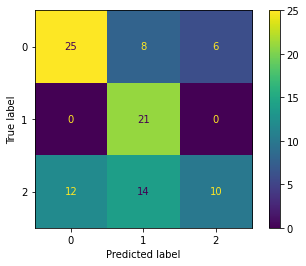

precision :  0.5963492562329772
recall :  0.6396011396011395
f1_score : 0.5662533738191633
Epoch 1/100
31/31 [==============================] - 2s 22ms/step - loss: 1.2117 - accuracy: 0.3453 - val_loss: 0.9919 - val_accuracy: 0.5195
Epoch 2/100
31/31 [==============================] - 0s 8ms/step - loss: 1.0687 - accuracy: 0.4495 - val_loss: 0.9543 - val_accuracy: 0.5325
Epoch 3/100
31/31 [==============================] - 0s 8ms/step - loss: 1.0102 - accuracy: 0.5342 - val_loss: 0.9257 - val_accuracy: 0.5195
Epoch 4/100
31/31 [==============================] - 0s 8ms/step - loss: 0.9665 - accuracy: 0.5407 - val_loss: 0.8947 - val_accuracy: 0.4935
Epoch 5/100
31/31 [==============================] - 0s 8ms/step - loss: 0.9353 - accuracy: 0.5831 - val_loss: 0.8763 - val_accuracy: 0.4286
Epoch 6/100
31/31 [==============================] - 0s 7ms/step - loss: 0.9059 - accuracy: 0.6124 - val_loss: 0.8716 - val_accuracy: 0.4545
Epoch 7/100
31/31 [==============================] - 0s 10ms/s

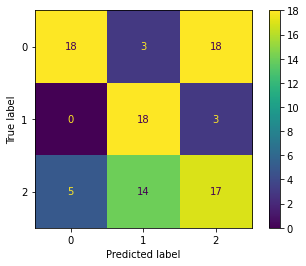

precision :  0.5814209436635066
recall :  0.5969678469678469
f1_score : 0.5609872545356416


In [ ]:

acc_f = []
loss_f = []
# Define the K-fold Cross Validator
kf = KFold(n_splits=5, shuffle=True)

# K-fold Cross Validation model evaluation
f_no = 1
for train, val in kf.split(X, y):


 model = Sequential()
 model.add(Dense(36 , input_dim=X_train.shape[1], activation='tanh'))
 model.add(Dense(16, activation='tanh'))
 model.add(Dense(3, activation='softmax'))

#change hyperparameter
 opt = keras.optimizers.Adam(learning_rate=0.001)

#Configures the model for training
 model.compile(optimizer=opt, loss='sparse_categorical_crossentropy',  metrics=['accuracy'])

#train model
 history = model.fit( X[train],  y[ train] ,validation_split=0.2, batch_size=10, epochs=100 )

#predict on valid set
 y_predict=model.predict(X_val)
 print(y_predict.shape)

# returning Indices of the max element(because yval is (96,1) to compare output with yval we need change (96,3) to (96, ) )
 y_predict= np.argmax(y_predict,axis=1)
 print(y_predict.shape)
 print("y_predict = ", y_predict)

#report result of all metrics
 print(classification_report(y_val,y_predict))

#plot confusion matrix
 confusion = confusion_matrix(y_val,y_predict)
 print("confusion matrix = " ,confusion)
 mat = ConfusionMatrixDisplay(confusion_matrix=confusion)
 mat.plot()
 plt.show()


#result of all metrics
 print("precision : ",precision_score(y_val,y_predict,average='macro'))
 print("recall : ",recall_score(y_val,y_predict,average='macro'))
 print("f1_score :",f1_score(y_val,y_predict,average='macro'))






  # generalization metrics
 scores = model.evaluate(X[val], y[val], verbose=0)

 acc_f.append(scores[1] * 100)
 loss_f.append(scores[0])

  # Increase fold number untill equal to 5
 f_no = f_no + 1

In [ ]:
acc_f = []
loss_f = []
# Define the K-fold Cross Validator
kf = KFold(n_splits=5, shuffle=True)

# K-fold Cross Validation model evaluation
f_no = 1
for train, val in kf.split(X, y):
   ''' building sequential model '''

model = Sequential()
model.add(Dense(36 , input_dim=X_train.shape[1], activation='tanh'))
model.add(Dense(16, activation='tanh'))
model.add(Dense(16, activation='tanh'))
model.add(Dense(3, activation='softmax'))

#change hyperparameter
opt = keras.optimizers.Adam(learning_rate=0.001)

#Configures the model for training
model.compile(optimizer=opt, loss='sparse_categorical_crossentropy',  metrics=['accuracy'])

#train model
history = model.fit( X_train,  y_train ,validation_split=0.2, batch_size=10, epochs=100 )

#predict on valid set
y_predict=model.predict(X_val)
print(y_predict.shape)

# returning Indices of the max element(because yval is (96,1) to compare output with yval we need change (96,3) to (96, ) )
y_predict= np.argmax(y_predict,axis=1)
print(y_predict.shape)
print("y_predict = ", y_predict)

#report result of all metrics
print(classification_report(y_val,y_predict))

#plot confusion matrix
confusion = confusion_matrix(y_val,y_predict)
print("confusion matrix = " ,confusion)
mat = ConfusionMatrixDisplay(confusion_matrix=confusion)
mat.plot()
plt.show()


#result of all metrics
print("precision : ",precision_score(y_val,y_predict,average='macro'))
print("recall : ",recall_score(y_val,y_predict,average='macro'))
print("f1_score :",f1_score(y_val,y_predict,average='macro'))






  # generalization metrics
scores = model.evaluate(X[val], y[val], verbose=0)

acc_f.append(scores[1] * 100)
loss_f.append(scores[0])

  # Increase fold number untill equal to 5
f_no = f_no + 1


In [ ]:
acc_f = []
loss_f = []
# Define the K-fold Cross Validator
kf = KFold(n_splits=5, shuffle=True)

# K-fold Cross Validation model evaluation
f_no = 1
for train, val in kf.split(X, y):
   ''' building sequential model '''

model = Sequential()
model.add(Dense(36 , input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(3, activation='softmax'))

#change hyperparameter
opt = keras.optimizers.Adam(learning_rate=0.001)

#Configures the model for training
model.compile(optimizer=opt, loss='sparse_categorical_crossentropy',  metrics=['accuracy'])

#train model
history = model.fit( X_train,  y_train ,validation_split=0.2, batch_size=10, epochs=100 )

#predict on valid set
y_predict=model.predict(X_val)
print(y_predict.shape)

# returning Indices of the max element(because yval is (96,1) to compare output with yval we need change (96,3) to (96, ) )
y_predict= np.argmax(y_predict,axis=1)
print(y_predict.shape)
print("y_predict = ", y_predict)

#report result of all metrics
print(classification_report(y_val,y_predict))

#plot confusion matrix
confusion = confusion_matrix(y_val,y_predict)
print("confusion matrix = " ,confusion)
mat = ConfusionMatrixDisplay(confusion_matrix=confusion)
mat.plot()
plt.show()


#result of all metrics
print("precision : ",precision_score(y_val,y_predict,average='macro'))
print("recall : ",recall_score(y_val,y_predict,average='macro'))
print("f1_score :",f1_score(y_val,y_predict,average='macro'))






  # generalization metrics
scores = model.evaluate(X[val], y[val], verbose=0)

acc_f.append(scores[1] * 100)
loss_f.append(scores[0])

  # Increase fold number untill equal to 5
f_no = f_no + 1
